Purpose of Code
1. Import necessary packages
2. Define class Image for the "image" files
3. Define class Nuclei for the "nuclei" files
4. Create an xlsx worksheet with multiple sheets
5. Include relevant values for all sheets

In [64]:
# RUN THIS FIRST
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import openpyxl
import xlrd
import math
import statistics as stats
import os 
import csv 
import xlsxwriter
import matplotlib.ticker as ticker
from matplotlib_venn import venn3
from matplotlib_venn import venn2, venn2_circles
from io import StringIO
from scipy import stats
#!pip install matplotlib-venn (if you have not yet installed matplotlib-venn, install it!)

In [65]:
##### create class Image to store information of channels, area_occupied, 
##### area_occupied_total, and file_name
class Image:
    def __init__(self, image_file_name): ## takes in the image_file name
        self.image_file_name = image_file_name 
        self.channels = {} # populates self channels with channels found in file
        self.total_occupied = None
    
    def add_channel(self, new_channel, area_occupied):
        self.channels[new_channel] = area_occupied
        
    def set_total_occupied(self,total_occupied):
        self.total_occupied = total_occupied
        
    def find_channel_percent(self): ## calculates percentage from area occupied
        if self.total_occupied:
            channel_percent = {} #open a dictionary
            for channel in self.channels:
                channel_percent[channel] = self.channels[channel]/self.total_occupied*100
            return channel_percent
        return None

In [66]:
class Nuclei:
    def __init__(self, nuclei_file_name):
        self.nuclei_file_name = nuclei_file_name 
        self.channels = {}
        self.total_nuclei = None
    
    def add_channel(self, new_channel, nuclei_value):
        self.channels[new_channel] = nuclei_value ### nuclei value is "logical vector"
        
    def set_total_occupied(self,total_nuclei):
        self.total_nuclei = total_nuclei ## total nuclei in this image
                   
    def find_sum_value(self):
        if self.channels:
            channel_sum = {} ## this is a dictionary of the sum of the logical vector per channel
            for channel in self.channels: 
                channel_sum[channel] = sum(self.channels[channel])
            return channel_sum
    
    def find_channel_percent(self): ## calculates percentage from nuclei/total
        if self.total_nuclei:
            channel_percent = {}
            for channel in self.channels:
                channel_percent[channel] = sum(self.channels[channel])/self.total_nuclei*100
            return channel_percent
      
    def find_col(self): 
        if self.channels: 
            nuclei_col = {}
            if len(self.channels) == 2: 
                for i in self.channels: 
                    for j in self.channels:
                        nuclei_col[i+'/'+j] = np.dot(self.channels[i], self.channels[j])
            if len(self.channels) == 3: 
                for i in self.channels: 
                    for j in self.channels: 
                        nuclei_col[i+'/'+j] = np.dot(self.channels[i], self.channels[j])
                        for k in self.channels: 
                           nuclei_col[i+'/'+j+'/'+k] = np.dot(np.multiply(self.channels[i], self.channels[j]), self.channels[k]) 
            return nuclei_col

In [67]:
#### FIND AREA OCCUPIED AND NUCLEI #####

# Create a new excel file to store information
# processed_files_areas is where areas information will be stored
workbook = xlsxwriter.Workbook('area_occupied_nuclei_colocalization.xlsx')
# make sheets
sheet1 = workbook.add_worksheet('Area_Occupied')
sheet2 = workbook.add_worksheet('Area_Occupied_Total')
sheet3 = workbook.add_worksheet('Nuclei')
sheet4 = workbook.add_worksheet('Nuclei_Total')
sheet5 = workbook.add_worksheet('Colocalization')
sheets = [sheet1, sheet2, sheet3, sheet4, sheet5]

# polulate sheet with channel/AP value labels
labels = [['DRD1', '-1.22'], 
          ['DRD1', '-1.34'], 
          ['DRD1', '-1.46'], 
          ['DRD1', '-1.58'], 
          ['DRD1', '-1.7'], 
          ['DRD1', '-1.82'], 
          ['DRD2', '-1.22'], 
          ['DRD2', '-1.34'], 
          ['DRD2', '-1.46'], 
          ['DRD2', '-1.58'], 
          ['DRD2', '-1.7'], 
          ['DRD2', '-1.82'],
          ['VIPR2', '-1.22'], 
          ['VIPR2', '-1.34'], 
          ['VIPR2', '-1.46'], 
          ['VIPR2', '-1.58'], 
          ['VIPR2', '-1.7'], 
          ['VIPR2', '-1.82'], 
          ['NPBWR1', '-1.22'], 
          ['NPBWR1', '-1.34'], 
          ['NPBWR1', '-1.46'], 
          ['NPBWR1', '-1.58'], 
          ['NPBWR1', '-1.7'], 
          ['NPBWR1', '-1.82']]

##### LOOP THROUGH CSV FILES HERE

#### rows and clumns are zero indexed
### worksheet.write(row, col, some_data) is how you add information to the xlsx file
for worksheet in sheets: 
    row = 1
    col = 0
    for channel, AP in labels: # add the labels
        worksheet.write(row, col, channel)
        worksheet.write(row, col +1, AP)
        row += 1

#labels_colocalization MATILDE WILL WORK ON THIS LATER
labels_col = [['DRD1/DRD2', '-1.22'], 
          ['DRD1/DRD2', '-1.34'], 
          ['DRD1/DRD2', '-1.46'], 
          ['DRD1/DRD2', '-1.58'], 
          ['DRD1/DRD2', '-1.7'], 
          ['DRD1/DRD2', '-1.82'], 
          ['DRD1/VIP', '-1.22'], 
          ['DRD1/VIP', '-1.34'], 
          ['DRD1/VIP', '-1.46'], 
          ['DRD1/VIP', '-1.58'], 
          ['DRD1/VIP', '-1.7'], 
          ['DRD1/VIP', '-1.82'],
          ['DRD2/VIP', '-1.22'], 
          ['DRD2/VIP', '-1.34'], 
          ['DRD2/VIP', '-1.46'], 
          ['DRD2/VIP', '-1.58'], 
          ['DRD2/VIP', '-1.7'], 
          ['DRD2/VIP', '-1.82'], 
          ['DRD1/DRD2/VIP', '-1.22'], 
          ['DRD1/DRD2/VIP', '-1.34'], 
          ['DRD1/DRD2/VIP', '-1.46'], 
          ['DRD1/DRD2/VIP', '-1.58'], 
          ['DRD1/DRD2/VIP', '-1.7'], 
          ['DRD1/DRD2/VIP', '-1.82'],
          ['DRD1/NPBWR1', '-1.22'], 
          ['DRD1/NPBWR1', '-1.34'], 
          ['DRD1/NPBWR1', '-1.46'], 
          ['DRD1/NPBWR1', '-1.58'], 
          ['DRD1/NPBWR1', '-1.7'], 
          ['DRD1/NPBWR1', '-1.82'], 
          ['DRD2/NPBWR1', '-1.22'], 
          ['DRD2/NPBWR1', '-1.34'], 
          ['DRD2/NPBWR1', '-1.46'], 
          ['DRD2/NPBWR1', '-1.58'], 
          ['DRD2/NPBWR1', '-1.7'], 
          ['DRD2/NPBWR1', '-1.82'],
          ['VIPR2/NPBWR1', '-1.22'], 
          ['VIPR2/NPBWR1', '-1.34'], 
          ['VIPR2/NPBWR1', '-1.46'], 
          ['VIPR2/NPBWR1', '-1.58'], 
          ['VIPR2/NPBWR1', '-1.7'], 
          ['VIPR2/NPBWR1', '-1.82'], 
          ['DRD1/DRD2/NPBWR1', '-1.22'], 
          ['DRD1/DRD2/NPBWR1', '-1.34'], 
          ['DRD1/DRD2/NPBWR1', '-1.46'], 
          ['DRD1/DRD2/NPBWR1', '-1.58'], 
          ['DRD1/DRD2/NPBWR1', '-1.7'], 
          ['DRD1/DRD2/NPBWR1', '-1.82']]

# add remaining colocalization labels to sheet5
col = 0
for channel, AP in labels_col: # add the labels
    sheet5.write(row, col, channel)
    sheet5.write(row, col +1, AP)
    row += 1


######################### labels are inserted into the worksheet, now we can add data

##################### USE images files to calculate AREA OCCUPIED ##########################

#loop through csv files for IMAGES
images = [] # create empty list of images
## sort through folder, open a file in the folder
for file_name in sorted(os.listdir('cell_profiler_outputs')): 
    with open('cell_profiler_outputs/'+file_name) as file:
        if 'Image' in file_name: ## only take out files that have area_occupied
            image = Image(file_name) ##using the class now to set file name
            pd.read_csv('cell_profiler_outputs/'+file_name, delimiter = ',')
            data_frame = pd.read_csv('cell_profiler_outputs/'+file_name)
            image.set_total_occupied(data_frame.iloc[0,0]) #total occupied is first number
            headers = list(data_frame.columns)
            col = 0
            for header in headers: ## find channel names from header names
                if 'AreaOccupied_AreaOccupied_RelateNuc'in header:
                    channel = header.replace('AreaOccupied_AreaOccupied_RelateNuc','')
                    value = data_frame.iloc[0,col] ## get value for that channel
                    image.add_channel(channel,value) ## 
                col += 1 
            ## add this image to the list
            images.append(image)

#start columns after the labels
slice_col = 2           
for image in images:
    ## find the AP value from the file_Name
    AP_value = image.image_file_name.split('AP')[1].replace('Image.csv','')
    sheet1.write(0, slice_col, image.image_file_name)
    sheet2.write(0, slice_col, image.image_file_name)
    # for each channel the row  is where the channel and AP value match
    for channel in image.channels: 
        row = (labels.index([channel, AP_value]))+1
        sheet1.write(row, slice_col, image.channels[channel])
        sheet2.write(row, slice_col, image.find_channel_percent()[channel])  
    slice_col+= 1

####### PROCESS NUCLEI #######

nucleis = [] # create empty list of images
for file_name in sorted(os.listdir('cell_profiler_outputs')): 
    with open('cell_profiler_outputs/'+file_name) as file:
        if 'NucleiAllExp' in file_name: ## only take out files that have nuclei
            nuclei = Nuclei(file_name) # set file name 
            data_frame = pd.read_csv('cell_profiler_outputs/'+file_name)
            headers = list(data_frame.columns)
            total_nuclei = len(data_frame.iloc[:,1])
            nuclei.set_total_occupied(total_nuclei)
            col = 0
            for header in headers: ## find channel names from header names
                if 'Children_All'in header:
                    channel = header.split('All')[1].replace('_Count', '')
                    nuclei_full = data_frame.iloc[:,col]
                    greater_than_2 = []
                    for nuc in nuclei_full: 
                        if nuc >2: 
                            greater_than_2.append(1)
                        else: 
                            greater_than_2.append(0)
                    nuclei_value = greater_than_2 ##list of nuclei > 2
                    nuclei.add_channel(channel,nuclei_value)
                col += 1 
            ## add this nuclei to the list
            nucleis.append(nuclei)
            
## start columns after the labels
slice_col = 2 
for nuclei in nucleis:
    ## find the AP value from the file_Name
    AP_value = nuclei.nuclei_file_name.split('AP')[1].replace('NucleiAllExp.csv','')
    ## add file_name as a header for that column
    sheet3.write(0, slice_col, nuclei.nuclei_file_name)
    sheet4.write(0, slice_col, nuclei.nuclei_file_name)
    sheet5.write(0, slice_col, nuclei.nuclei_file_name)
    sum_nuclei = nuclei.find_sum_value()
    combinations = nuclei.find_col()
    # for each channel the row  is where the channel and AP value match
    for channel in nuclei.channels: 
        row = (labels.index([channel, AP_value]))+1
        sheet3.write(row, slice_col, sum_nuclei[channel])
        sheet4.write(row, slice_col, nuclei.find_channel_percent()[channel])    
        sheet5.write(row, slice_col, sum(nuclei.channels[channel]))
    for channel in combinations: 
        try:
            row = (labels_col.index([channel, AP_value])+1+len(labels))
            sheet5.write(row, slice_col, combinations[channel])
        except ValueError: 
            continue 
    slice_col+= 1    

workbook.close()

In [68]:
### Find H-Score

# # Create a new excel file to store information
# # processed_files.xlsx is where information will be stored
workbook2 = xlsxwriter.Workbook('H_scores.xlsx')
# make sheets
worksheets = ['DRD1 -1.22', 'DRD1 -1.34', 'DRD1 -1.46', 'DRD1 -1.58', 
          'DRD1 -1.7', 'DRD1 -1.82', 'DRD2 -1.22', 'DRD2 -1.34', 
          'DRD2 -1.46', 'DRD2 -1.58', 'DRD2 -1.7', 'DRD2 -1.82',
          'VIP -1.22', 'VIP -1.34', 'VIP -1.46', 'VIP -1.58', 'VIP -1.7', 'VIP -1.82', 
          'NPBWR1 -1.22', 'NPBWR1 -1.34', 'NPBWR1 -1.46', 'NPBWR1 -1.58', 
          'NPBWR1 -1.7', 'NPBWR1 -1.82']
sheets = []
for i in range(24):
    sheets.append(workbook2.add_worksheet(worksheets[i]))

####### PROCESS HSCORE #######

cols = {}
for file_name in sorted(os.listdir('cell_profiler_outputs')): 
    with open('cell_profiler_outputs/'+file_name) as file:
        if 'NucleiAllExp' in file_name: ## only take out files that have nuclei
            data_frame = pd.read_csv('cell_profiler_outputs/'+file_name)
            headers = list(data_frame.columns)
            col = 0
            for header in headers: ## find channel names from header names
                if 'Children_All'in header:
                    channel = header.split('All')[1].replace('_Count', '') ### this is channel name "DRD1"
                    AP_value = file_name.split('AP')[1].replace('NucleiAllExp.csv','') ### AP "-1.34"
                    sheet_name = channel+' '+AP_value ### name of sheet "DRD1 -1.34"
                    nuclei_full = data_frame.iloc[:,col]
                    greater_than_0 = [] # make a list only of nuclei that have more than 0 children puncta
                    for nuc in nuclei_full: 
                        if nuclei_full[nuc] >0: 
                            greater_than_0.append(nuclei_full[nuc])
                    if sheet_name not in cols: # add a dictionary with sheet_name: counter for columns
                        cols[sheet_name] = 0
                    else: 
                        cols[sheet_name]+=1 
                    i = (worksheets.index(sheet_name))
                    sheets[i].write(0, cols[worksheets[i]], file_name) # add file name as header
                    for counter in range(len(greater_than_0)):  ## add values for all the nuclei children
                        sheets[i].write(counter+1, cols[worksheets[i]], greater_than_0[counter])
                col+=1
        print(file_name)

workbook2.close()

2A slide5 slice5 L 40x zstack stitch AP-1.34Image.csv
2A slide5 slice5 L 40x zstack stitch AP-1.34NucleiAllExp.csv
2A slide5 slice6 L 40x zstack stitch AP-1.46Image.csv
2A slide5 slice6 L 40x zstack stitch AP-1.46NucleiAllExp.csv
2A slide5 slice7 R 40x zstack stitch AP-1.58Image.csv
2A slide5 slice7 R 40x zstack stitch AP-1.58NucleiAllExp.csv
2A slide5 slice8 R 40x zstack stitch AP-1.7Image.csv
2A slide5 slice8 R 40x zstack stitch AP-1.7NucleiAllExp.csv


In [47]:
######### FUNCTION TO MAKE LINE GRAPHS OF TOTAL AREA OCCUPIED AND NUCLEI COUNTS ############

####import excel file from previous code
data_sheets_1 = "area_occupied_nuclei_colocalization.xlsx"


## function to sort through xlsx sheets, workbook defines the sheet name
def plot_one_graph(workbook):
    
    # read data from excel as pandas dataframe
    data_frame = pd.read_excel(data_sheets_1, sheet_name = workbook)

    # find mean/SD along axis=1(rows) NOT axis=0(columns) 
    APmeans = data_frame.iloc[0:,2:].mean(axis=1)
    APsem = data_frame.iloc[0:,2:].sem(axis=1)

    # split the means into lists for each probe and replace NaN's with zeros
    DRD1_avg = APmeans[0:6]
    DRD2_avg = APmeans[6:12]
    VIPR2_avg = APmeans[12:18]
    NPBWR1_avg = APmeans[18:24]

    # split the SDs into lists for each probe and replace NaN's with zeros
    DRD1_sem = APsem[0:6]
    DRD2_sem = APsem[6:12]
    VIPR2_sem = APsem[12:18]
    NPBWR1_sem = APsem[18:24]

    # plot graph the output
    x = range(0,6)
    fig = plt.figure(dpi=150,figsize=(5,5))
    fig.add_subplot(111)
    
    #add error bars
    plt.errorbar(x, DRD1_avg, yerr=DRD1_sem, label="DRD1", color = "red")
    plt.errorbar(x, DRD2_avg, yerr=DRD2_sem, label="DRD2", color = "cyan")
    plt.errorbar(x, VIPR2_avg, yerr=VIPR2_sem, label="VIPR2", color = "green")
    plt.errorbar(x, NPBWR1_avg, yerr=NPBWR1_sem, label="NPBWR1", color = "magenta")
    
    #Add labels
    positions = (0, 1, 2, 3, 4, 5)
    labels = ("-1.22", "-1.34", "-1.46", "-1.58", "-1.7", '-1.82')
    plt.xticks(positions, labels)
    plt.xlabel("Anterior-Posterior Coordinates")
    #plt.ylabel("Count")
    plt.legend(loc=2, fontsize = 'small')
    return fig

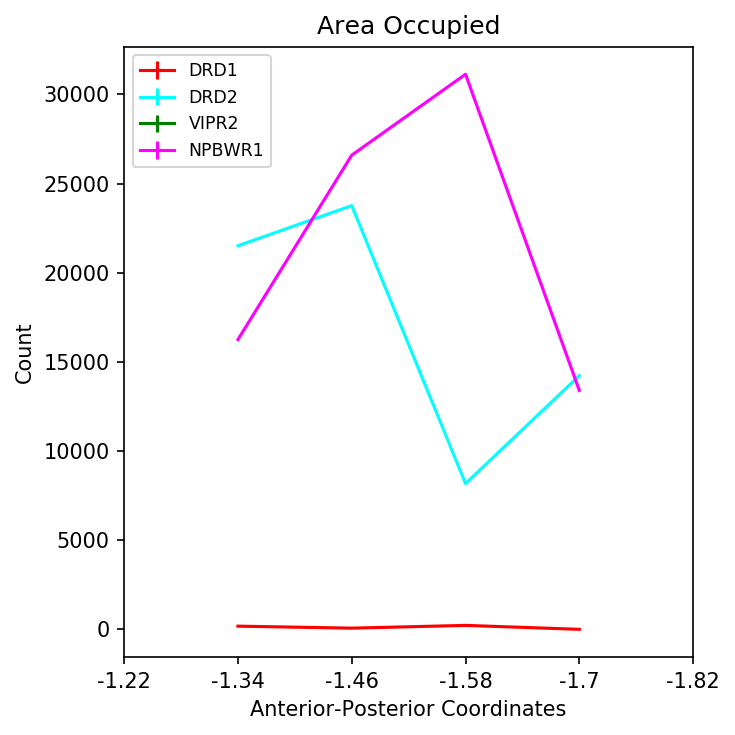

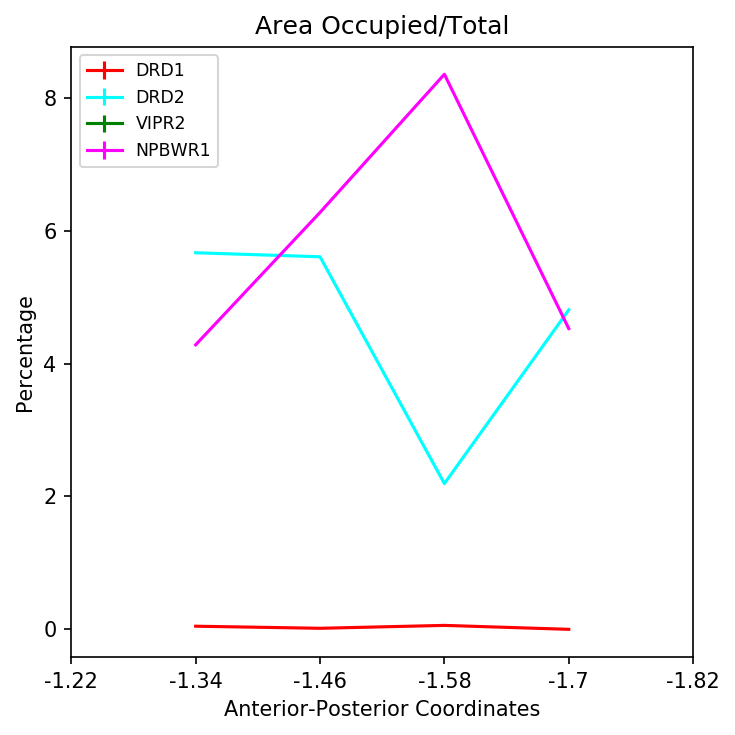

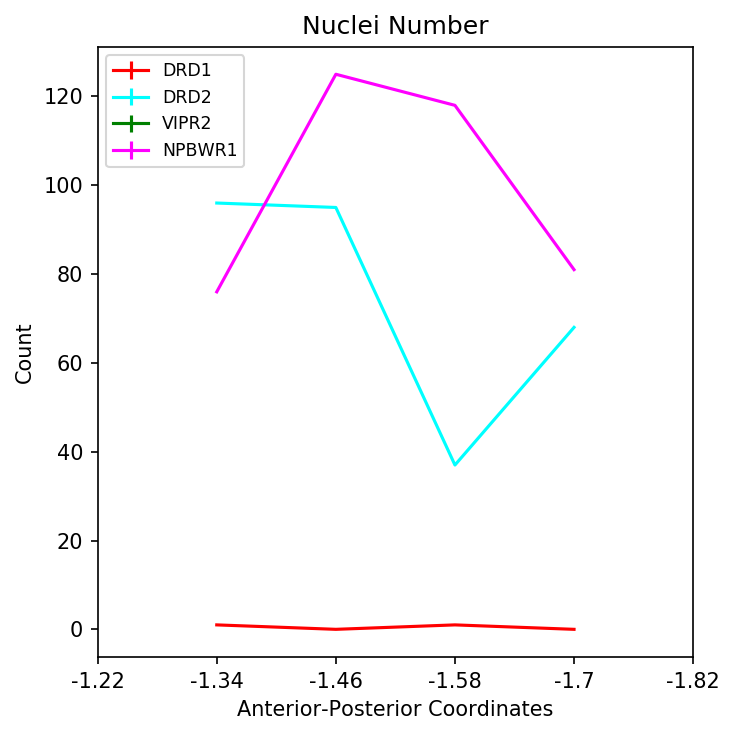

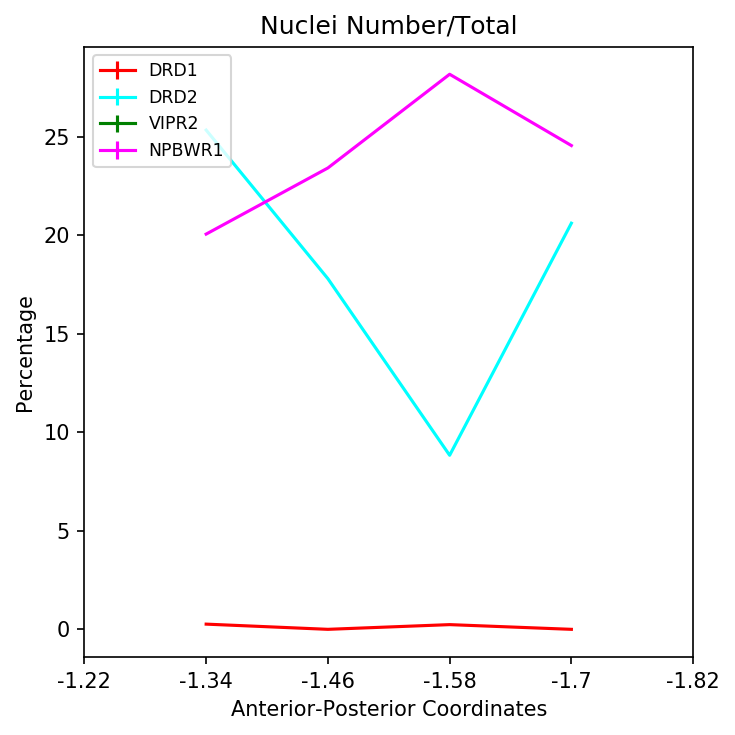

In [48]:
########## Loop through sheets and plot graphs ###########
sheet_1 = 'Area_Occupied'
sheet_2 = 'Area_Occupied_Total'
sheet_3 = 'Nuclei'
sheet_4 = 'Nuclei_Total'

sheets = [sheet_1, sheet_2, sheet_3, sheet_4]
graph_titles = ['Area Occupied', 'Area Occupied/Total', 'Nuclei Number', 'Nuclei Number/Total']

# for each sublot, call the function to make a graph, and set graph title
for i in range(4): 
    fig = plot_one_graph(sheets[i])
    if i == 0 or i == 2:
        plt.ylabel("Count")
    else:
        plt.ylabel("Percentage")
    plt.title(graph_titles[i])
    plt.xlabel('Anterior-Posterior Coordinates')
    #plt.savefig('RNAscopeResults'+ str(i) + '.jpeg', dpi=300, bbox_inches='tight')
    plt.tight_layout()

In [49]:
######### MAKE H-SCORE BAR CHARTS ##############

##import excel file from previous code
data_sheets_2 = "H_scores.xlsx"

## plot_one_graph is the function that loops through sheets in the XLSX file
## Workbook argument refers to the "sheet name" and C argument refers to graph colors

def plot_one_graph(workbook, C):

## read data from excel as pandas dataframe 
    data_frame = pd.read_excel(data_sheets_2, sheet_name = workbook)

## sort puncta into bins grouped by 3 puncta/cell
    bin1 = []
    bin2 = []
    bin3 = []
    bin4 = []
    bin5 = []
    bin6 = []
    bin7 = []
    bin8 = []
    bin9 = []
    bin10 = []
    bin11 = []
    bin12 = []
    bin13 = []
    bin14 = []
    bin15 = []
    bin16 = []
    bin17 = []
    bin18 = []
    bin19 = []
    bin20 = []
    bin21 = []
    bin22 = []
    bin23 = []

## Bin labels correspond to the number of puncta/cell

    labels = ['1-3', '4-6', '7-9', '10-12','13-15', '16-18', '19-21', '22-24', 
              '25-27', '28-30', '31-33', '34-36', '37-39', '40-42', '43-45', '46-48',
              '49-51', '52-54', '55-57', '58-60', '61-63', '64-66', '67-69']

## go through the list of labels, and each column to bin data based on the number of puncta/cells

    for j in range(len(labels)):
        for i in range(len(data_frame.columns)):
            slicecolumn = pd.DataFrame({'Column': data_frame.iloc[:,i]})
            slicecolumn['labels'] = pd.cut(x=slicecolumn['Column'], bins=[0, 4, 7, 10, 13, 
                                                                          16, 19, 22, 25, 28, 
                                                                          31, 34, 37, 40, 43, 
                                                                          46, 49, 52, 55, 58, 
                                                                          61, 64, 67, 69],labels=['1-3', '4-6', '7-9', '10-12','13-15', 
                                                                                              '16-18', '19-21', '22-24', '25-27', '28-30', 
                                                                                              '31-33', '34-36', '37-39', '40-42', '43-45', 
                                                                                              '46-48','49-51', '52-54', '55-57', '58-60', 
                                                                                              '61-63', '64-66', '67-69'], right=False)
            if j == 0:
                bin1.append(slicecolumn['labels'].eq(labels[j]).sum())
            elif j == 1:
                bin2.append(slicecolumn['labels'].eq(labels[j]).sum())
            elif j == 2:
                bin3.append(slicecolumn['labels'].eq(labels[j]).sum())
            elif j == 3:
                bin4.append(slicecolumn['labels'].eq(labels[j]).sum()) 
            elif j == 4:
                bin5.append(slicecolumn['labels'].eq(labels[j]).sum()) 
            elif j == 5:
                bin6.append(slicecolumn['labels'].eq(labels[j]).sum()) 
            elif j == 6:
                bin7.append(slicecolumn['labels'].eq(labels[j]).sum())
            elif j == 7:
                bin8.append(slicecolumn['labels'].eq(labels[j]).sum())
            elif j == 8:
                bin9.append(slicecolumn['labels'].eq(labels[j]).sum()) 
            elif j == 9:
                bin10.append(slicecolumn['labels'].eq(labels[j]).sum()) 
            elif j == 10:
                bin11.append(slicecolumn['labels'].eq(labels[j]).sum()) 
            elif j == 11:
                bin12.append(slicecolumn['labels'].eq(labels[j]).sum())
            elif j == 12:
                bin13.append(slicecolumn['labels'].eq(labels[j]).sum())
            elif j == 13:
                bin14.append(slicecolumn['labels'].eq(labels[j]).sum()) 
            elif j == 14:
                bin15.append(slicecolumn['labels'].eq(labels[j]).sum()) 
            elif j == 15:
                bin16.append(slicecolumn['labels'].eq(labels[j]).sum()) 
            elif j == 16:
                bin17.append(slicecolumn['labels'].eq(labels[j]).sum())
            elif j == 17:
                bin18.append(slicecolumn['labels'].eq(labels[j]).sum())
            elif j == 18:
                bin19.append(slicecolumn['labels'].eq(labels[j]).sum()) 
            elif j == 19:
                bin20.append(slicecolumn['labels'].eq(labels[j]).sum()) 
            elif j == 20:
                bin21.append(slicecolumn['labels'].eq(labels[j]).sum())
            elif j == 21:
                bin22.append(slicecolumn['labels'].eq(labels[j]).sum()) 
            elif j == 22:
                bin23.append(slicecolumn['labels'].eq(labels[j]).sum()) 

## find the means and standard error of the mean for each bin 

    bins = [bin1, bin2, bin3, bin4, bin5, bin6, bin7, bin8, bin9, bin10, bin11, bin12, bin13, bin14, bin15, 
    bin16, bin17, bin18, bin19, bin20, bin21, bin22, bin23] 
    means = []
    sems = []
    for i in bins:
        x = np.mean(i)
        y = stats.sem(i)
        means.append(x)
        sems.append(y)
        
## plot graph the output as a bar chart with error bars 
    x = range(0,69)
    fig = plt.figure(dpi=150,figsize=(20,10))
    fig.add_subplot(111)
    labels = ("1-3", "4-6", "7-9", "10-12", '13-15', '16-18', '19-21', '22-24', 
              '25-27', '28-30', '31-33', '34-36', '37-39', '40-42', '43-45', '46-48',
              '49-51', '52-54', '55-57', '58-60', '61-63', '64-66', '67-69')
    positions = (1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67)
    plt.xticks(positions, labels)
    plt.xlabel("H-Score")
    plt.ylabel("Count")
    plt.ylim(0,150)
    plt.bar([1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67], means, yerr=sems, width = 3, color = C) 
    return fig

/Users/mackenzie/opt/anaconda3/envs/PythonTuto/lib/python3.7/site-packages/ipykernel_launcher.py:120: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


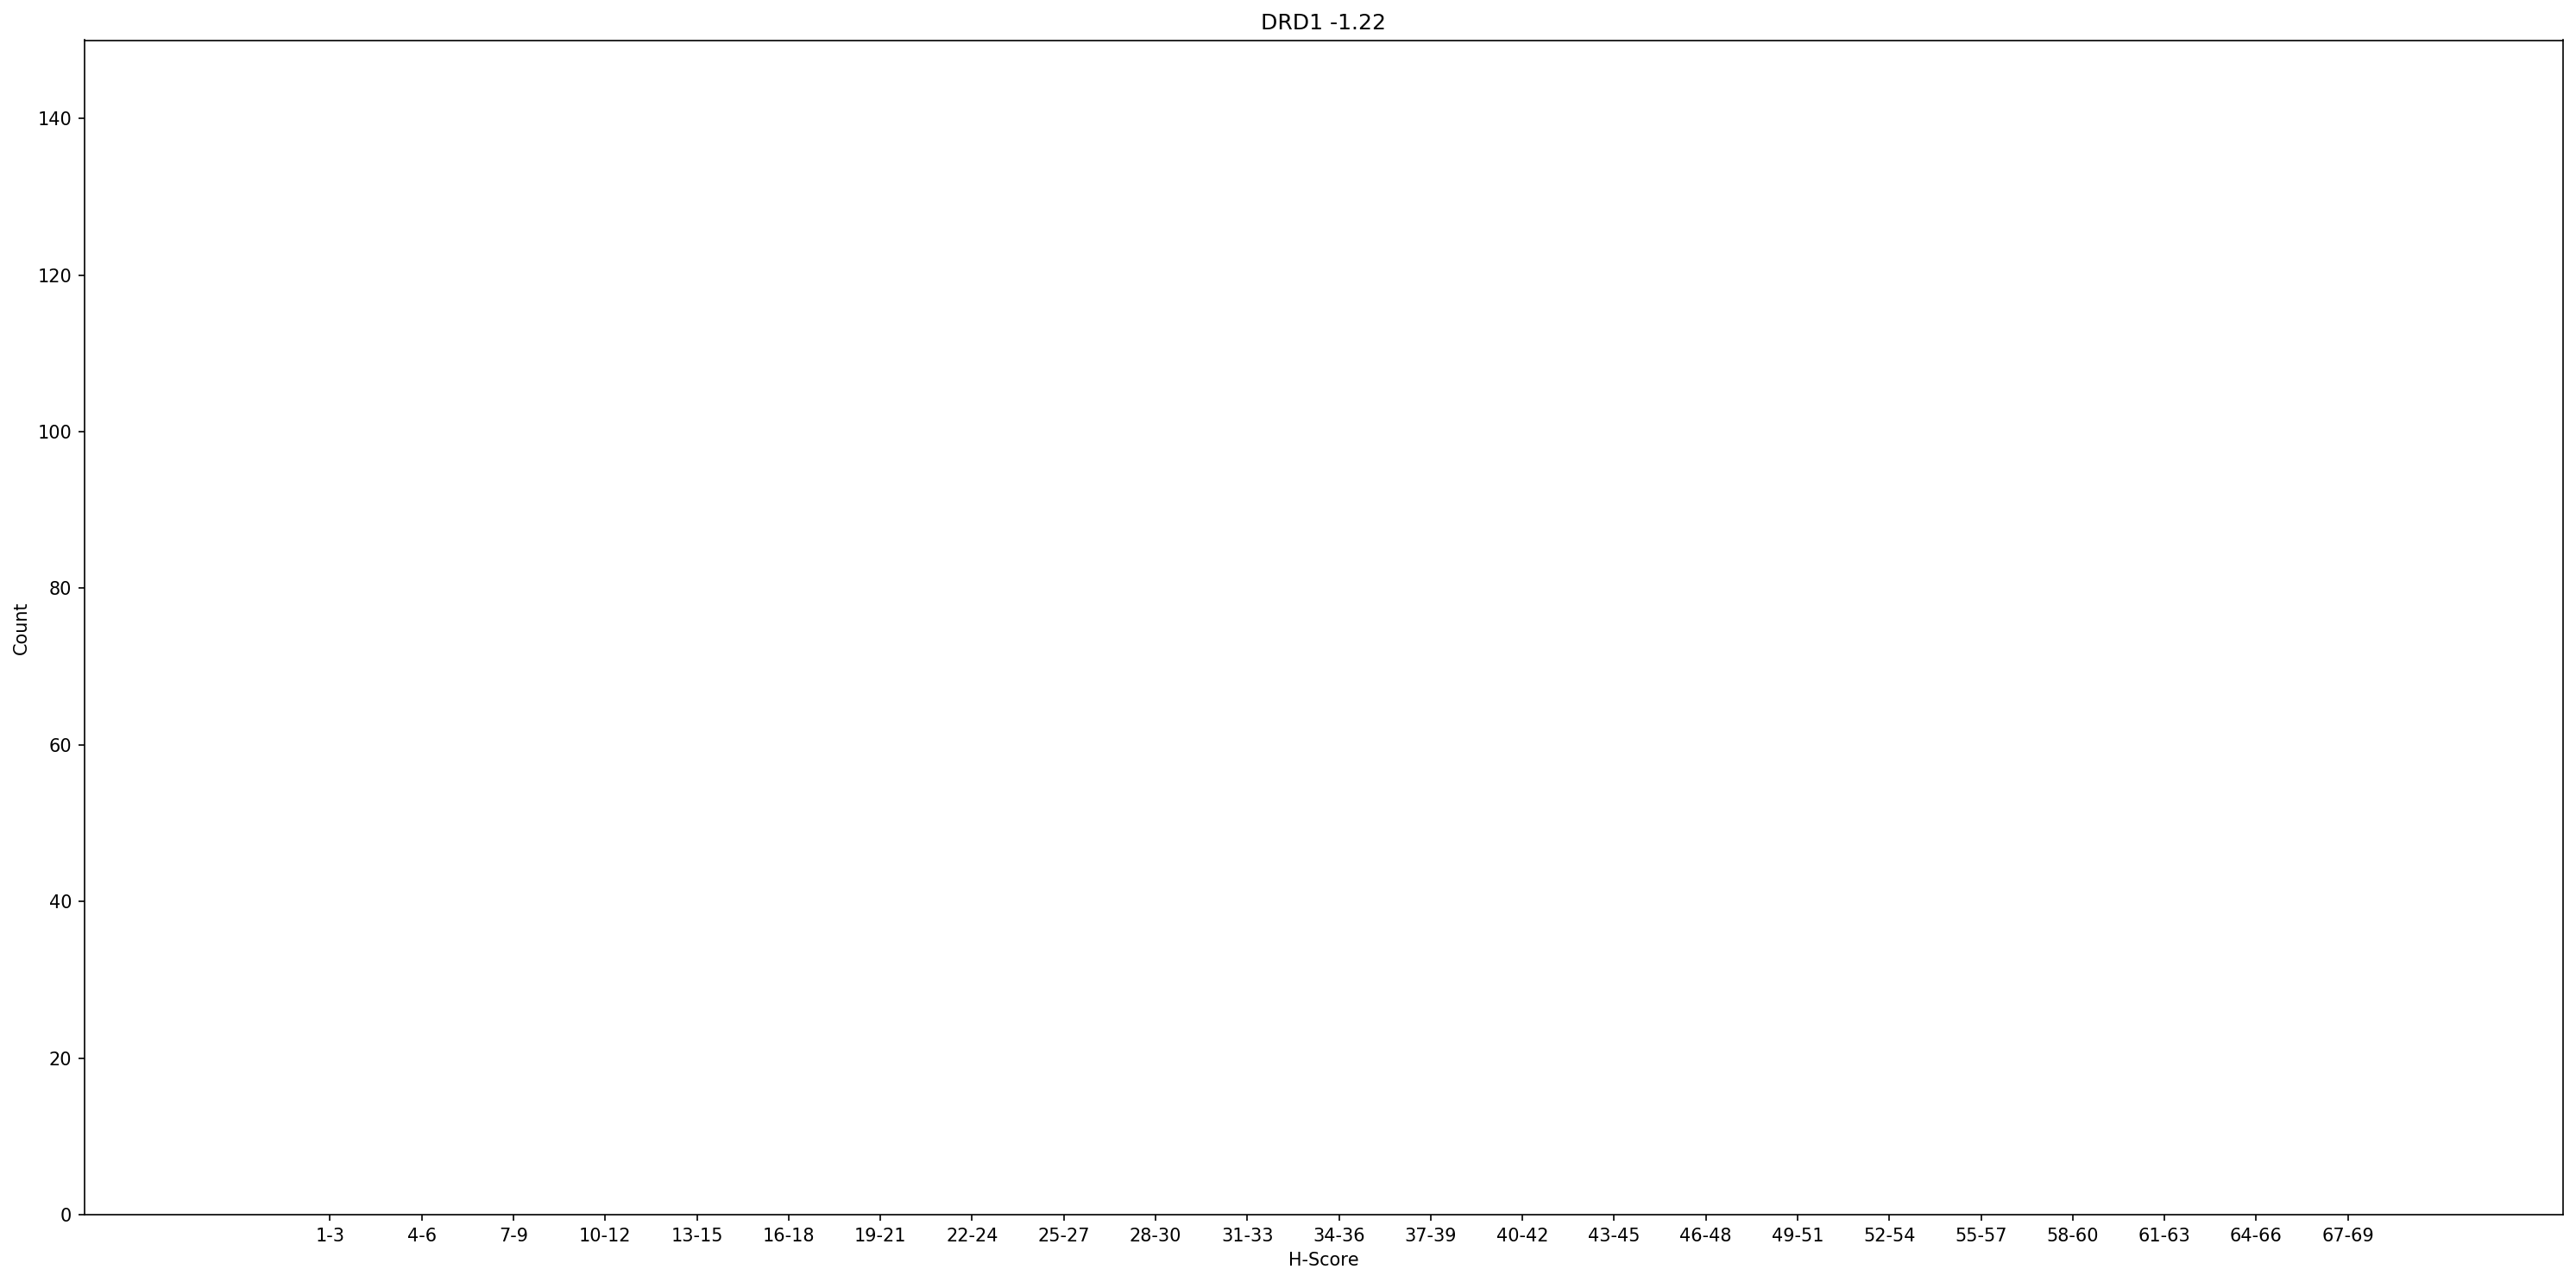

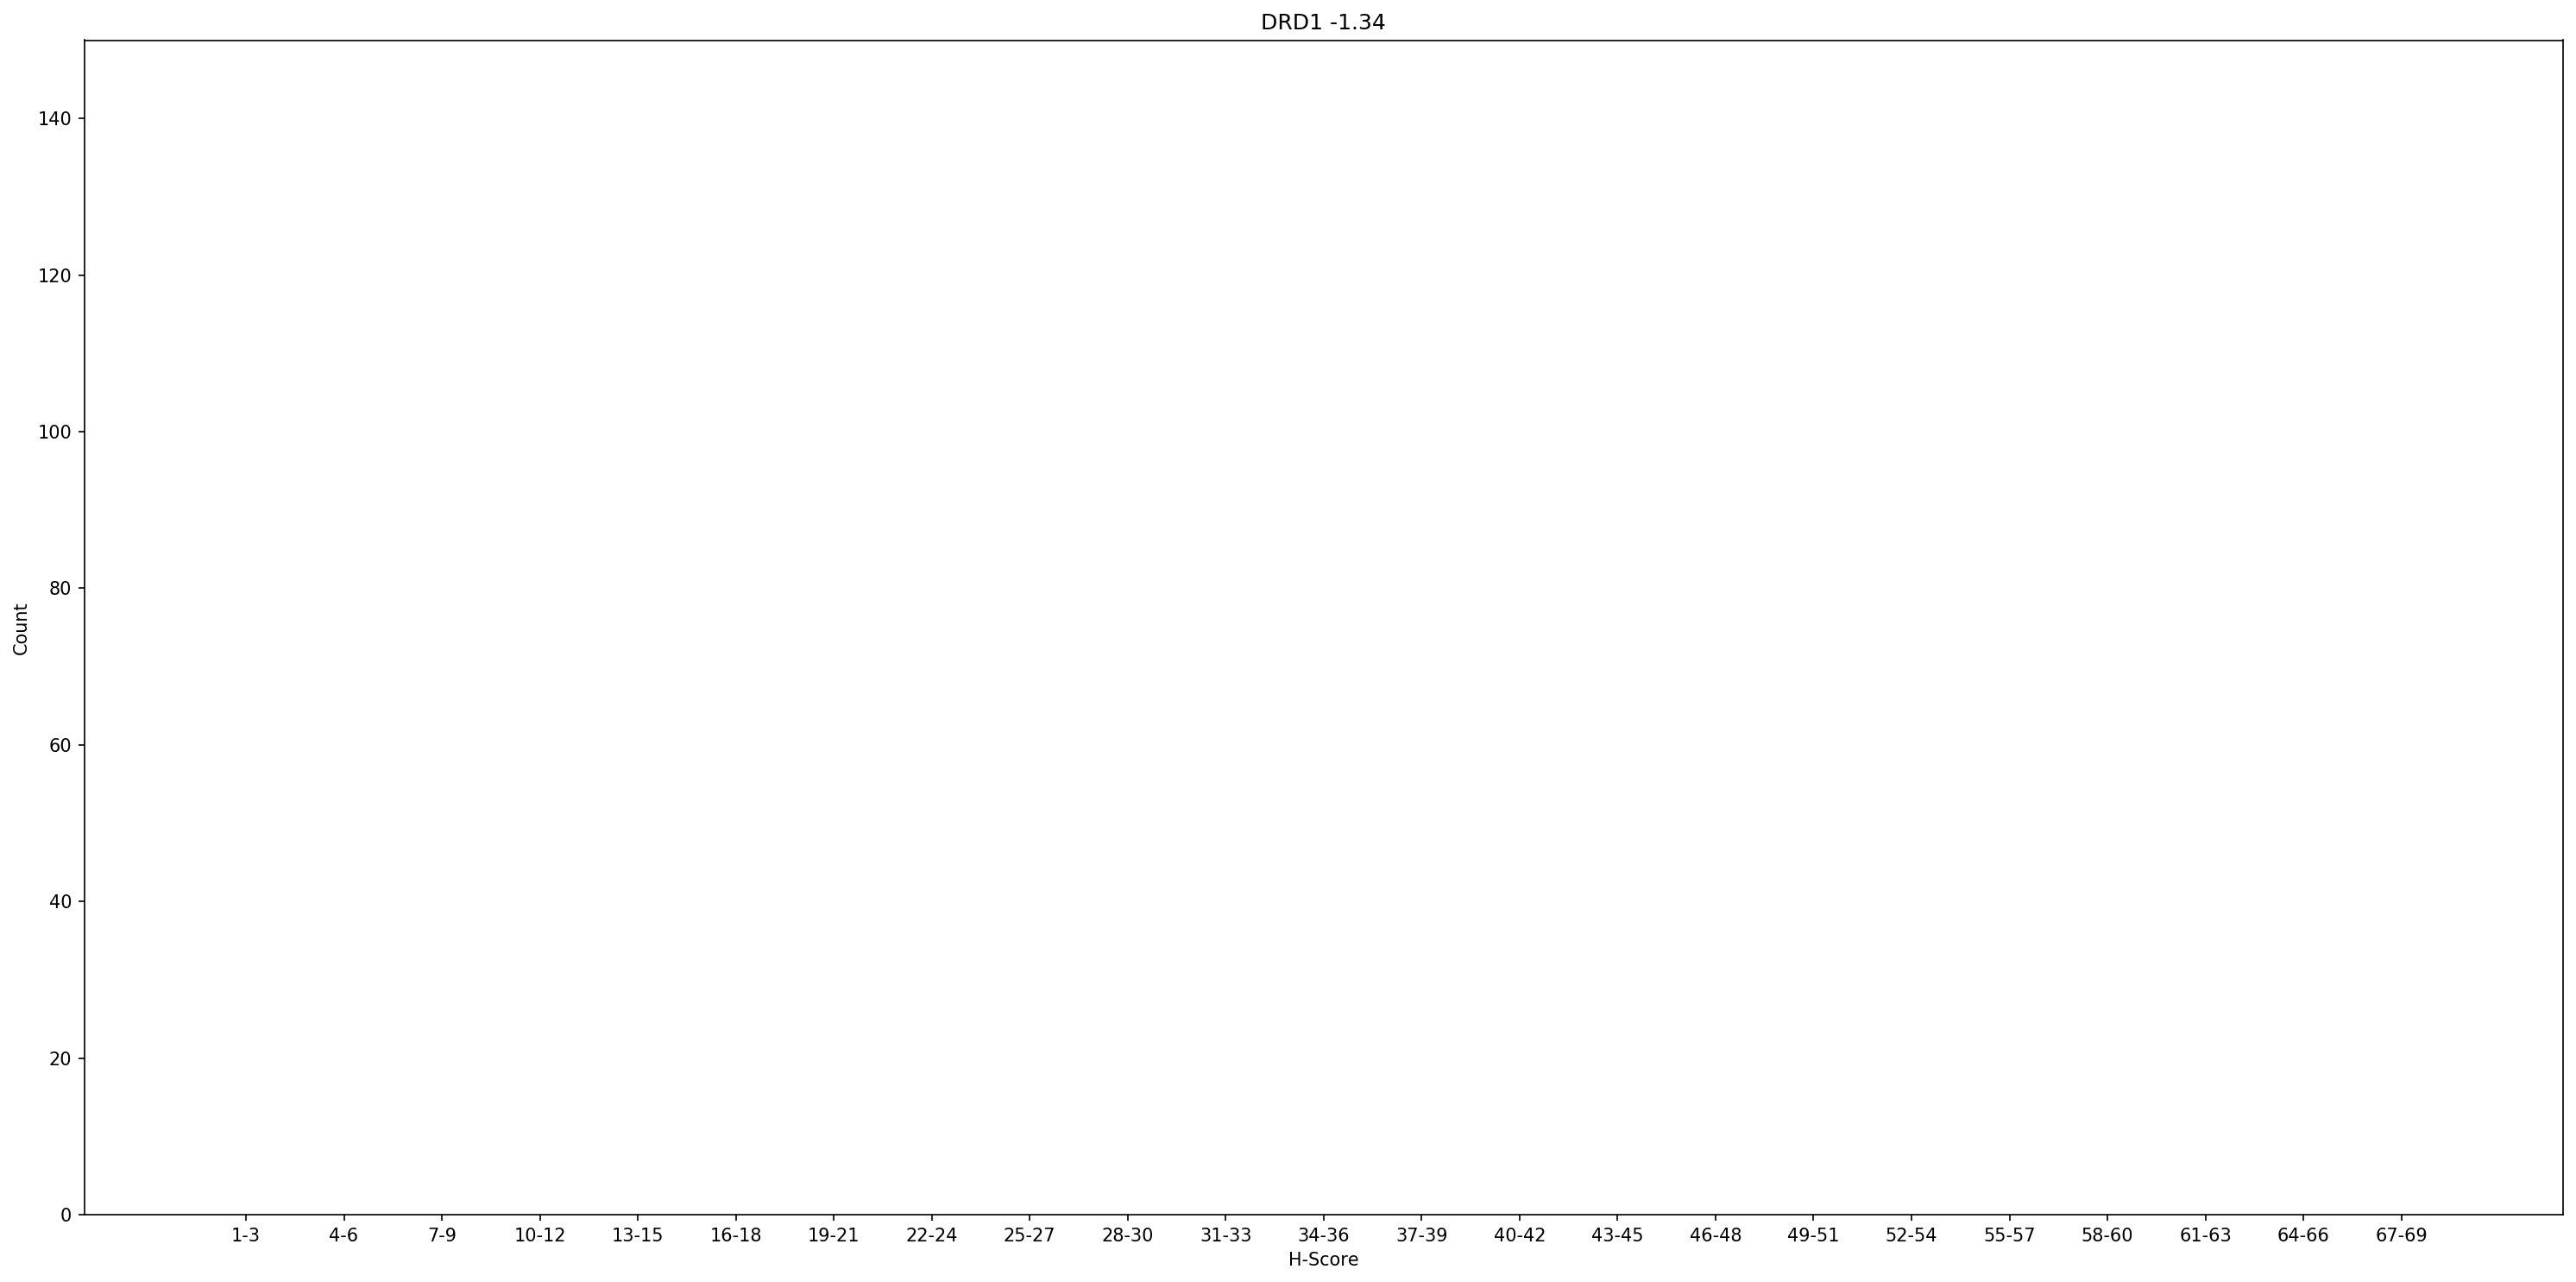

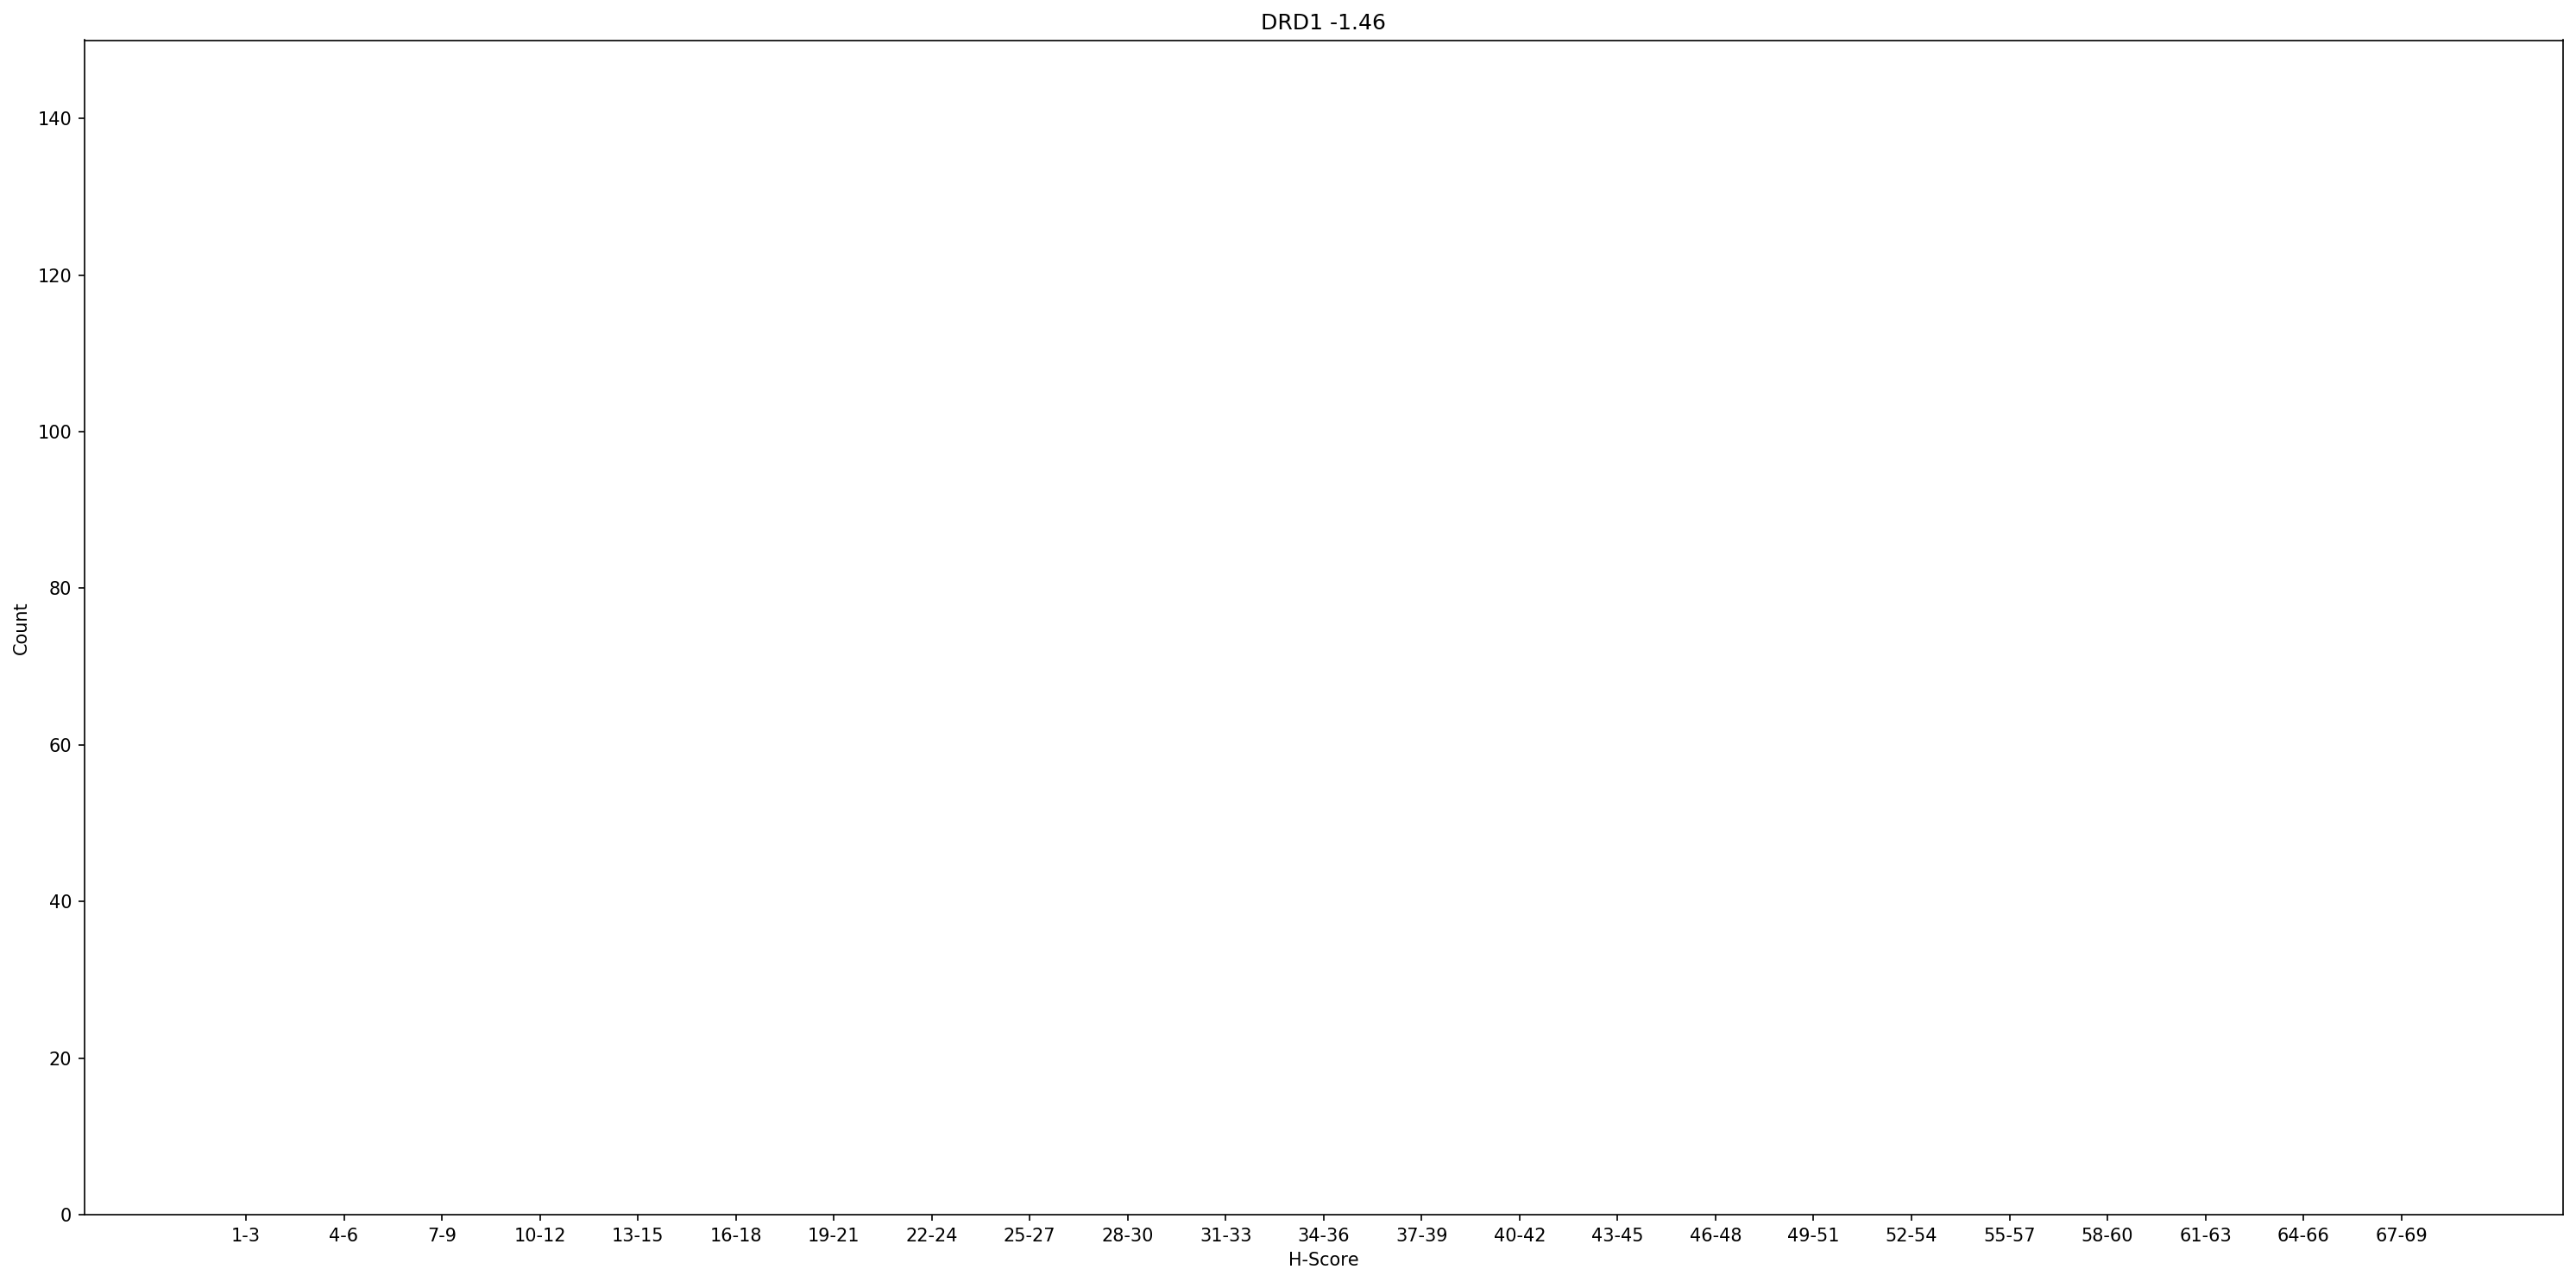

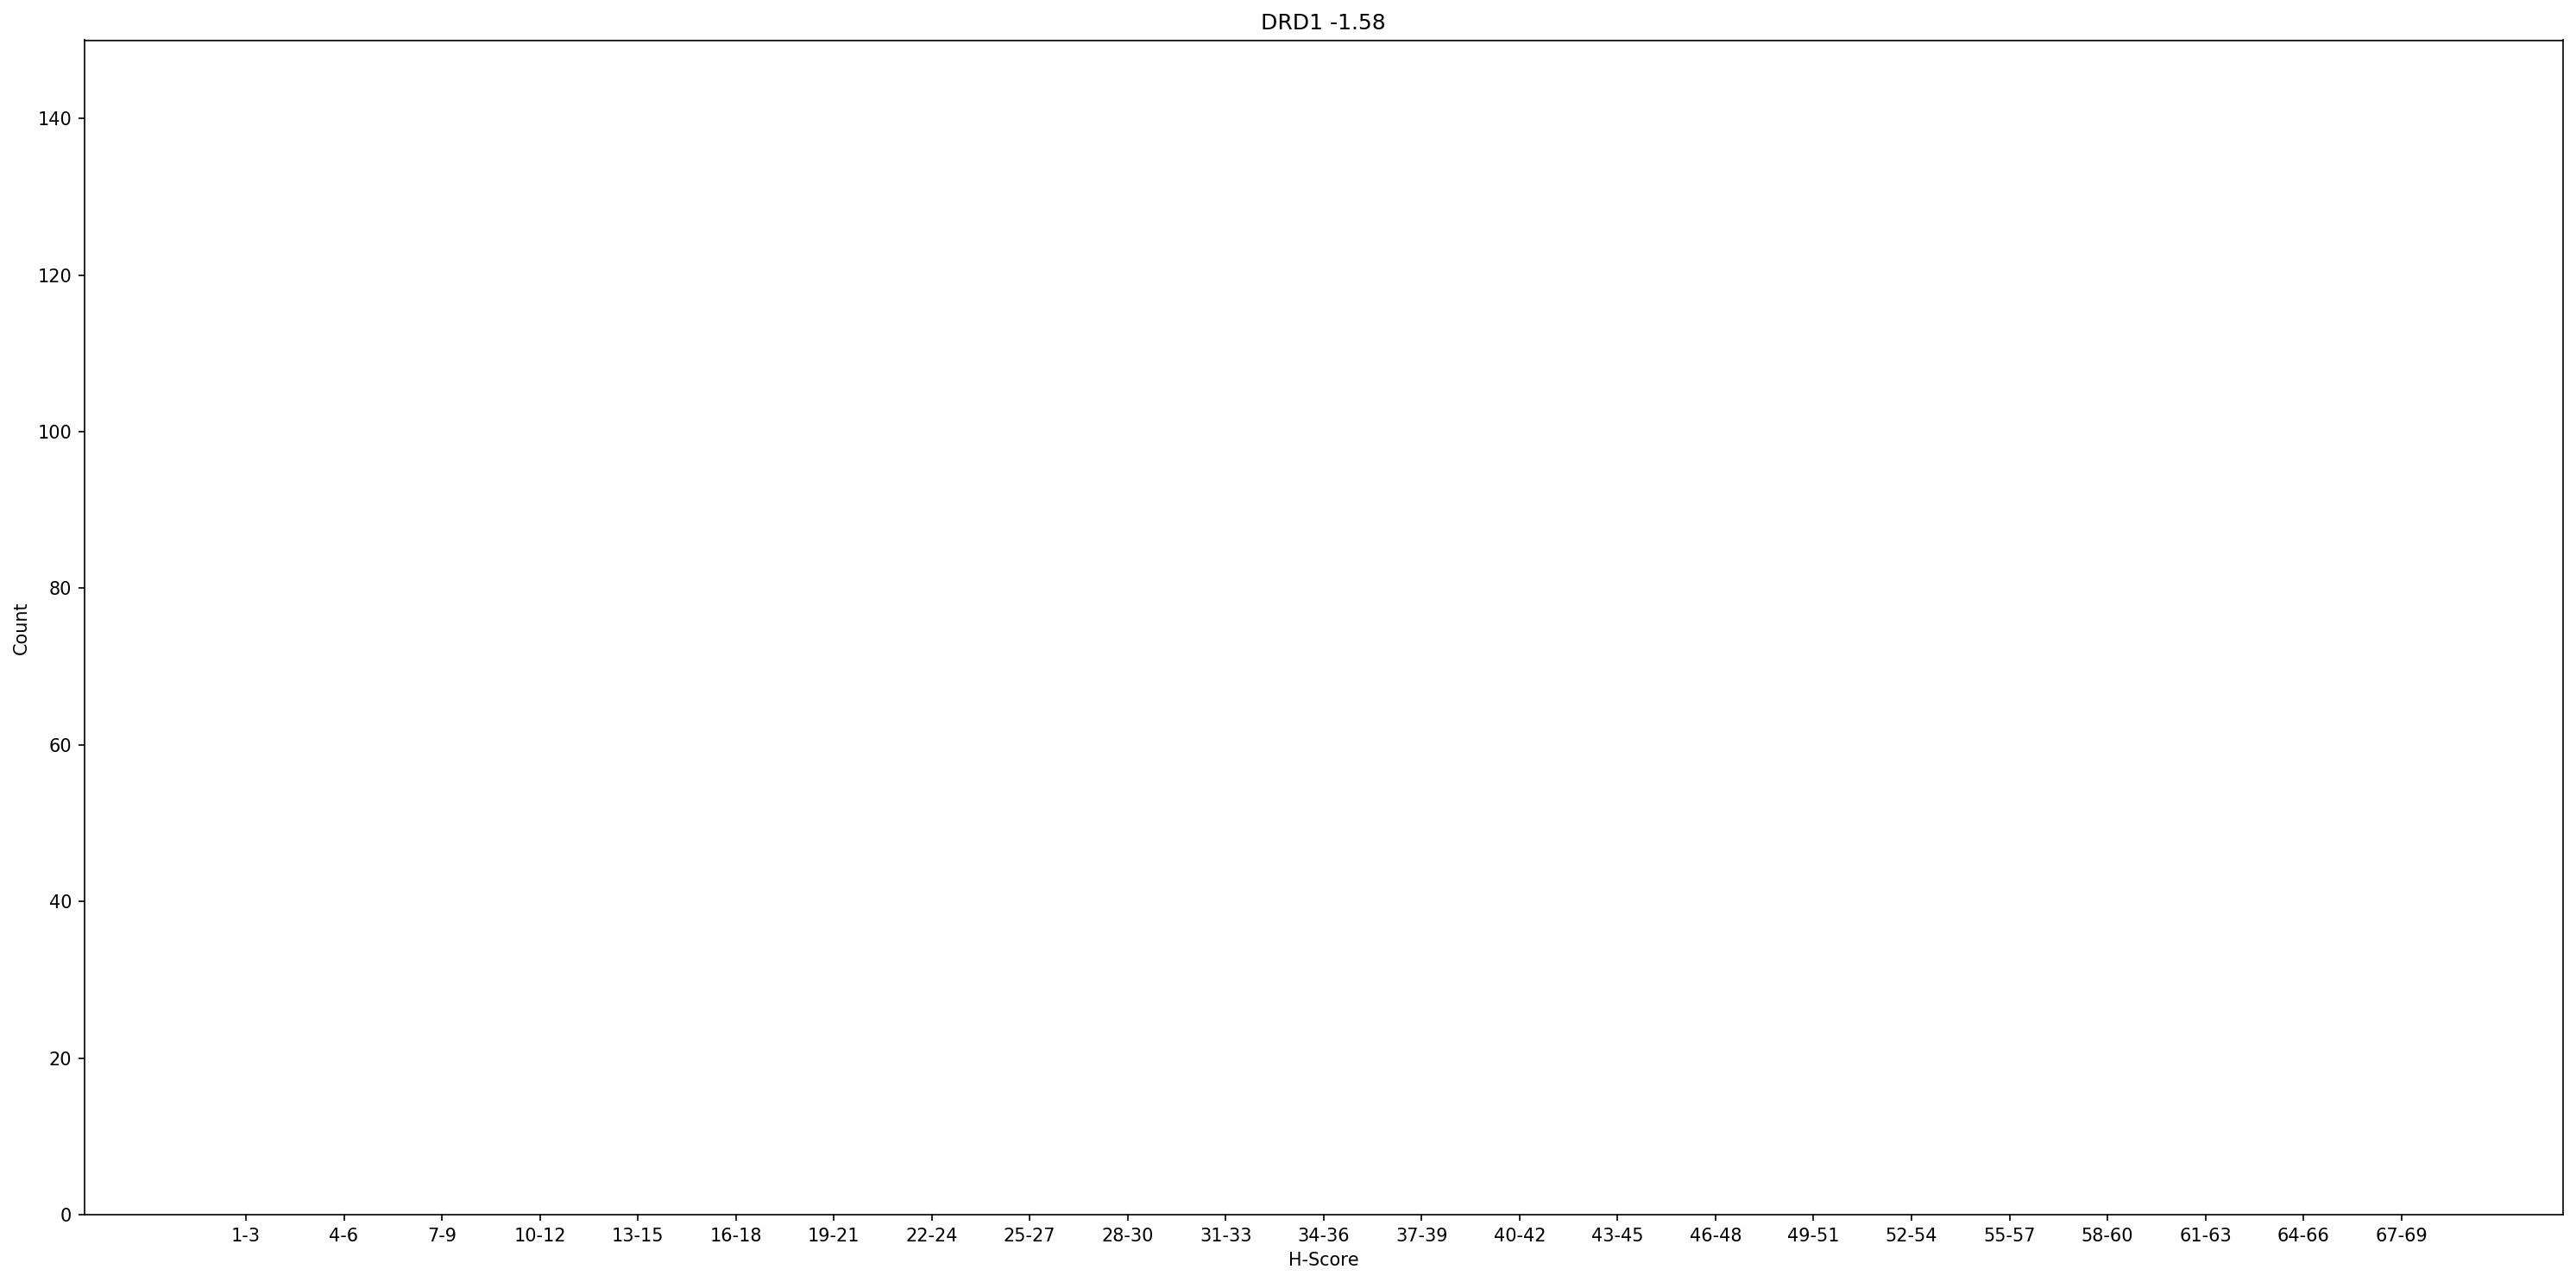

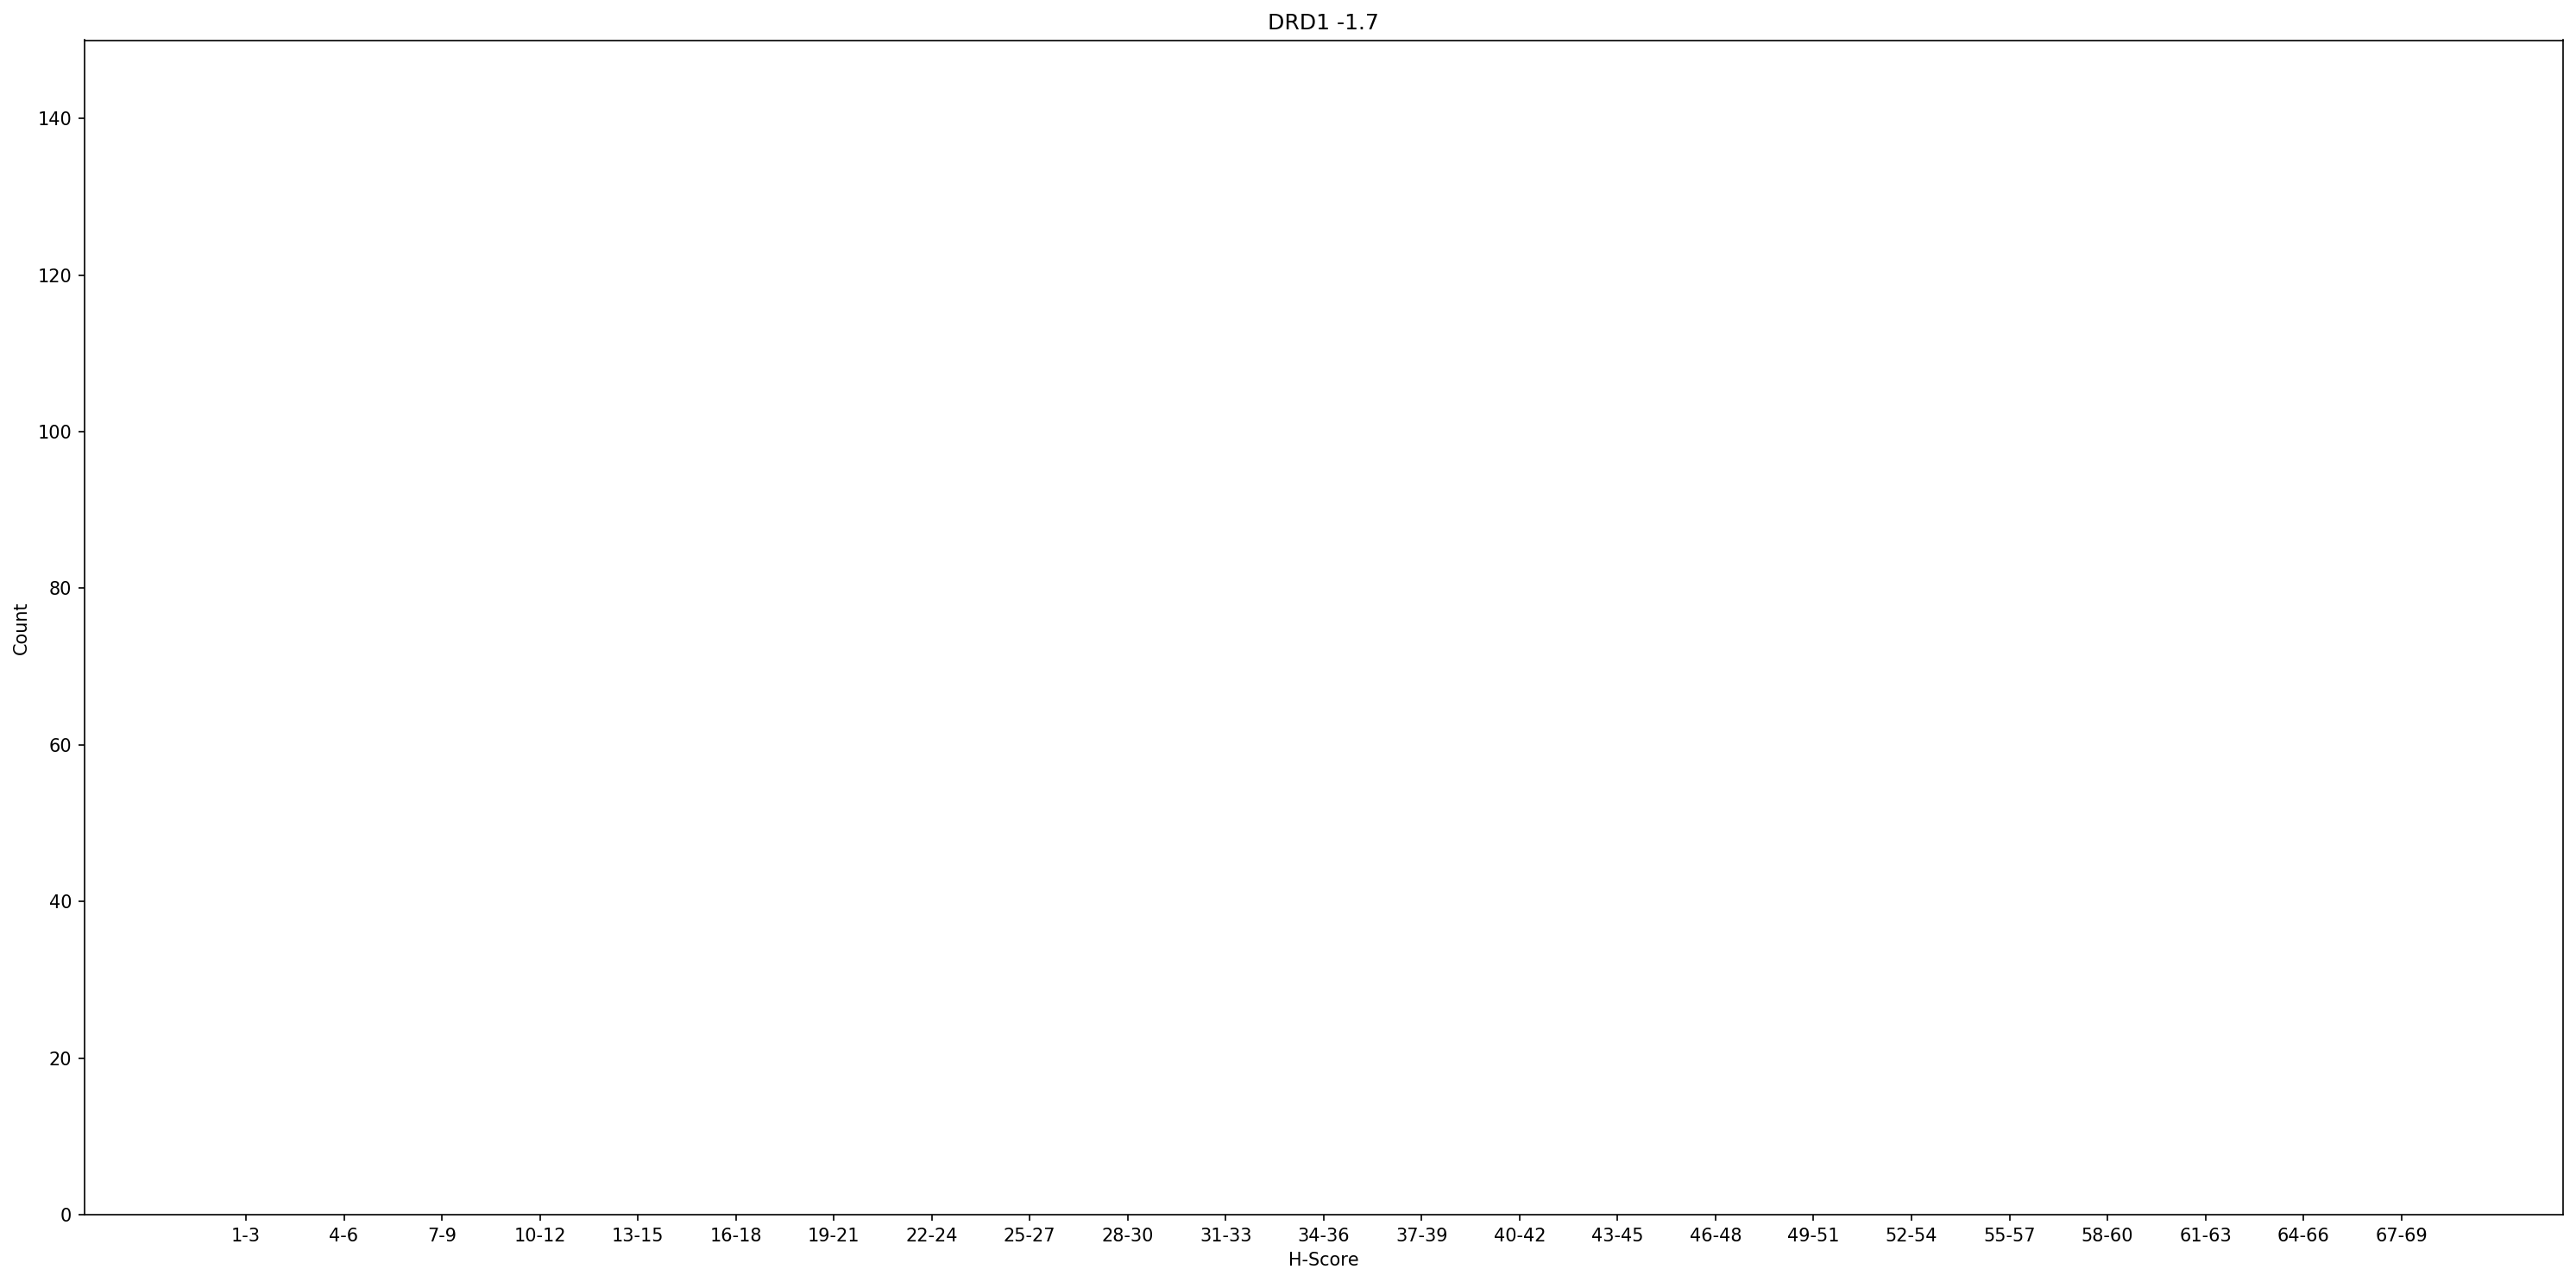

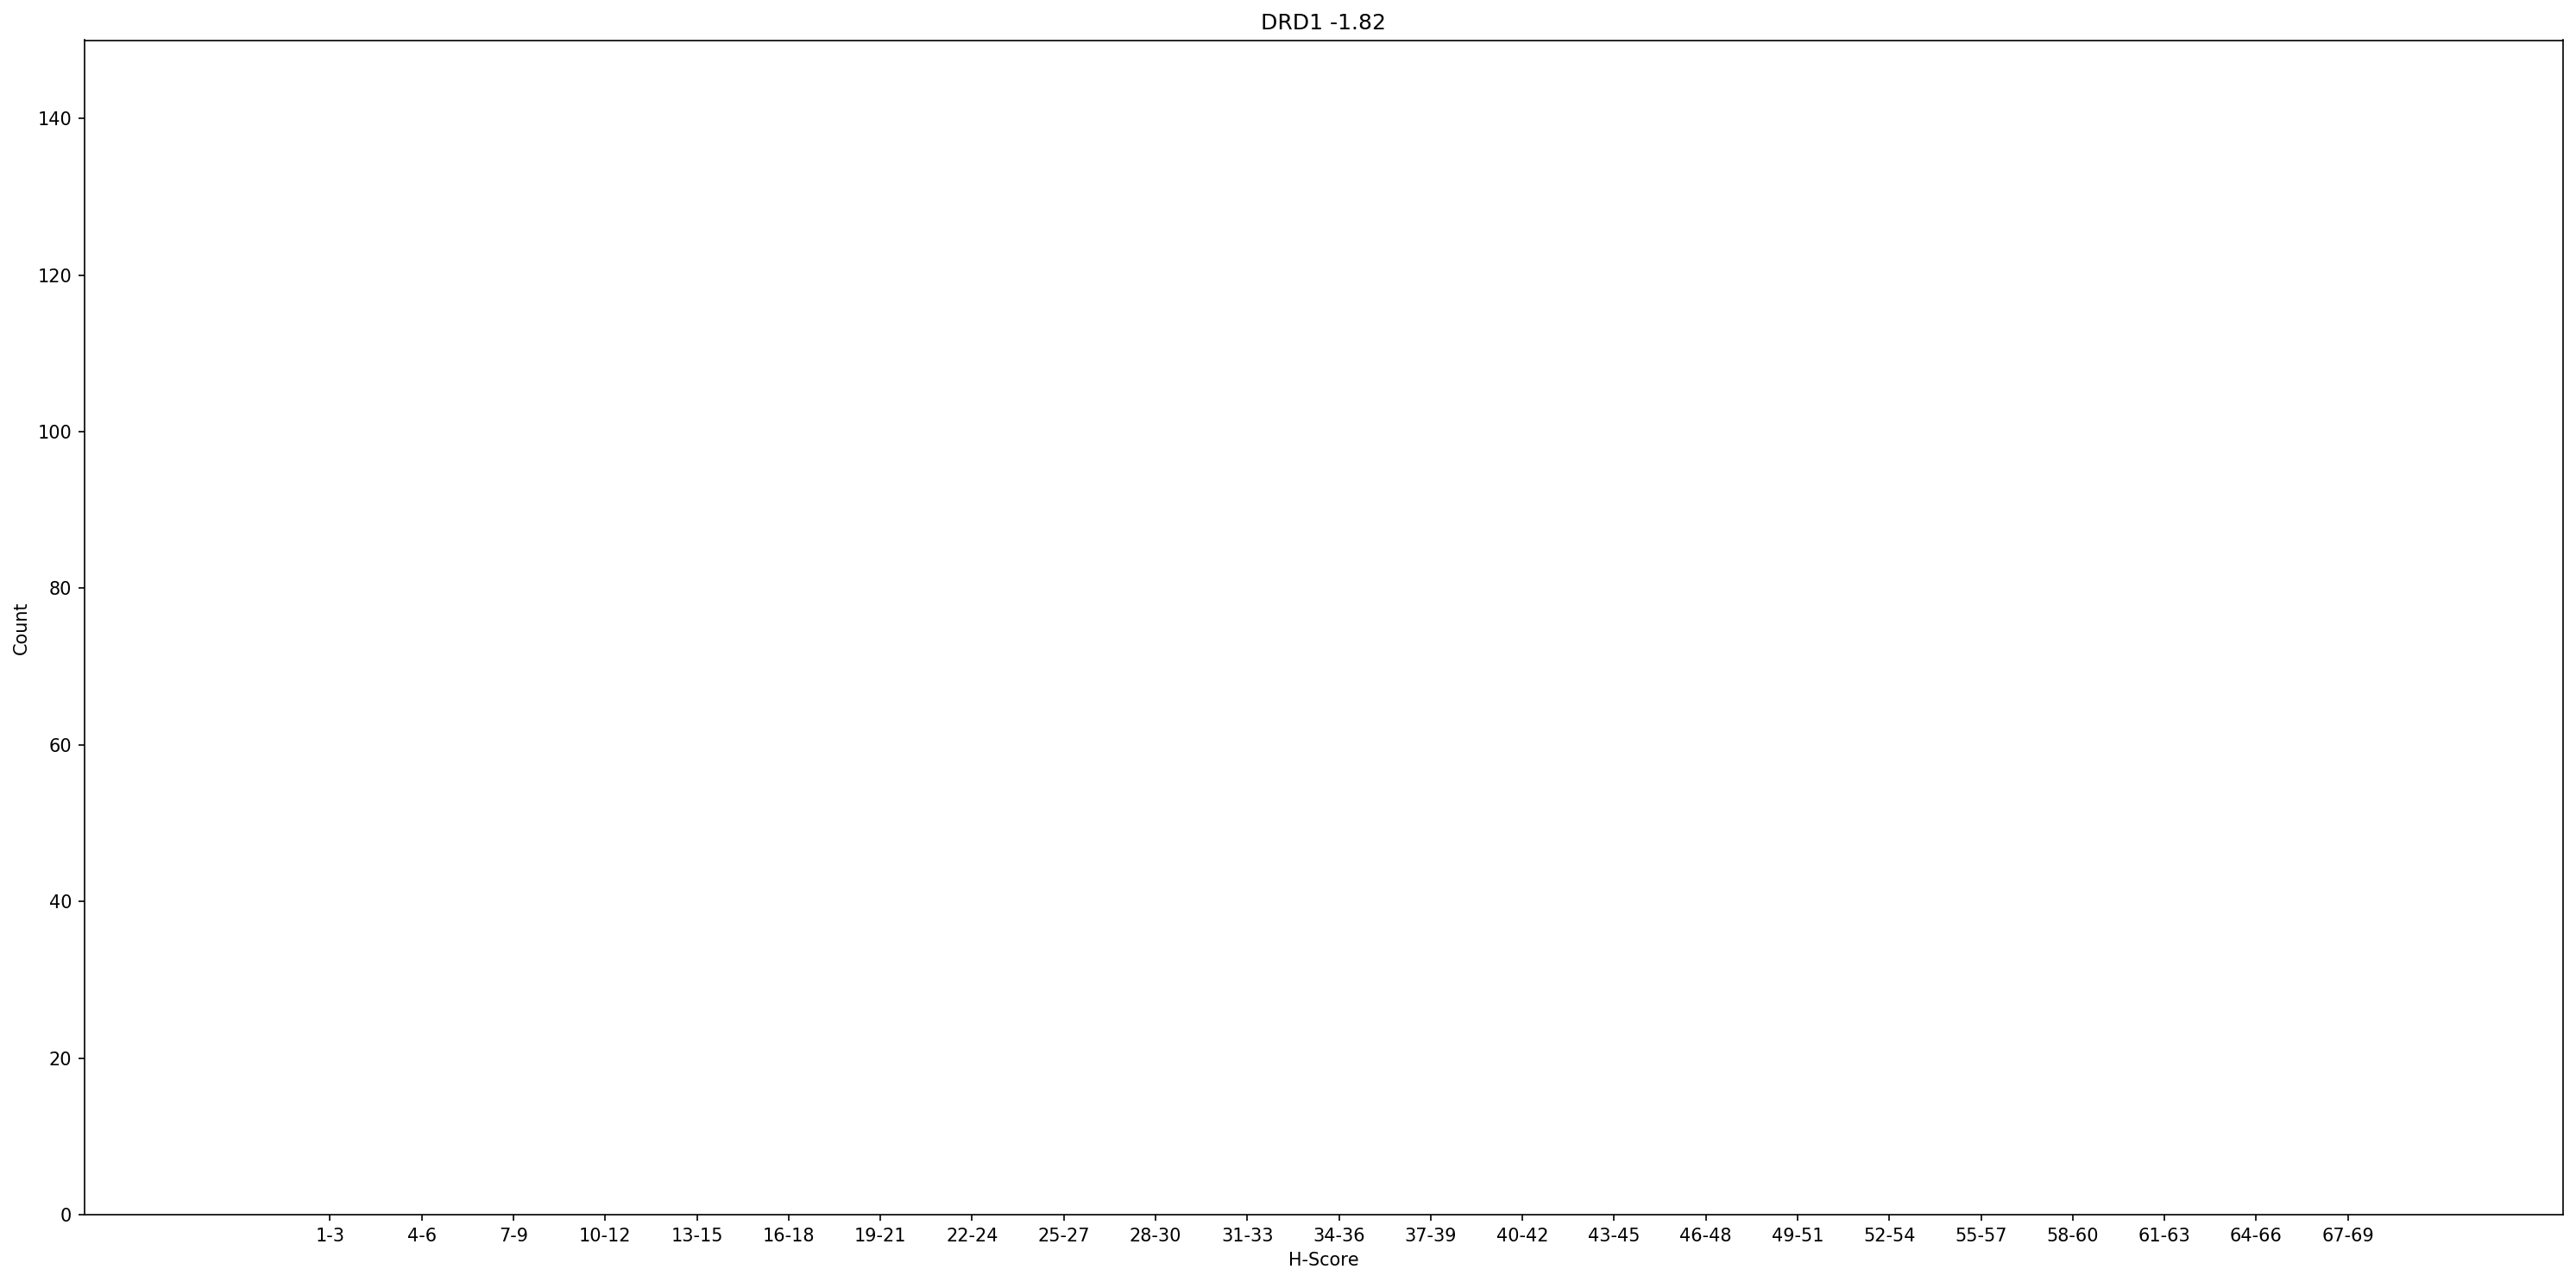

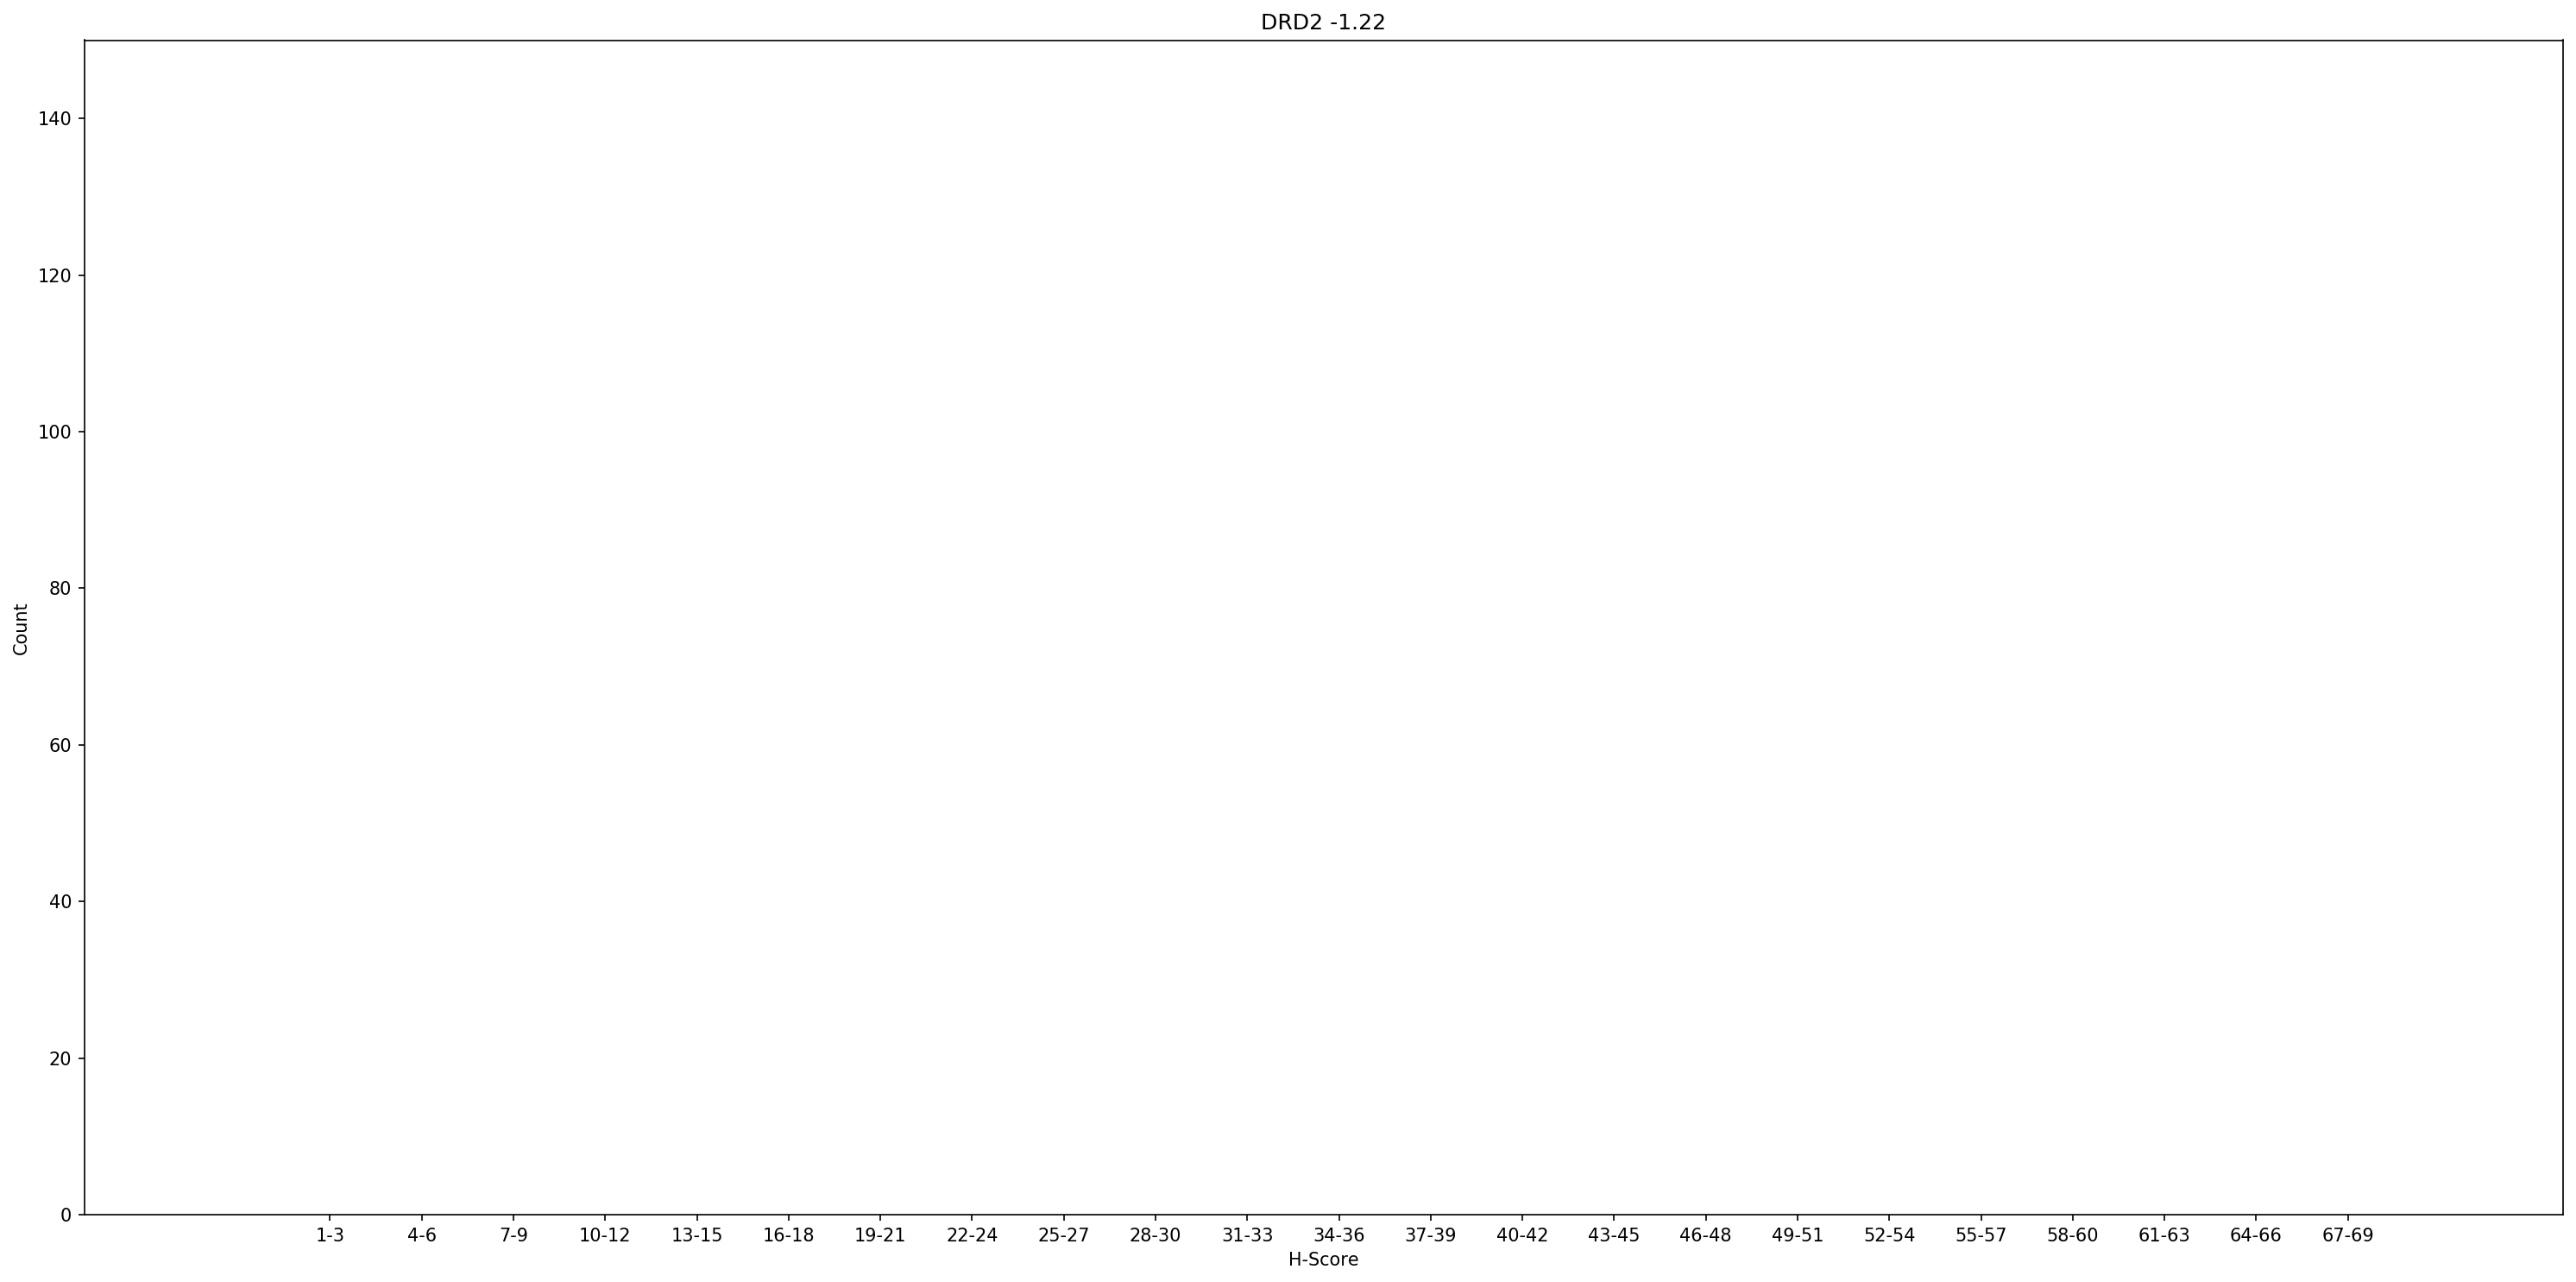

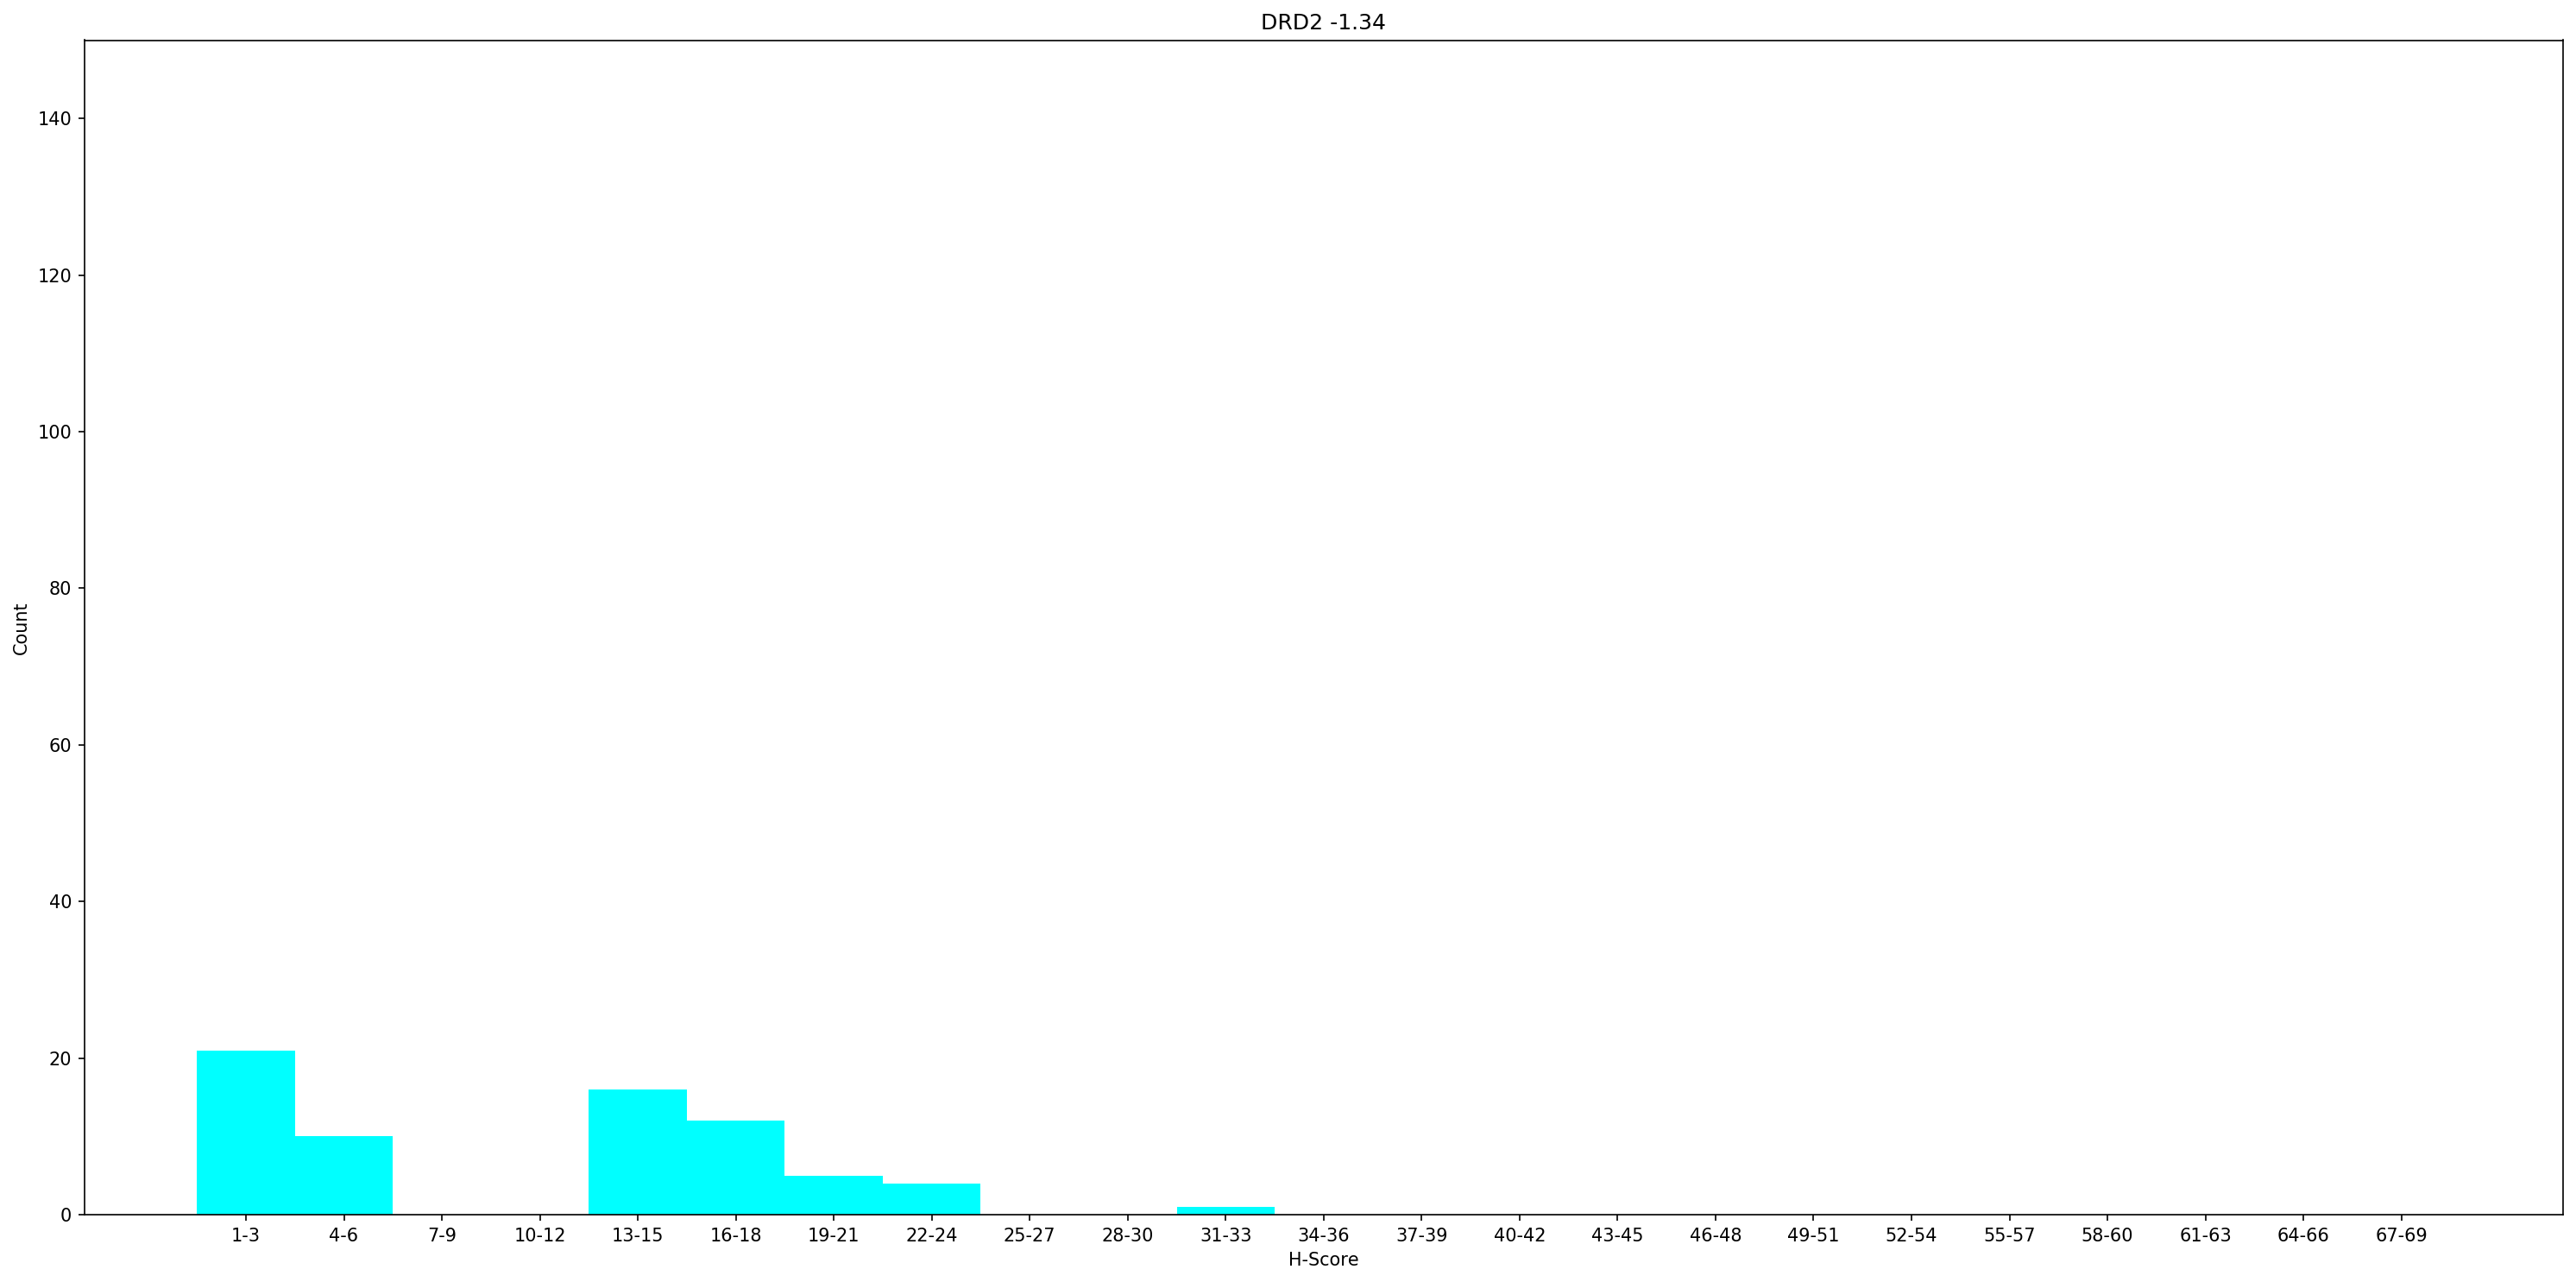

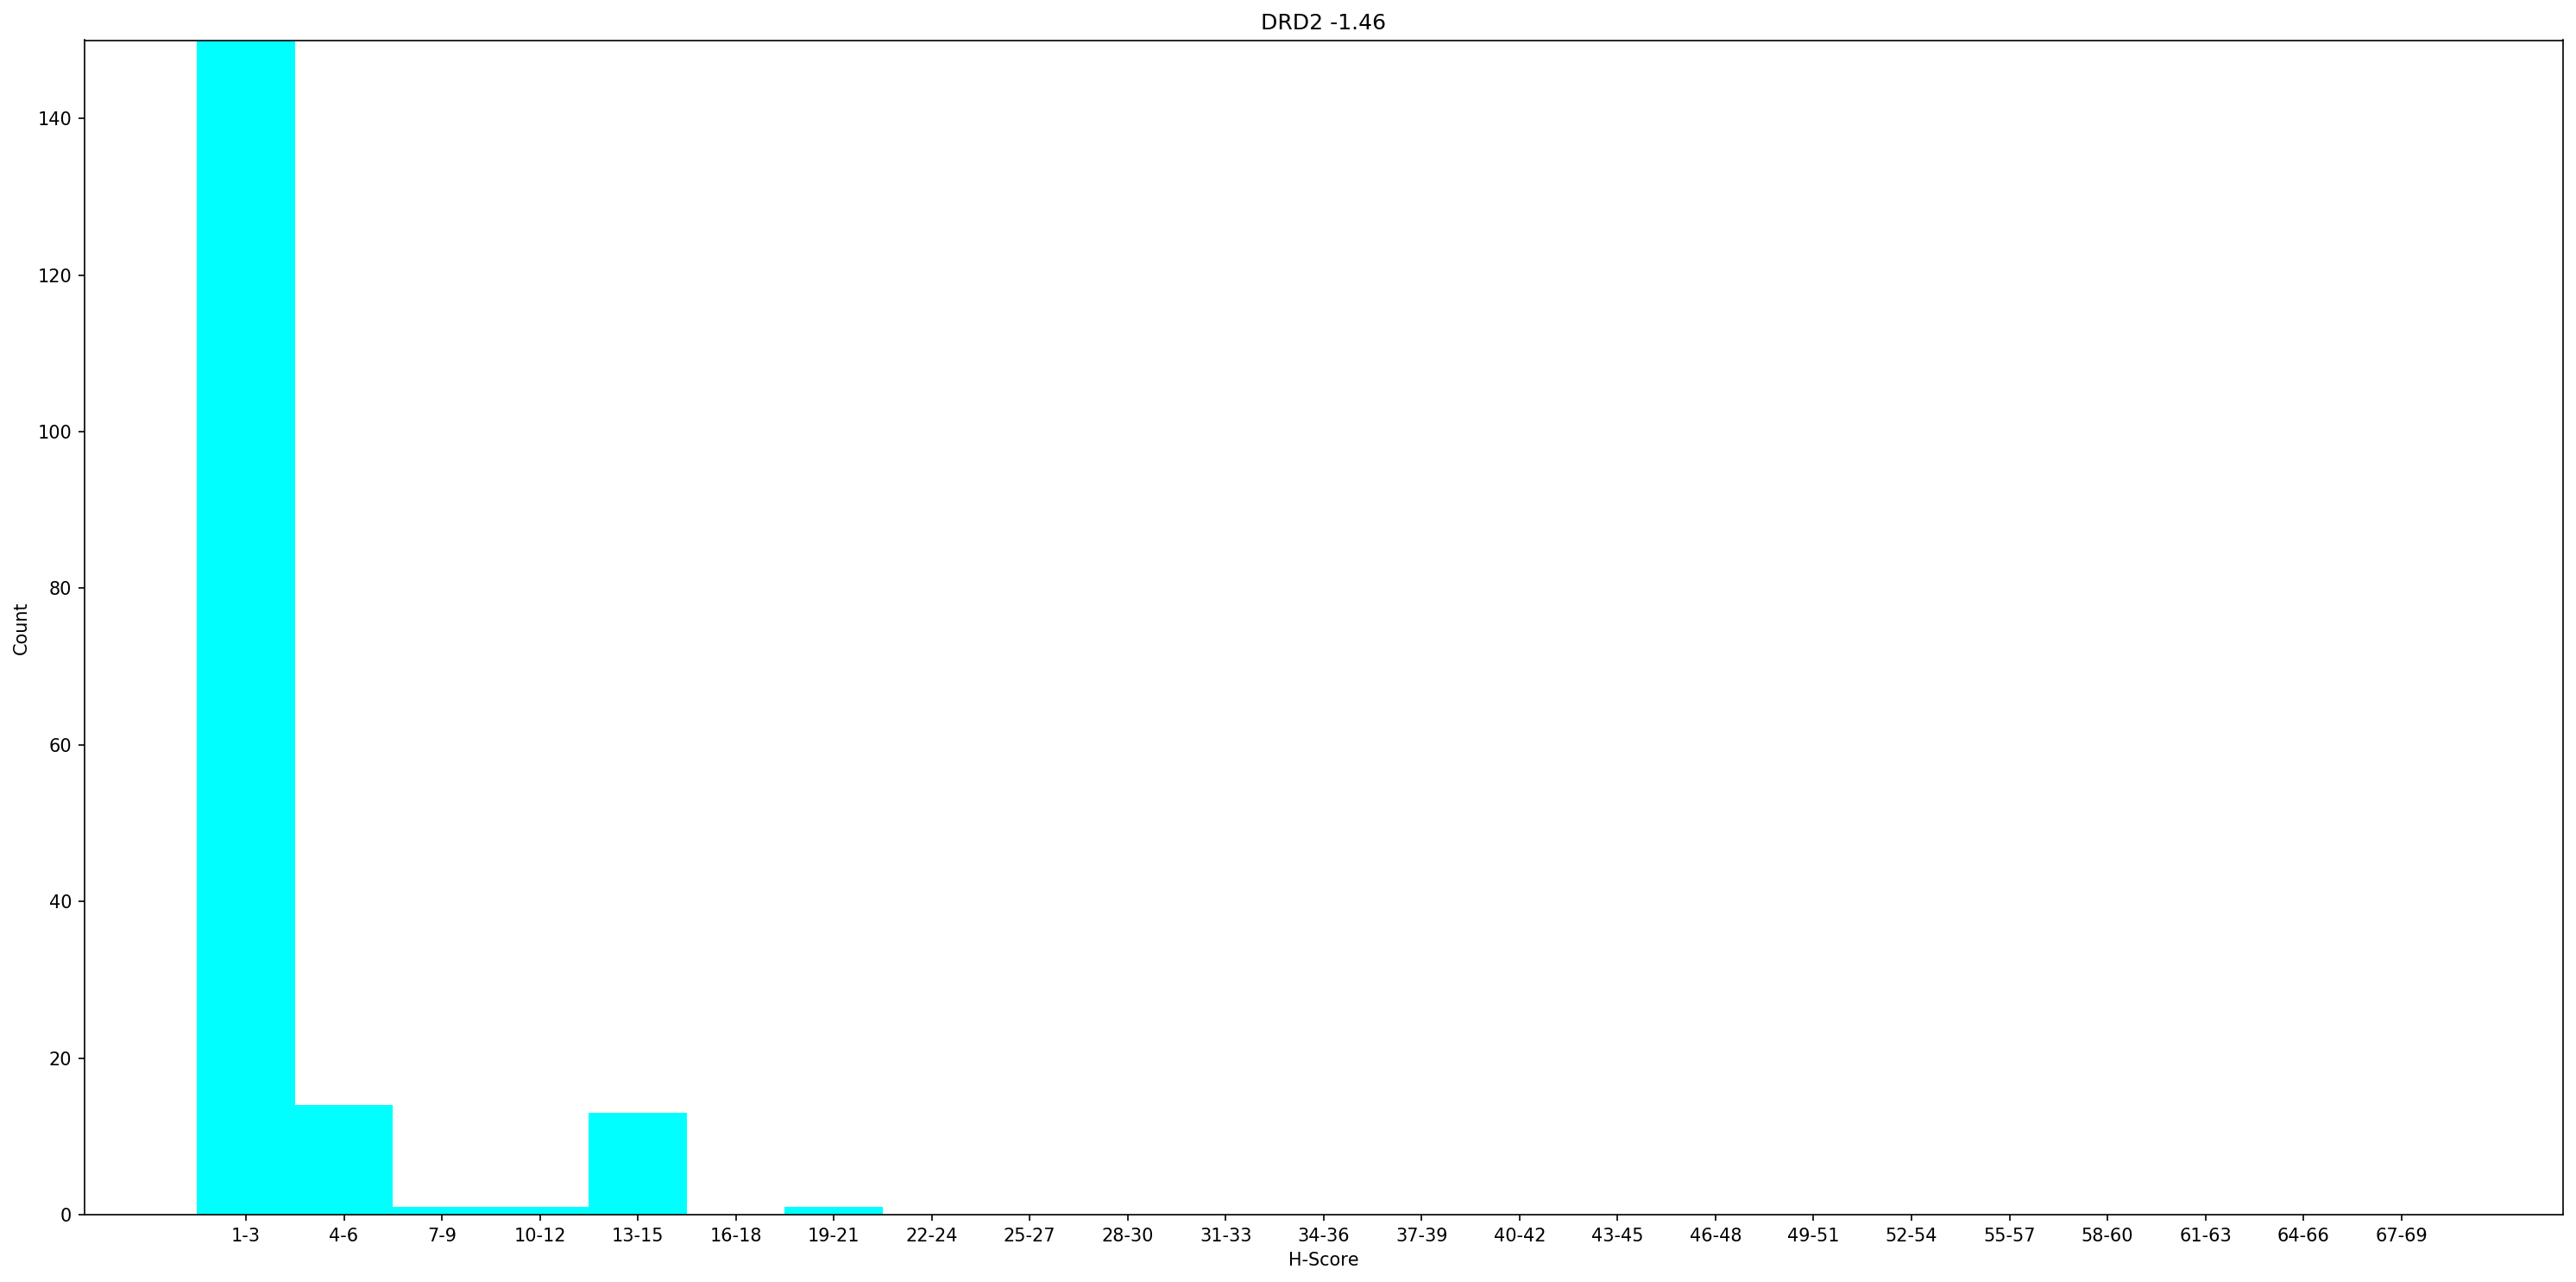

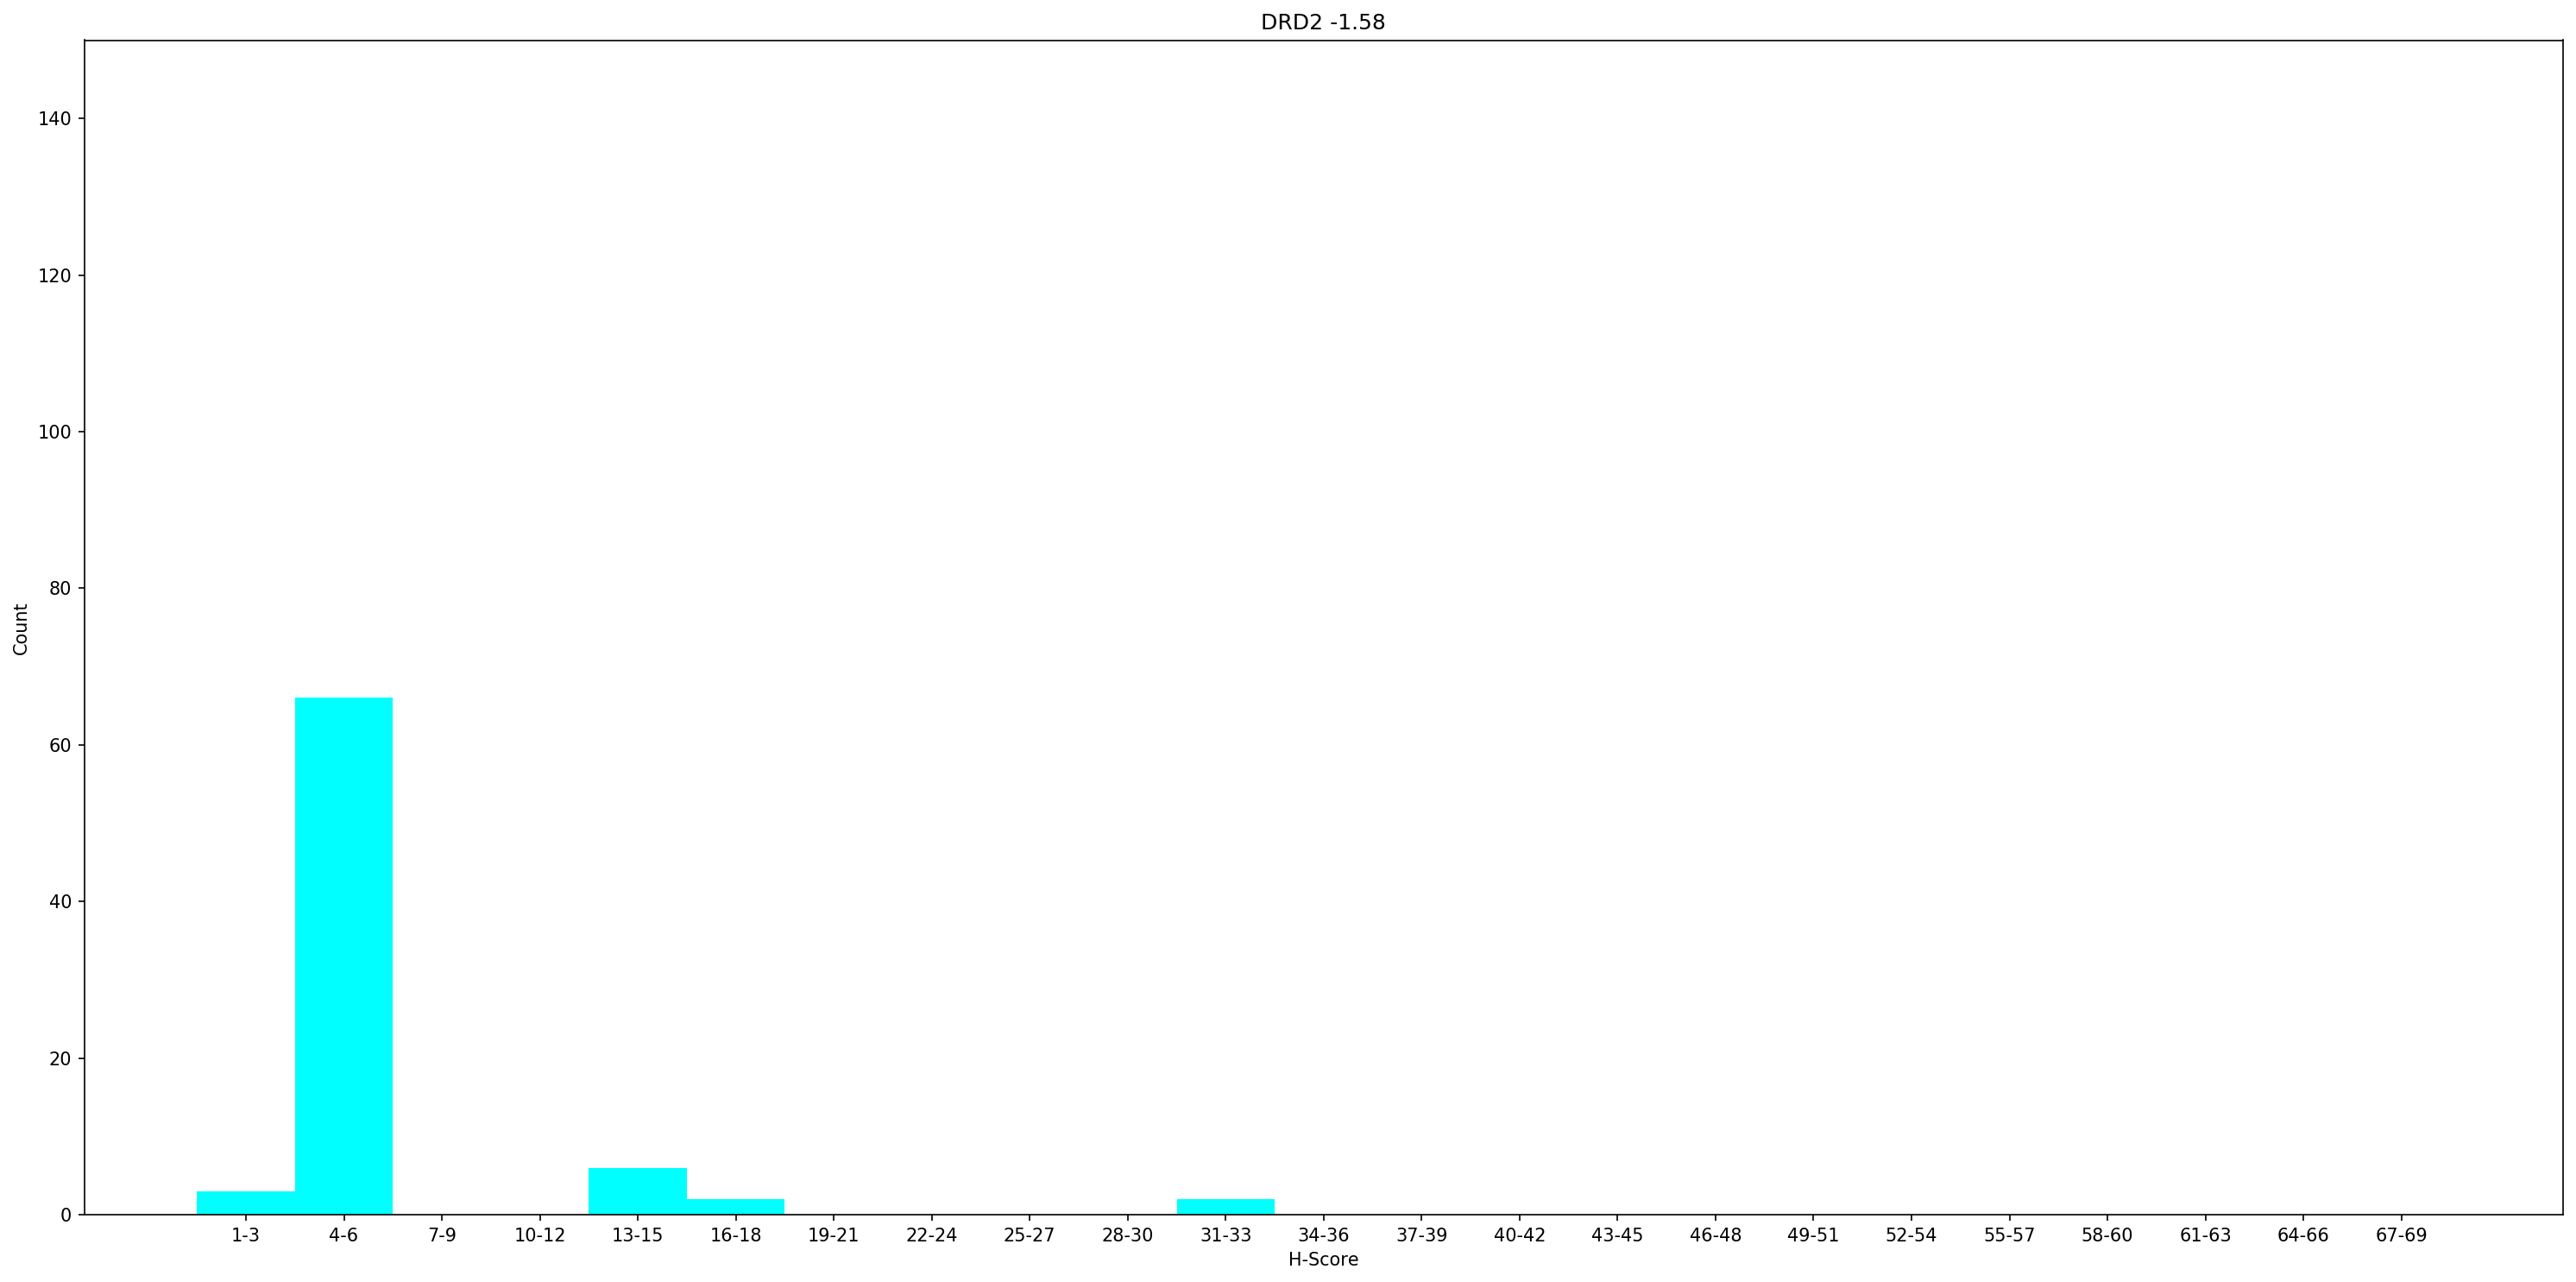

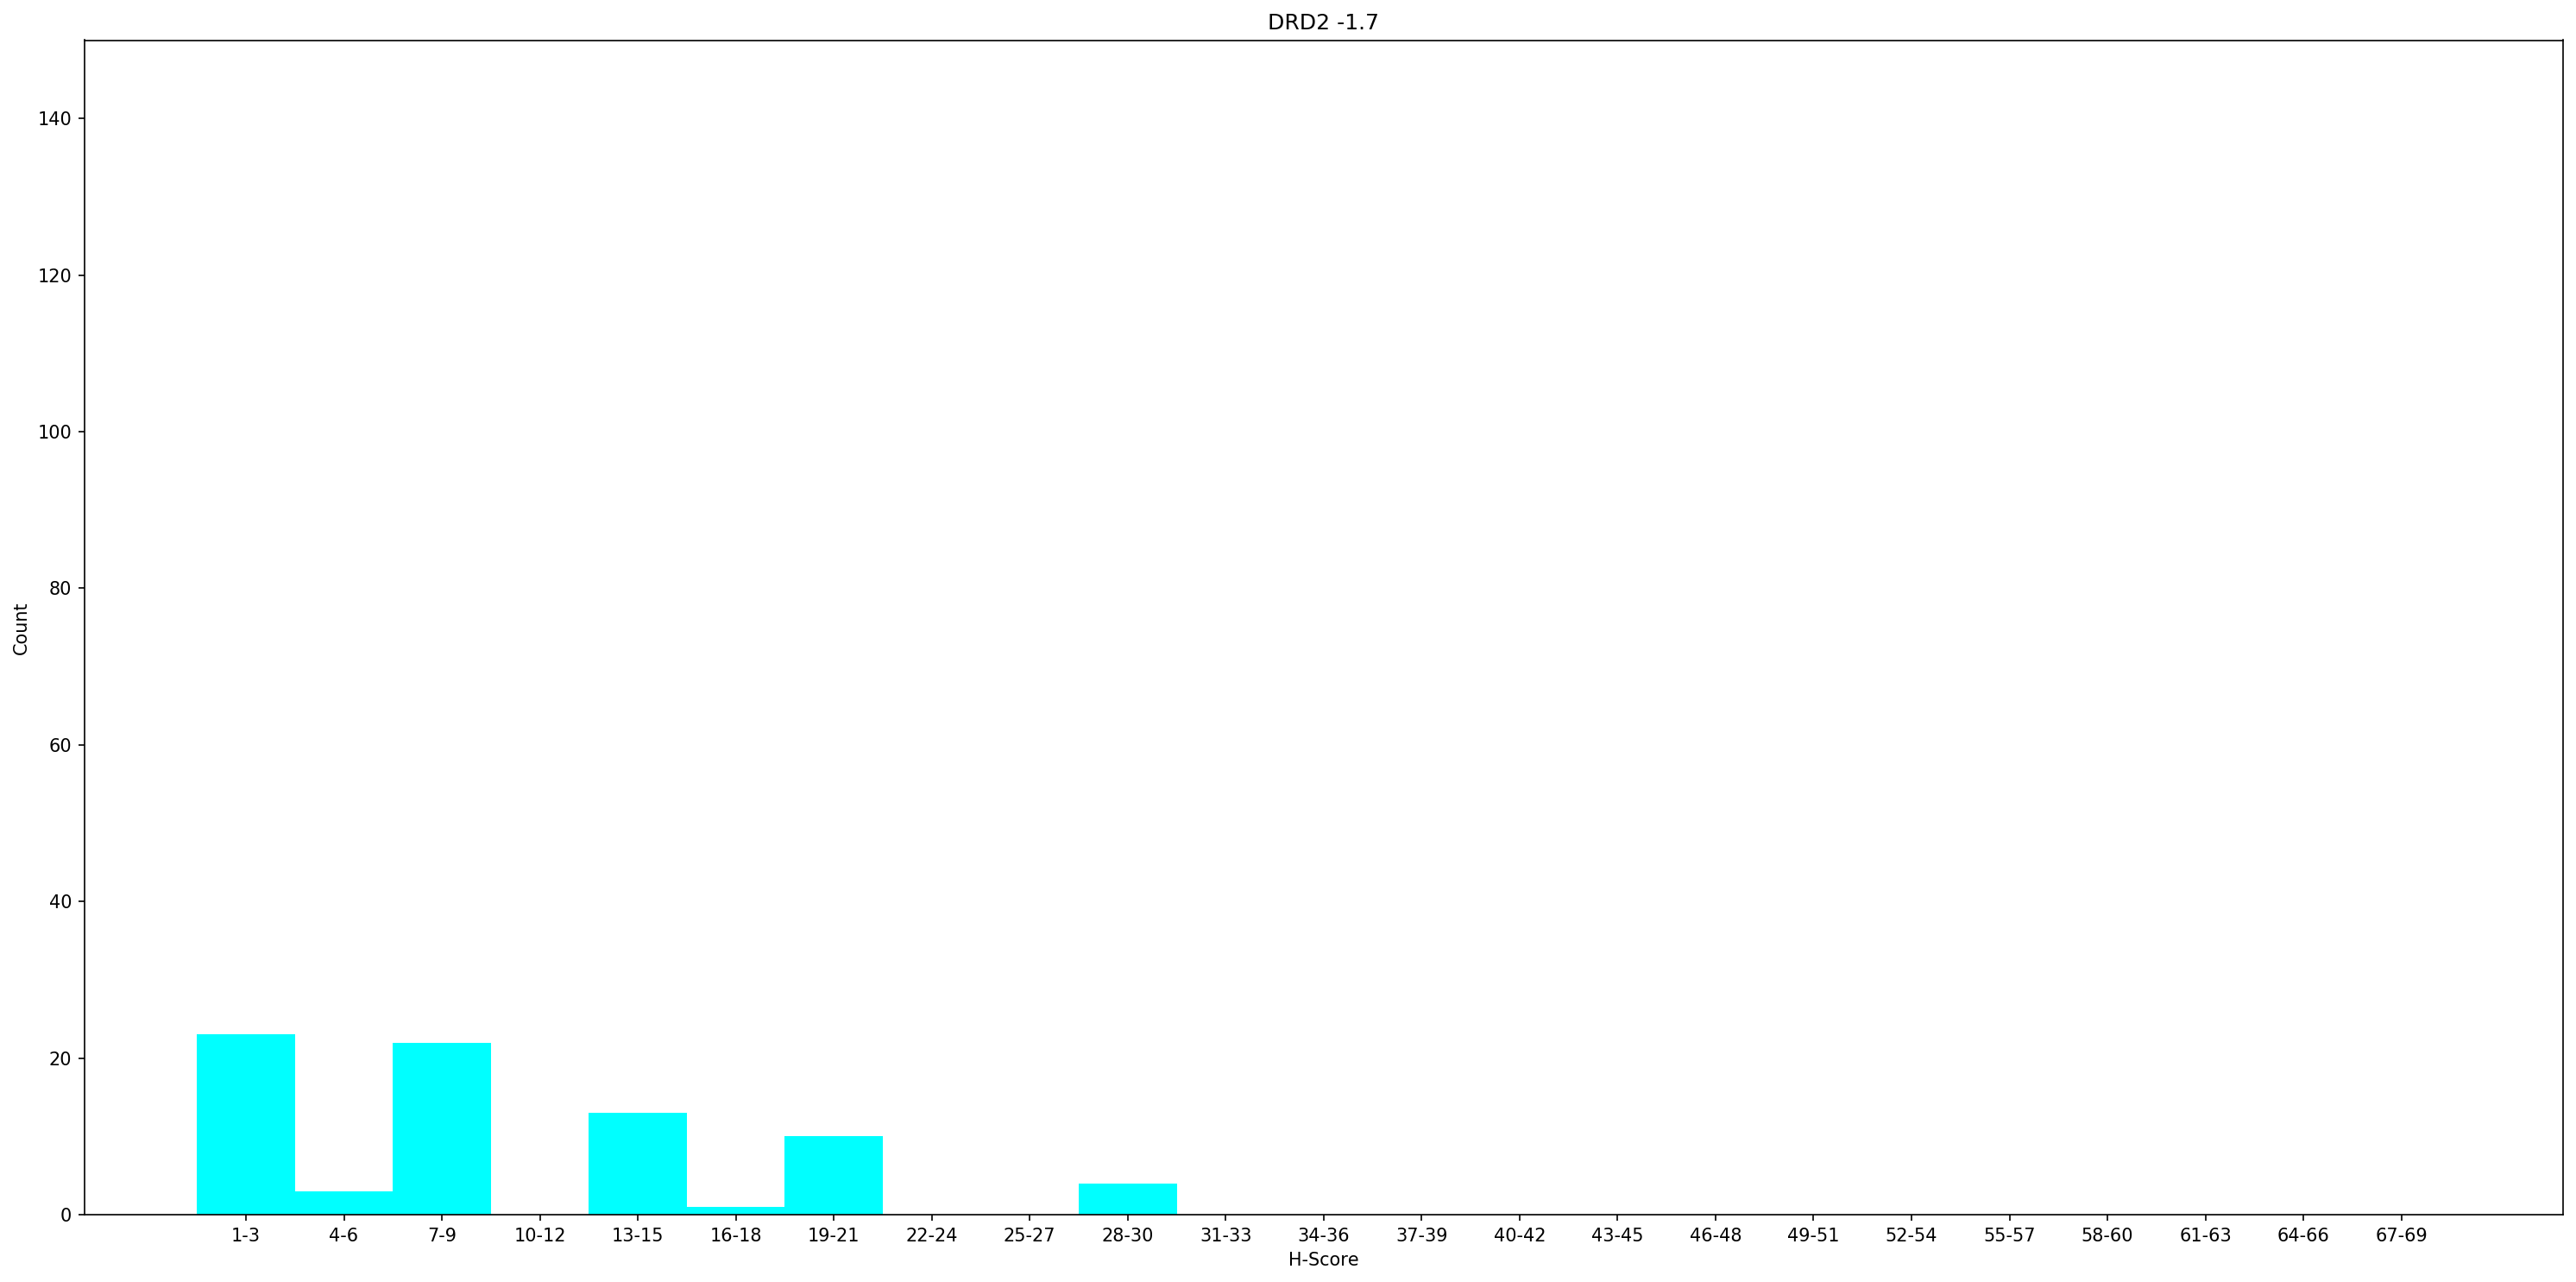

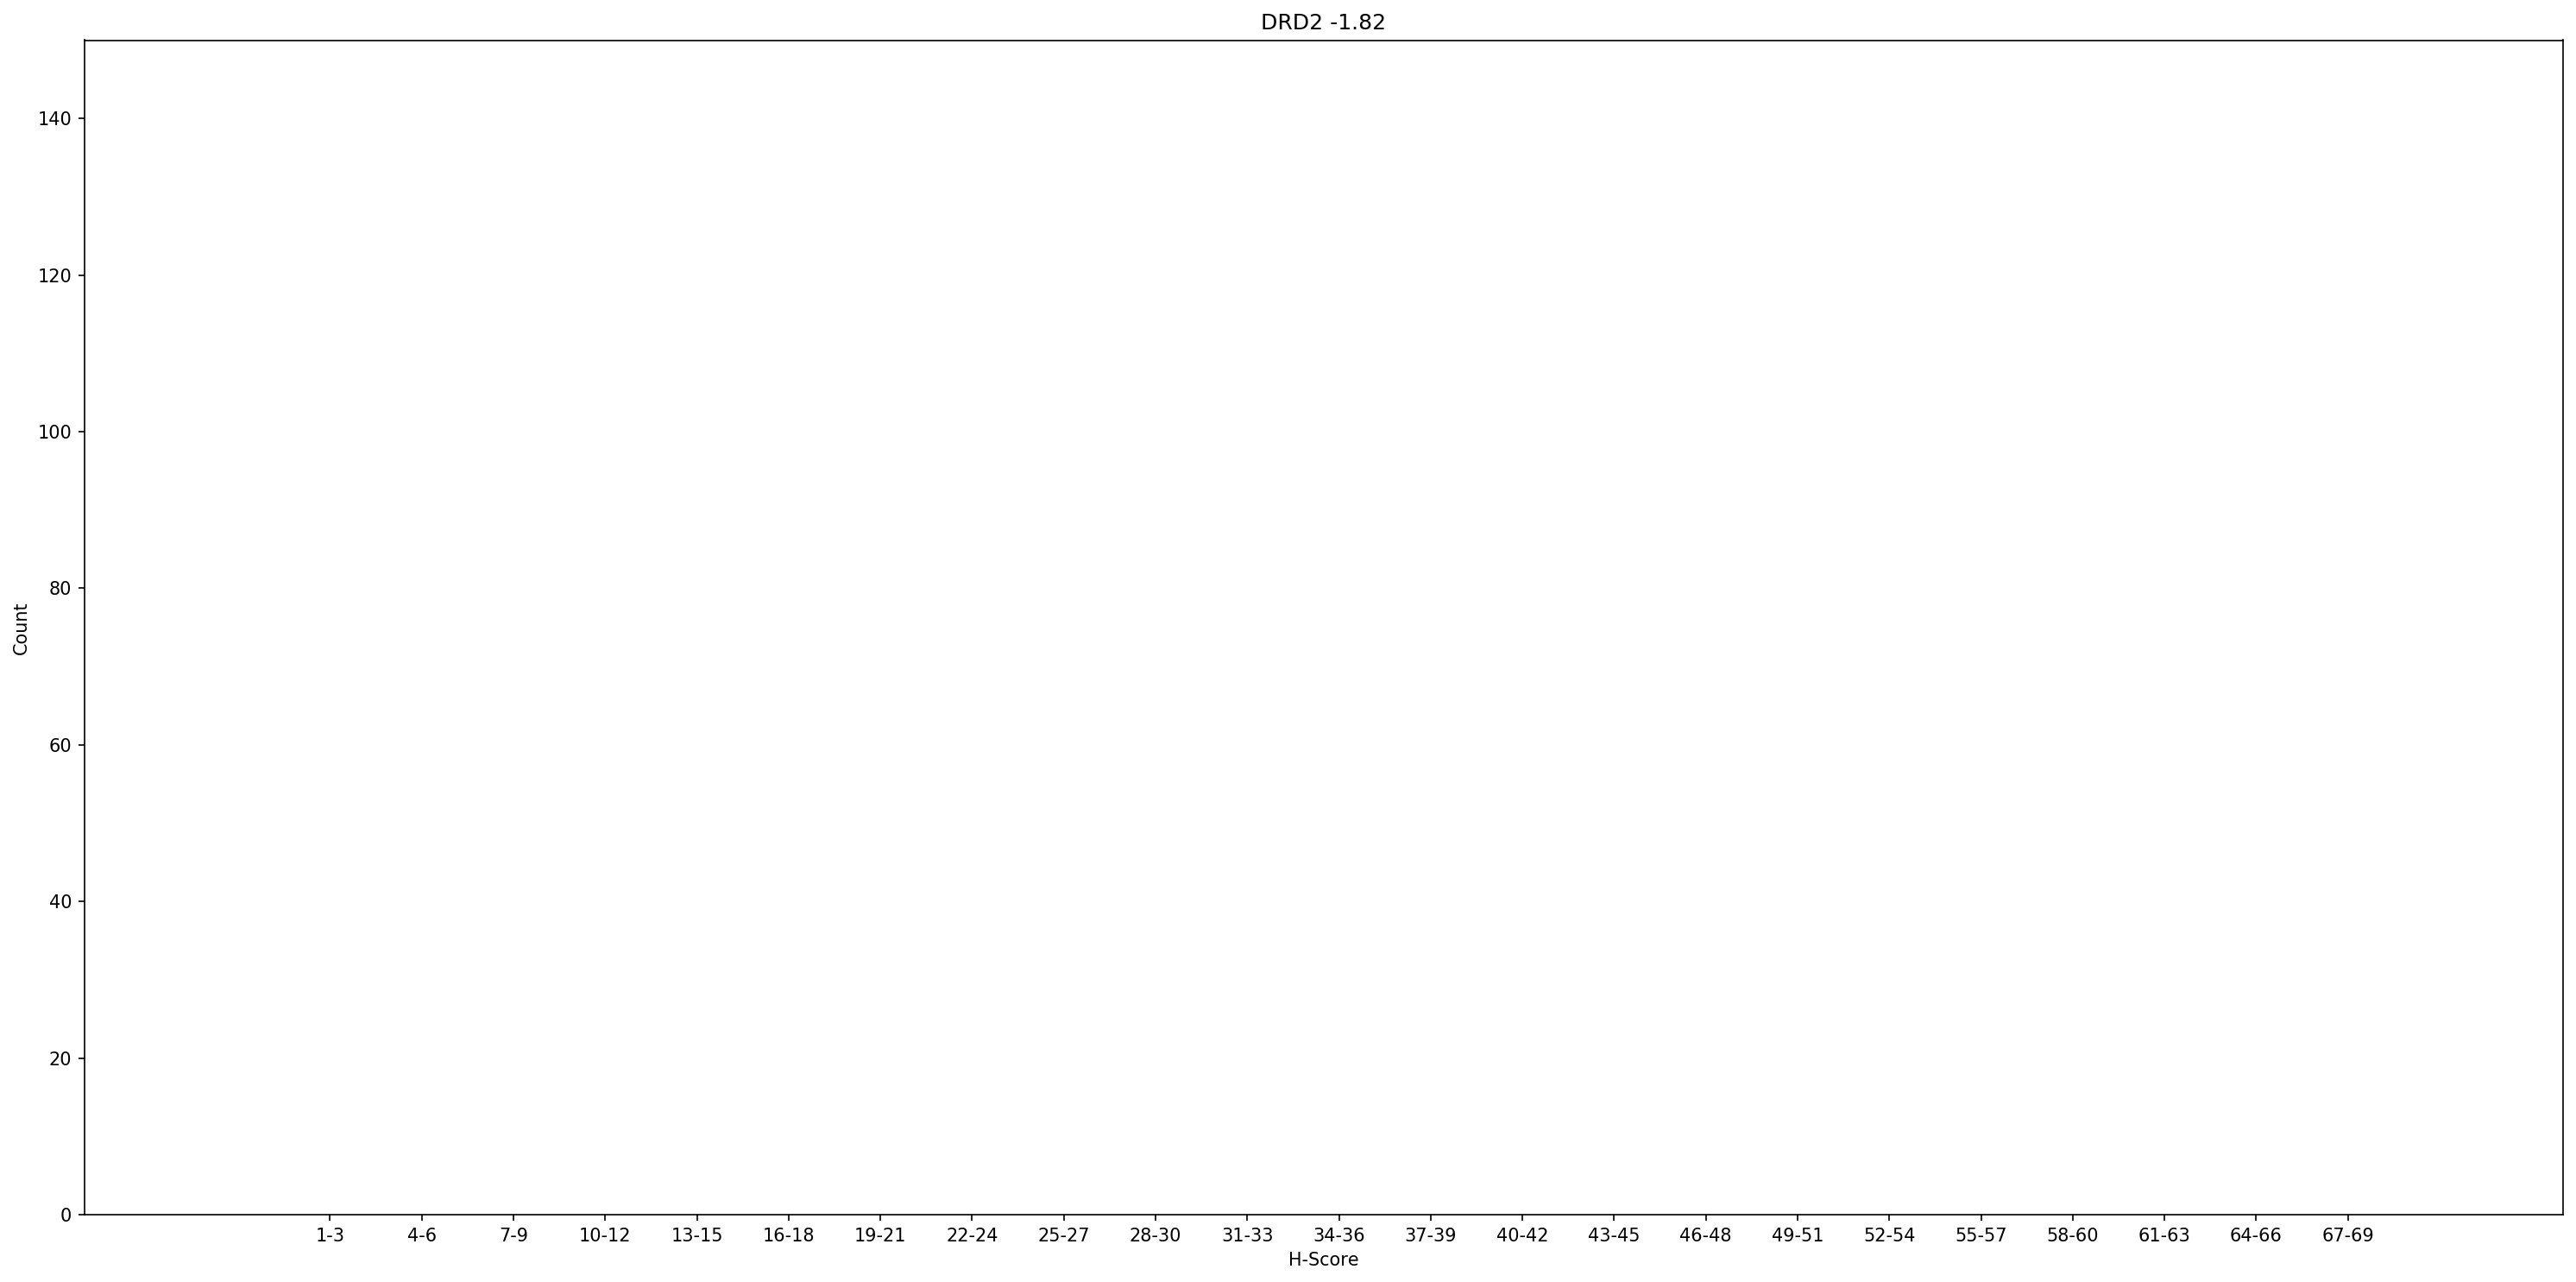

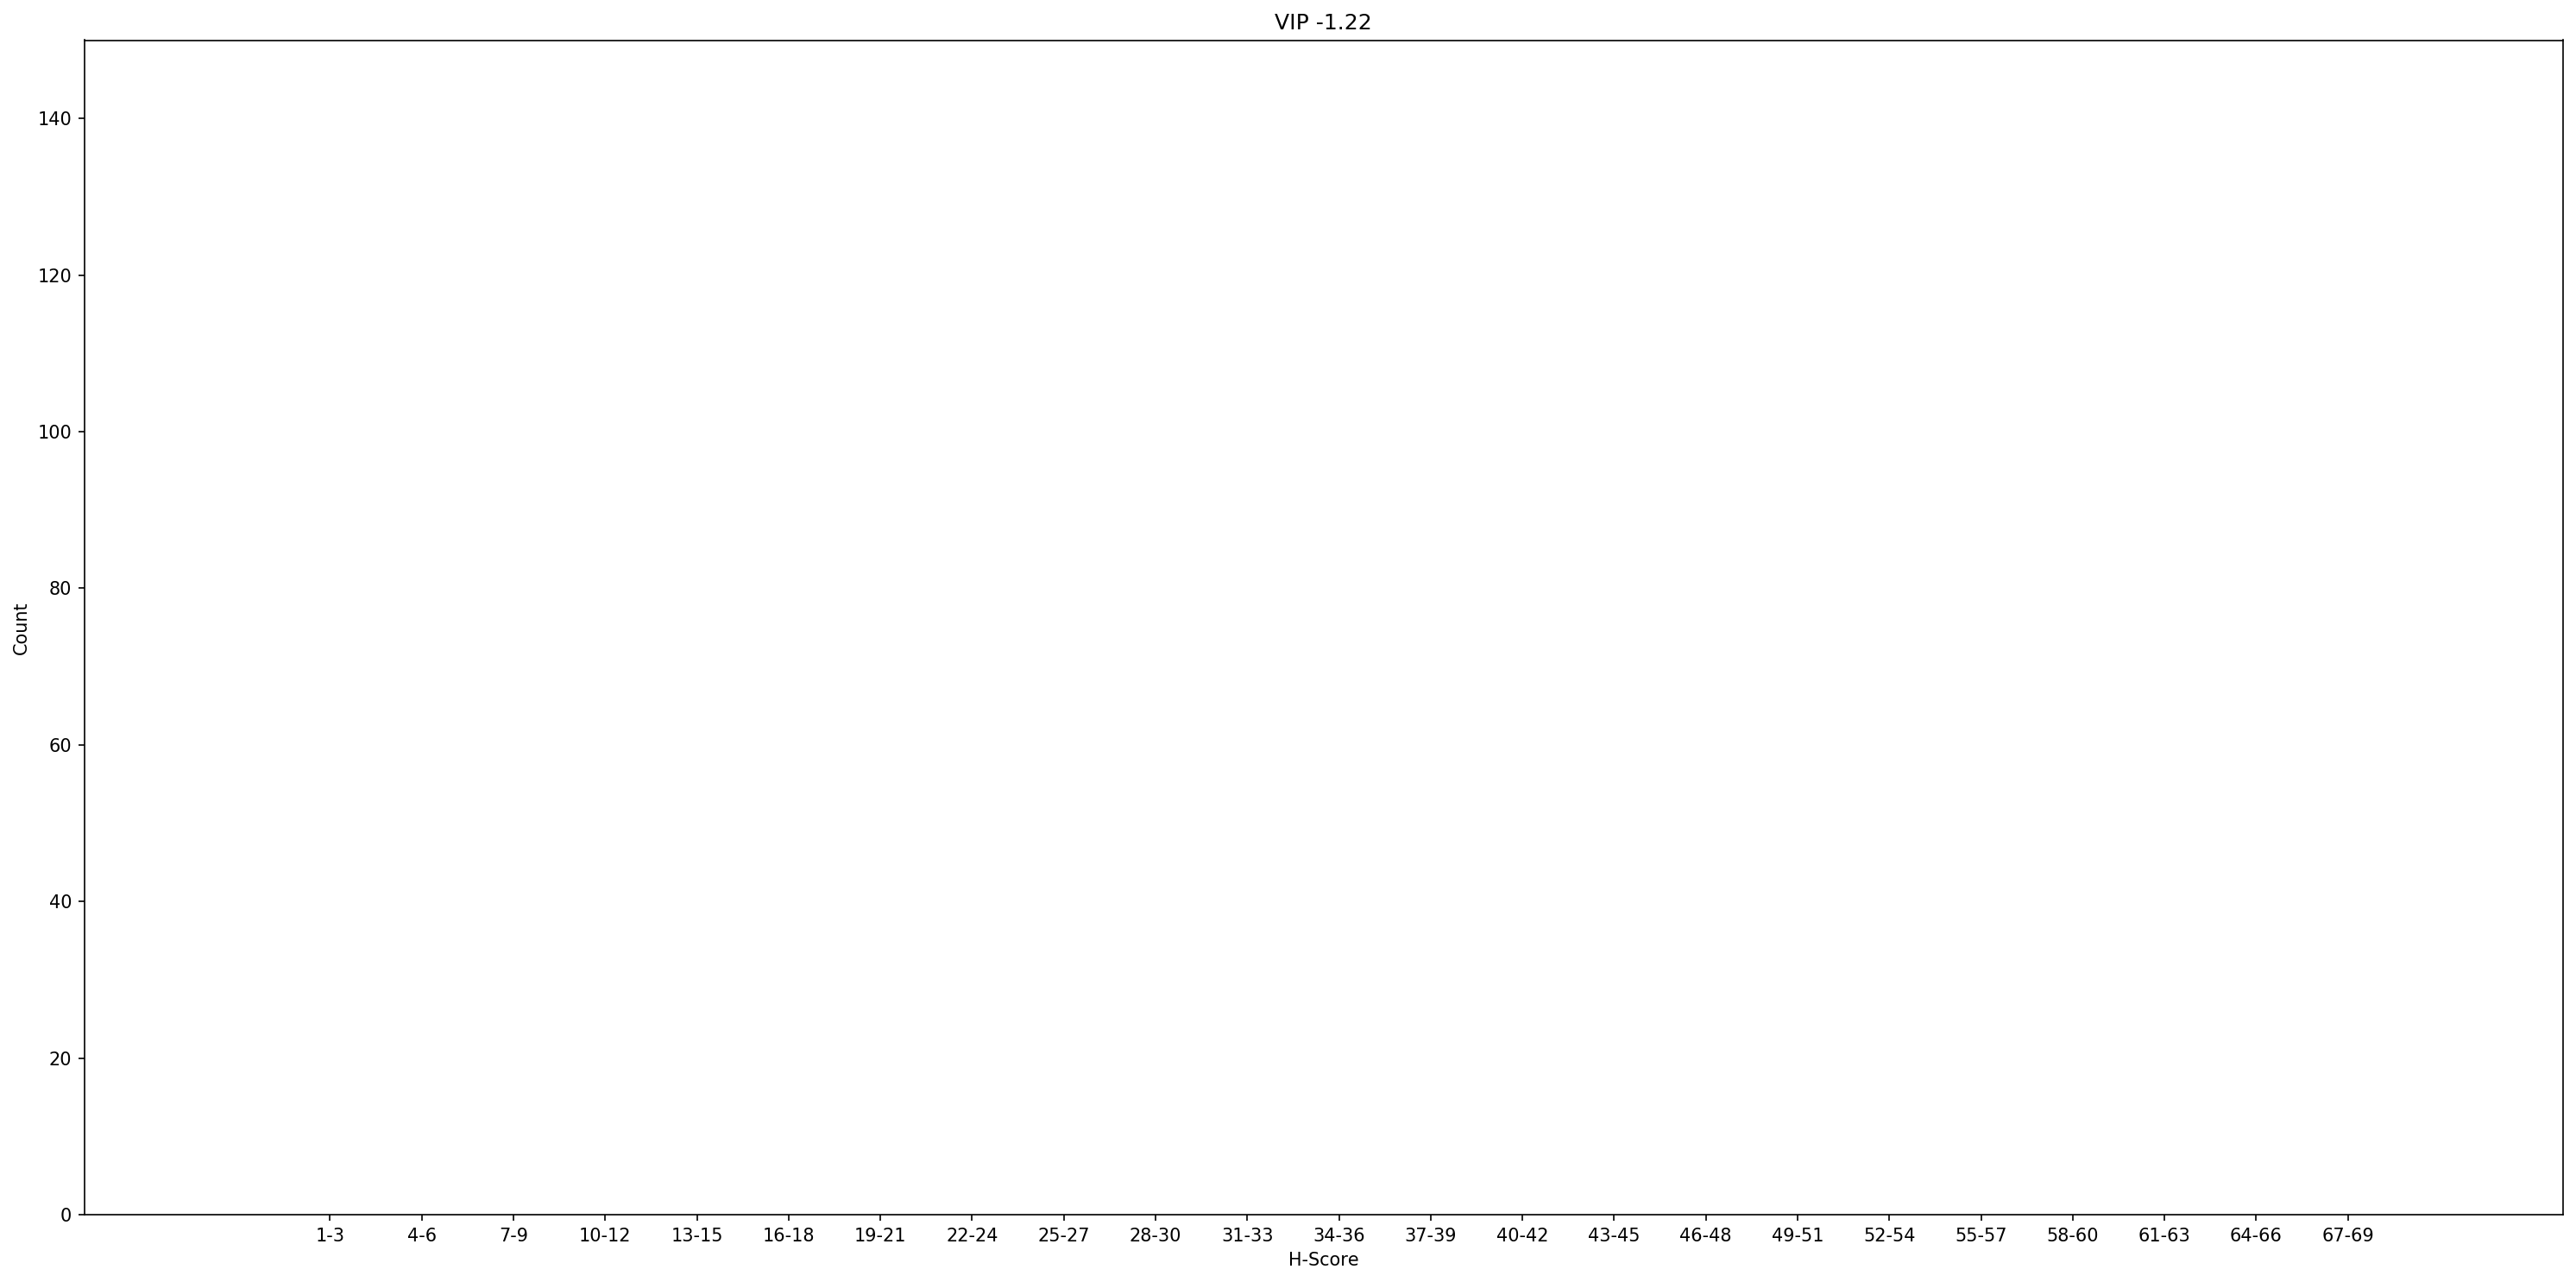

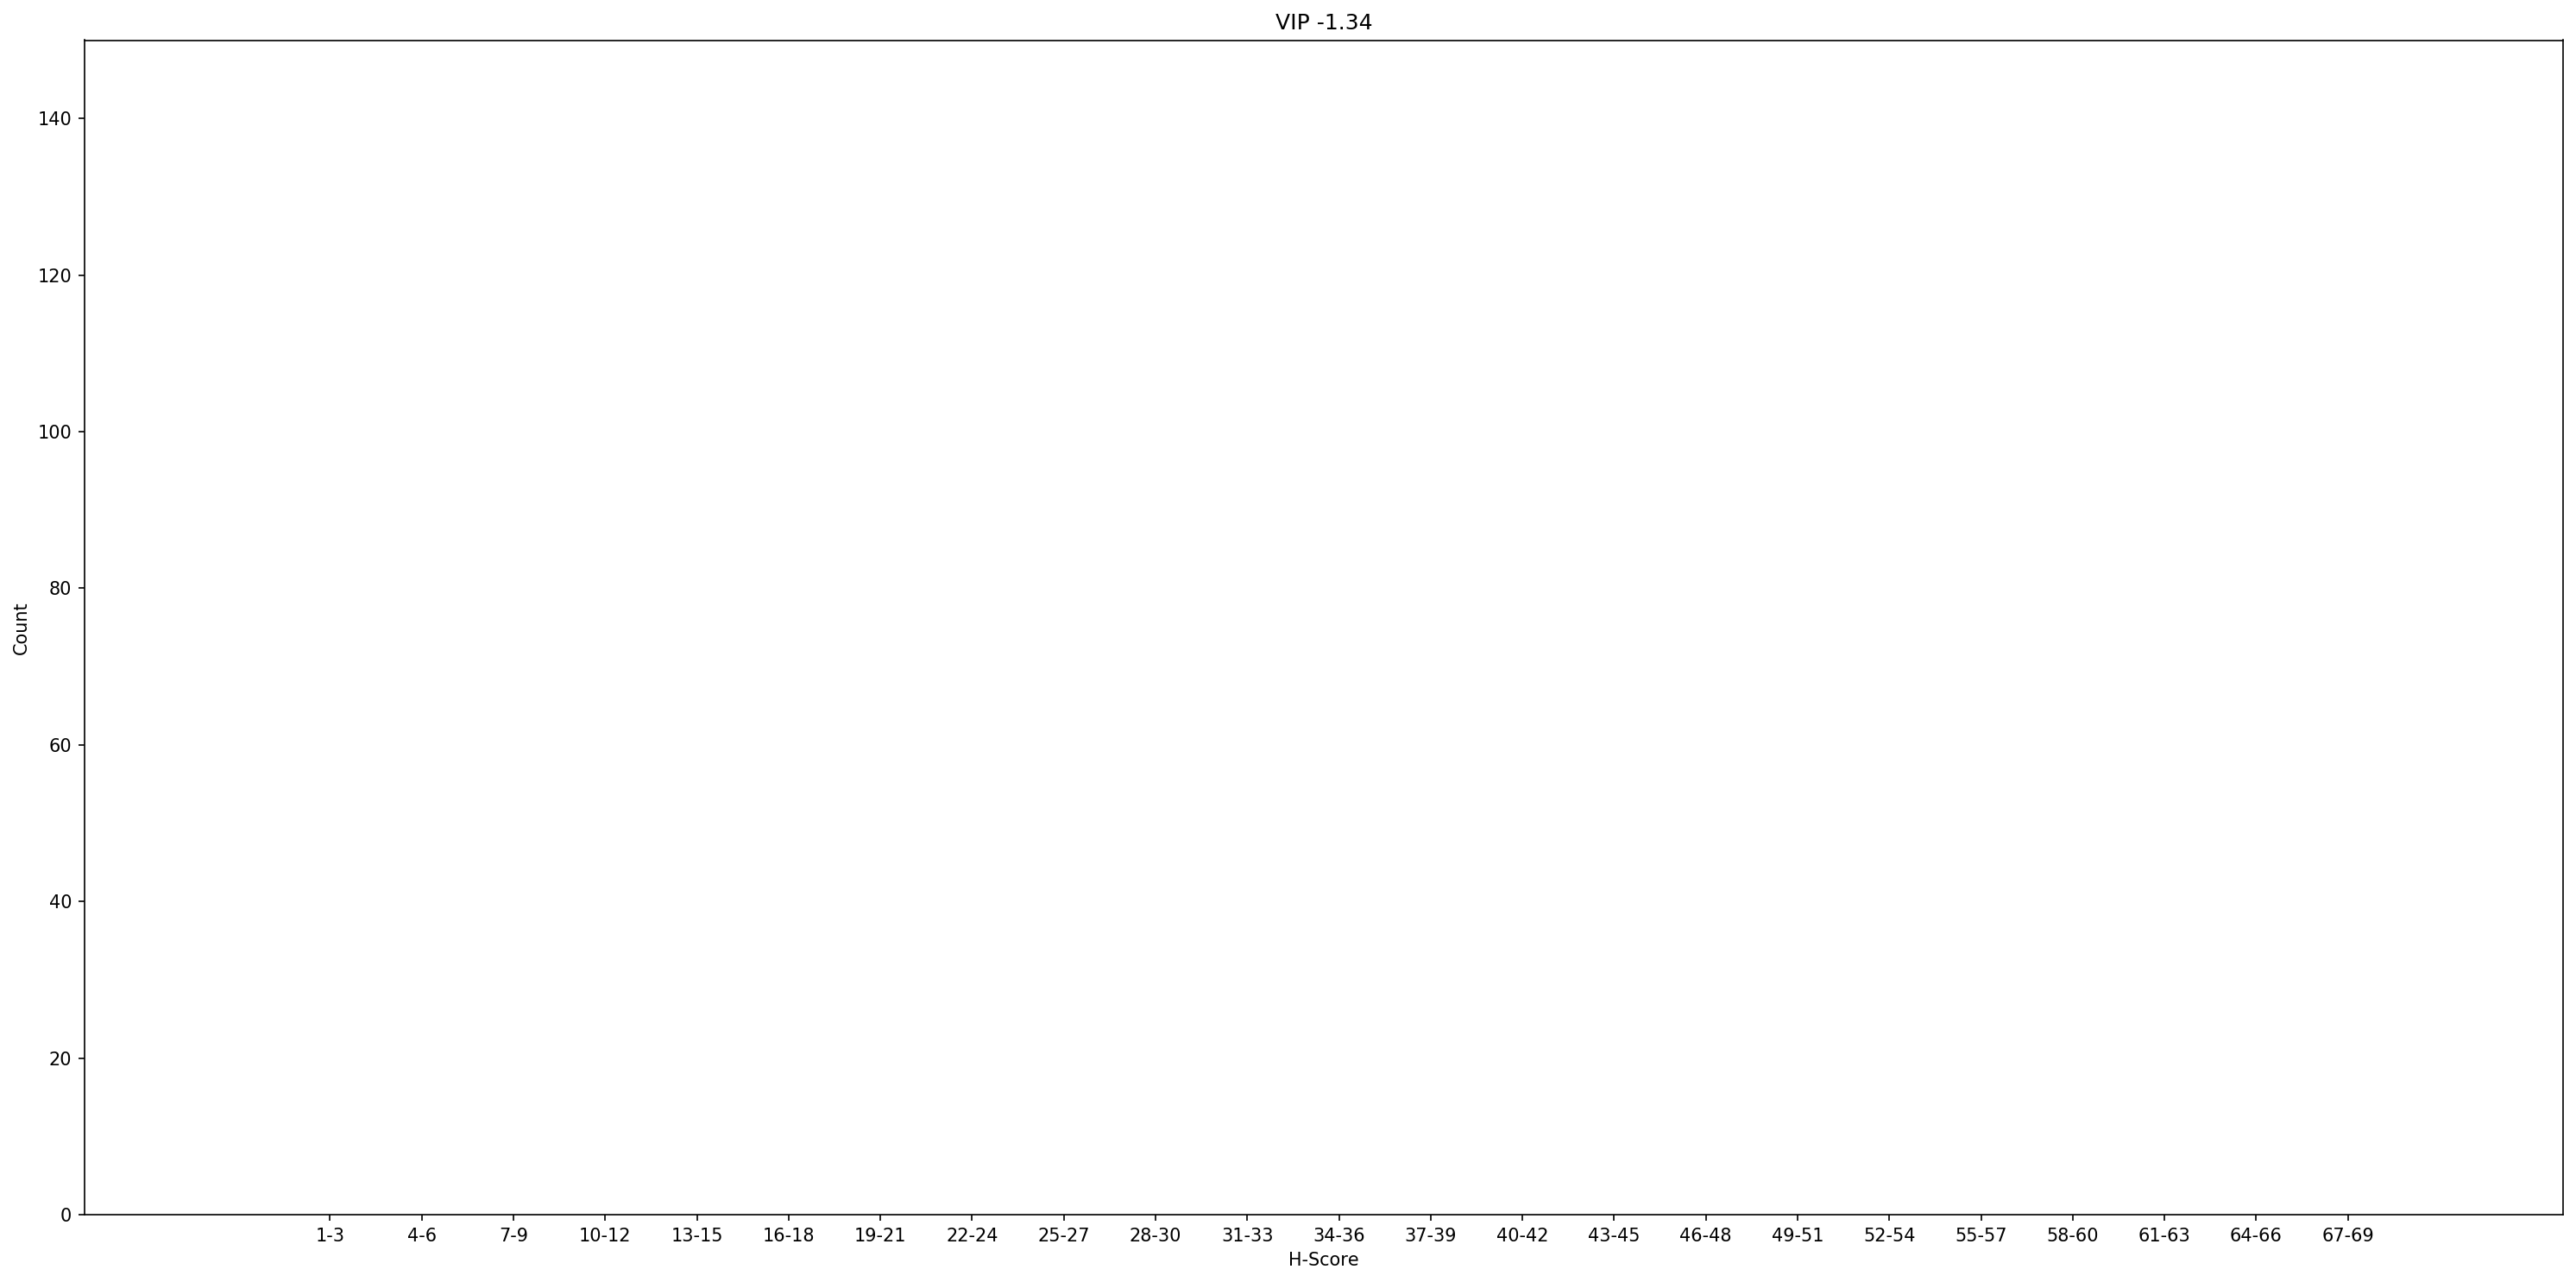

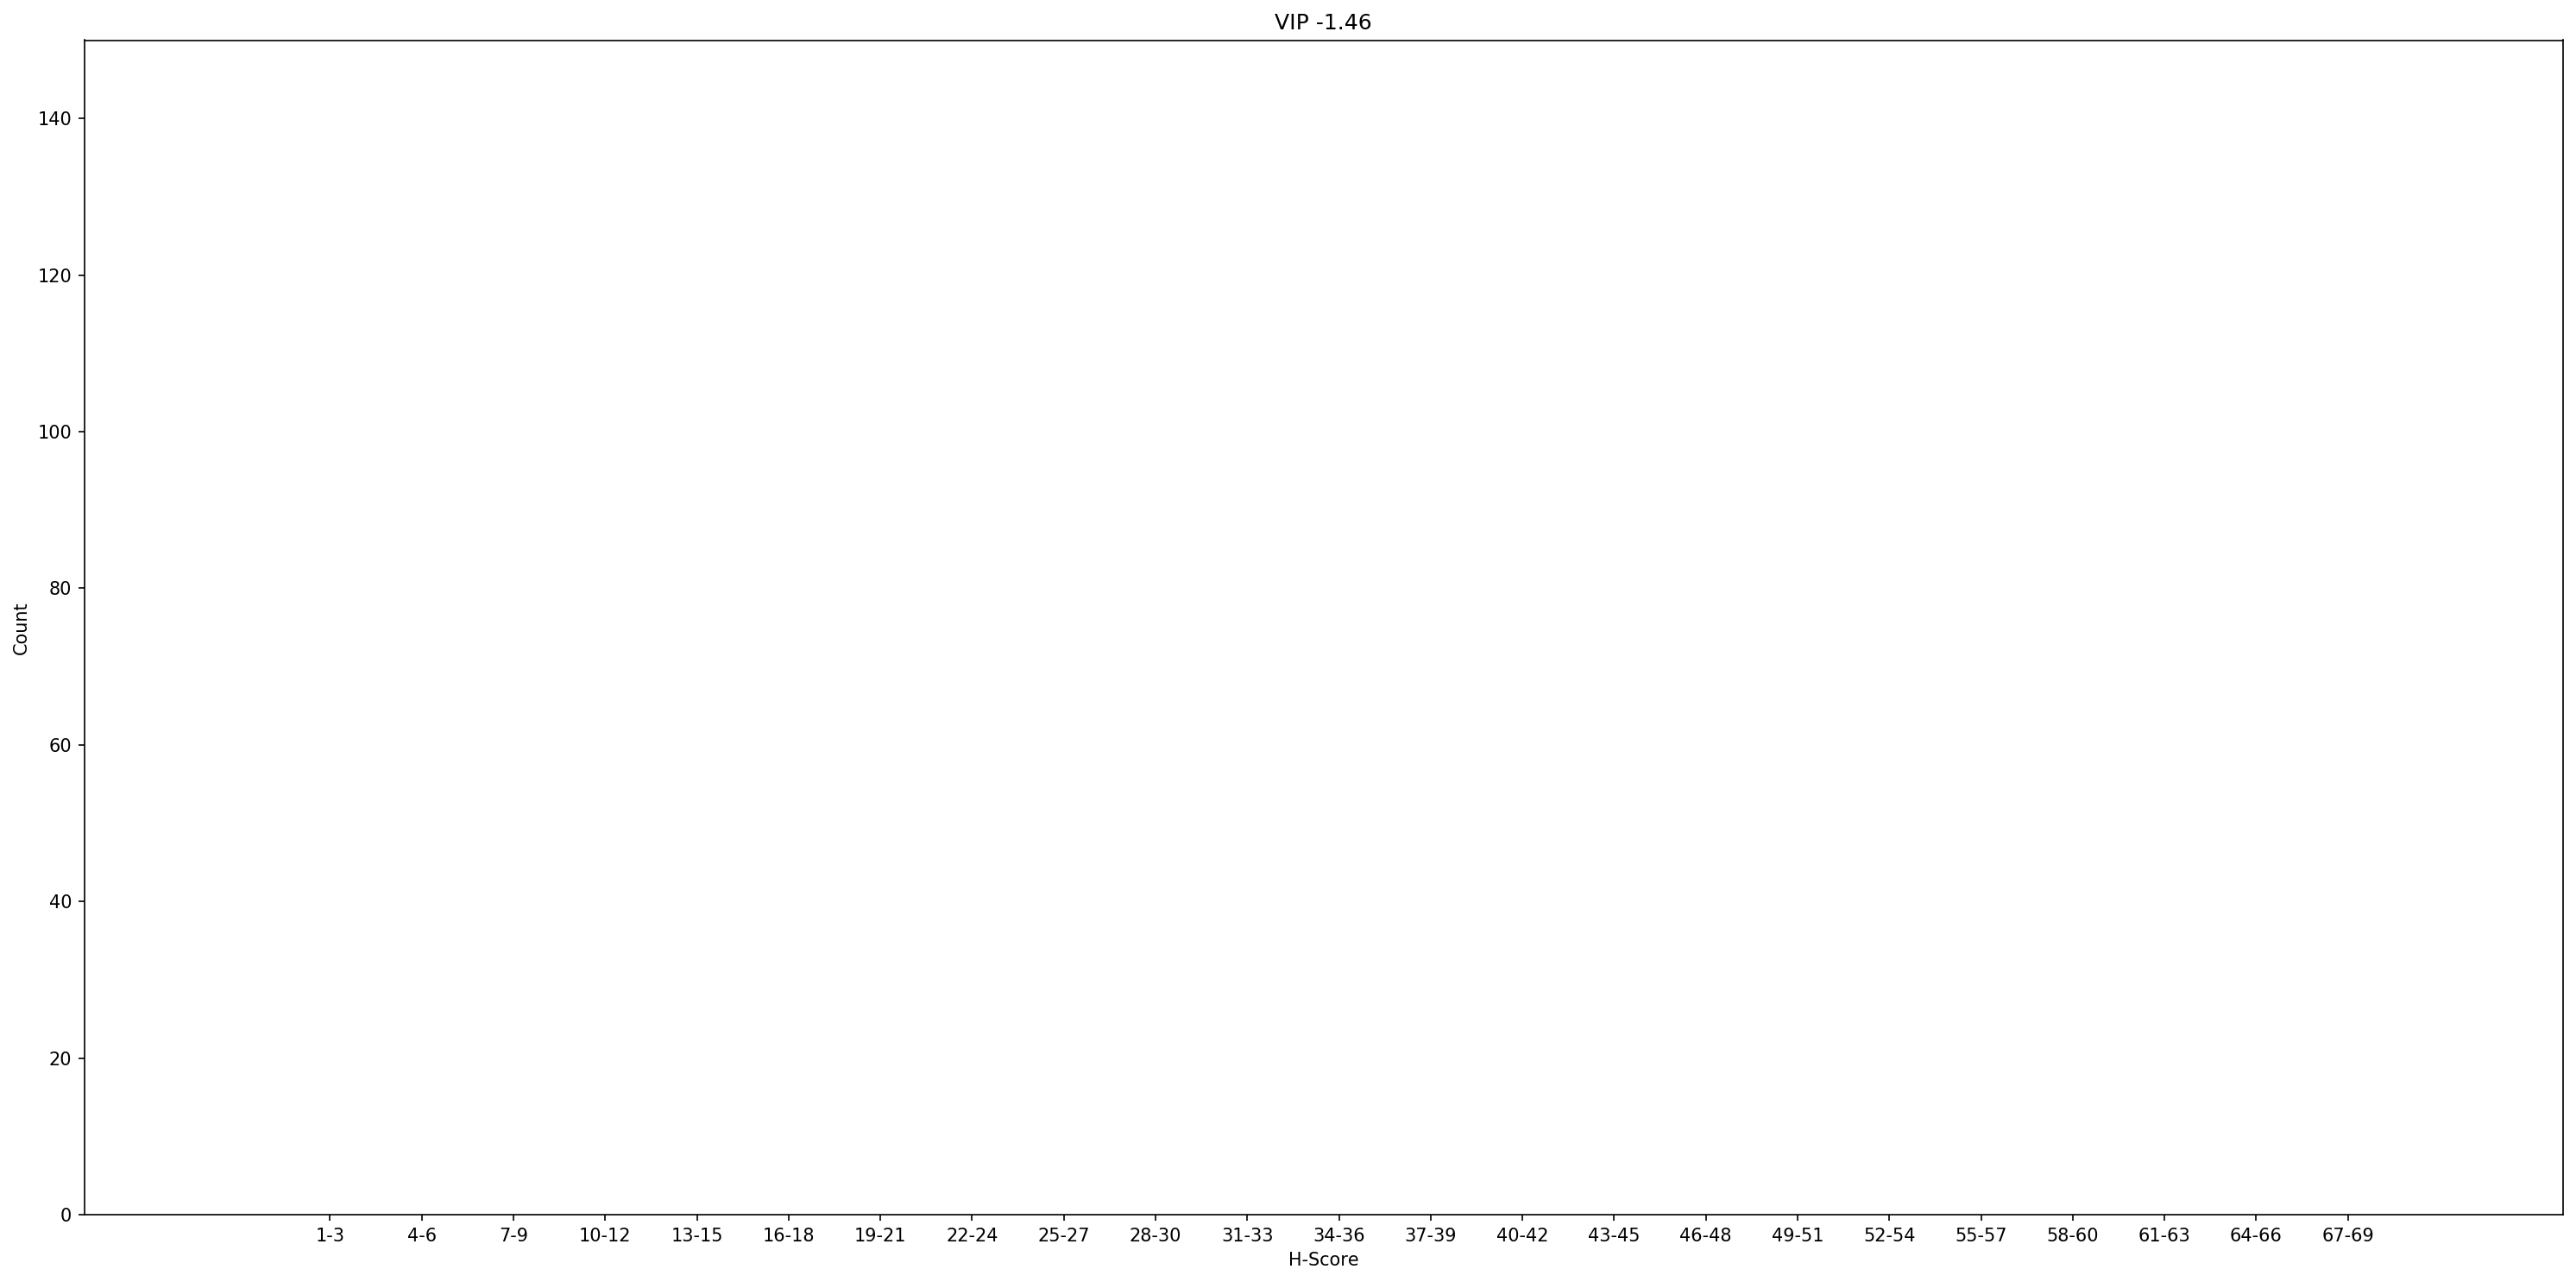

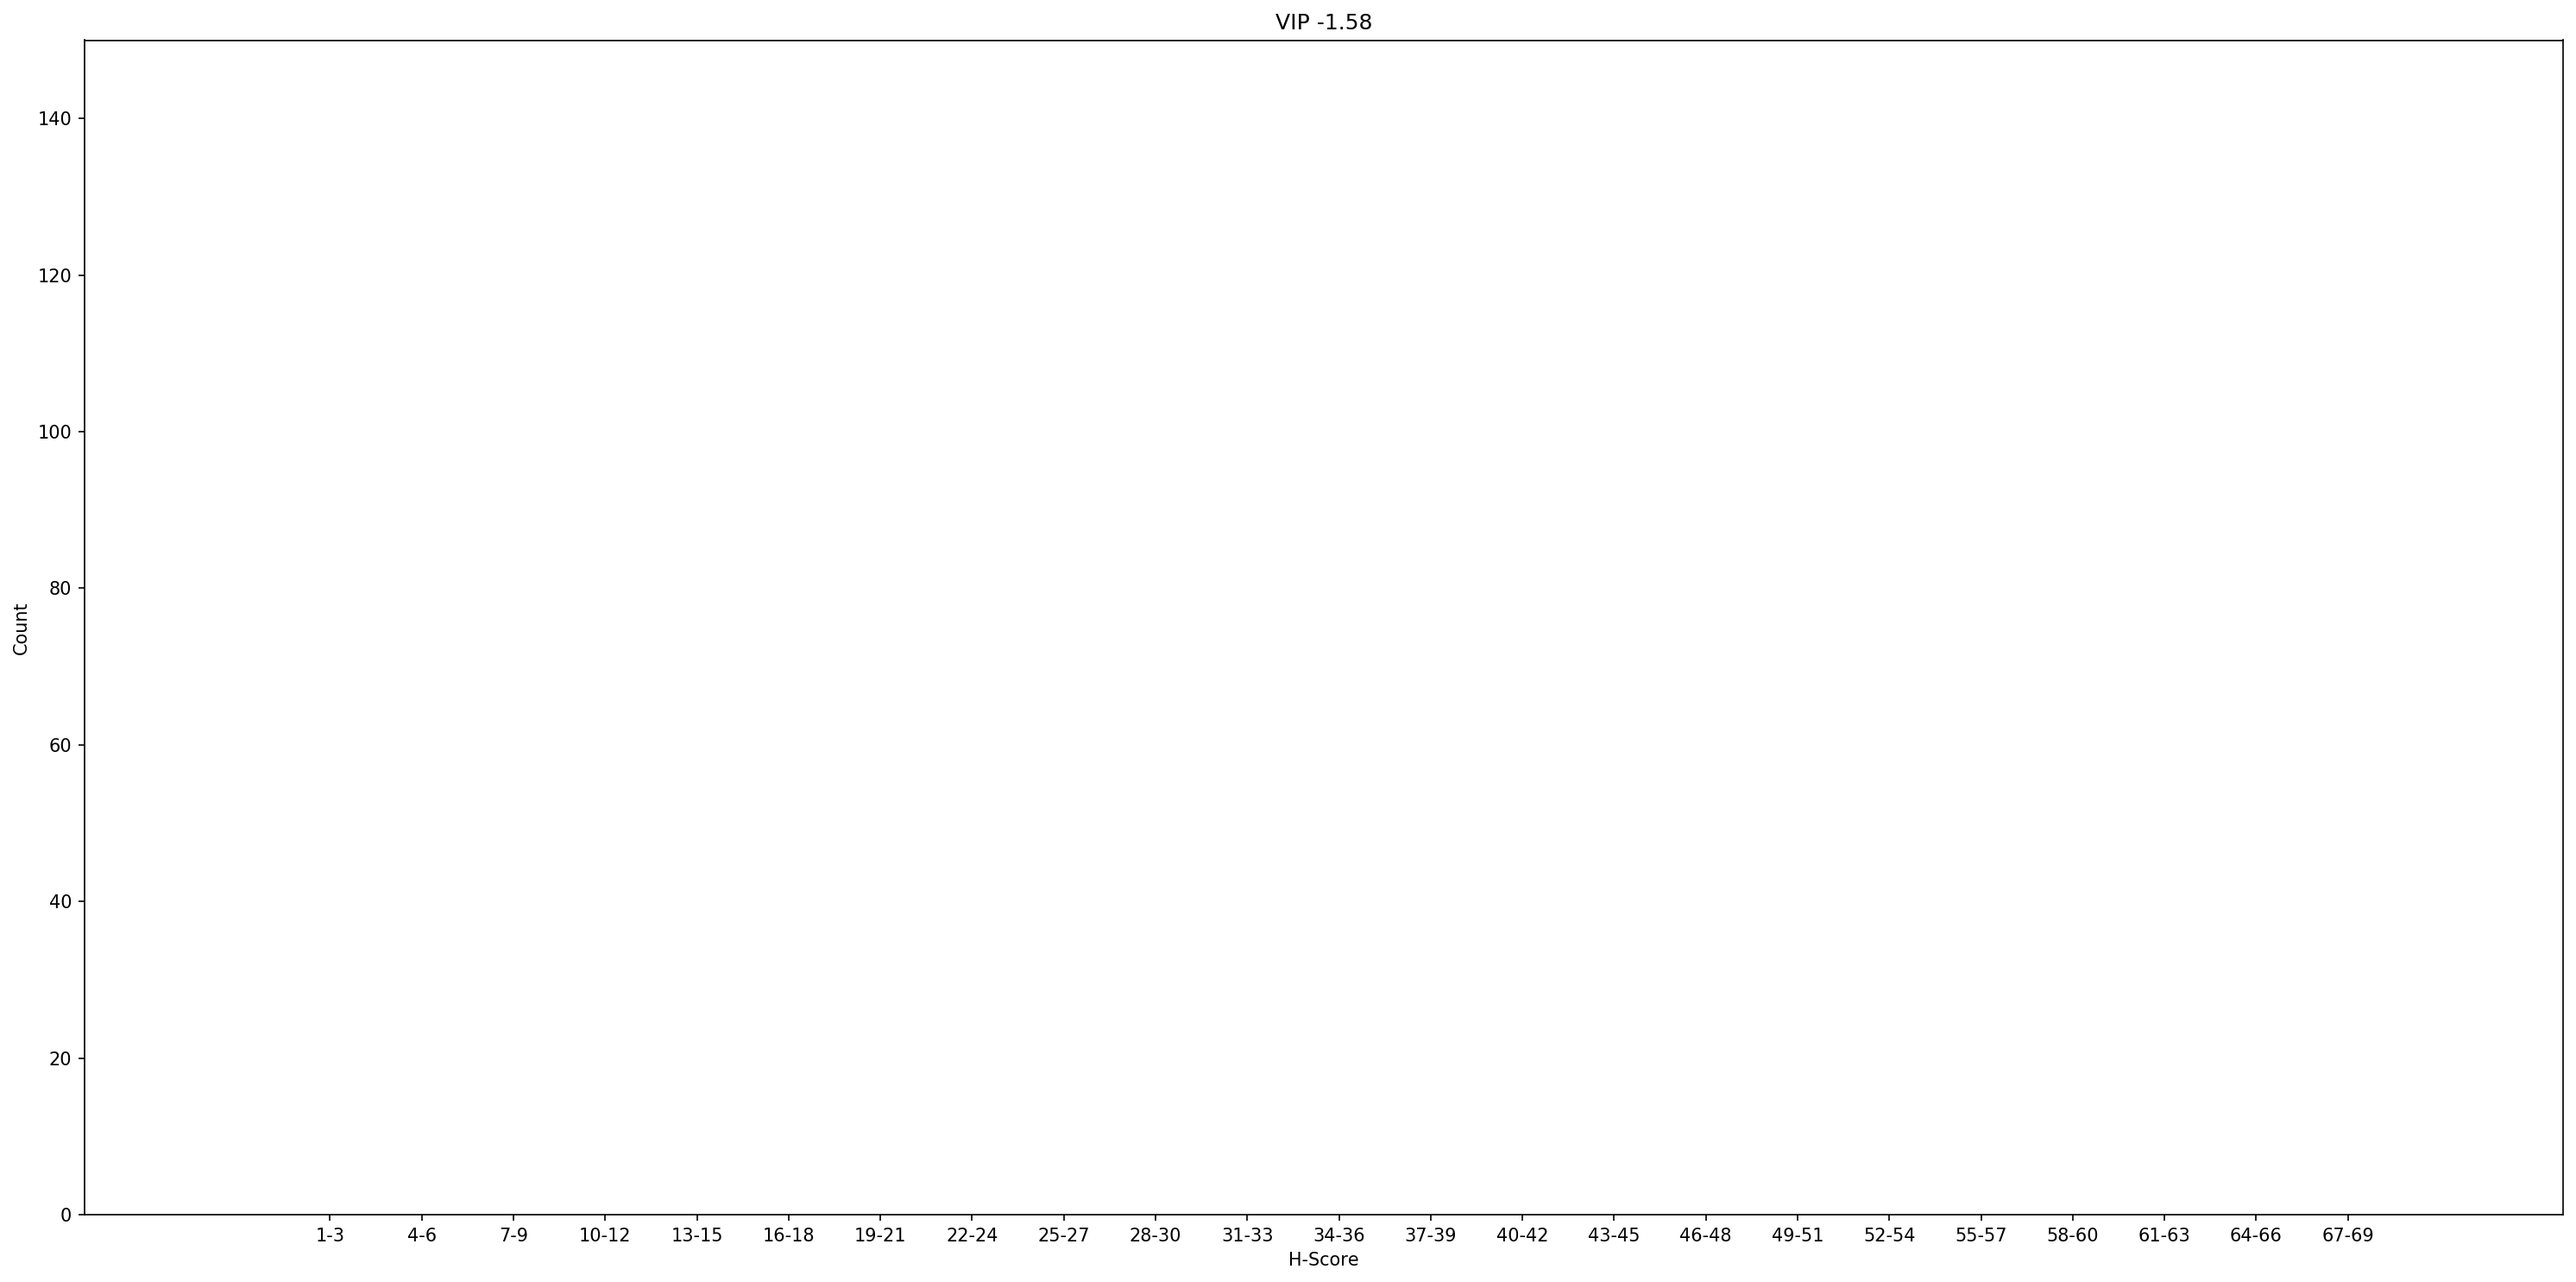

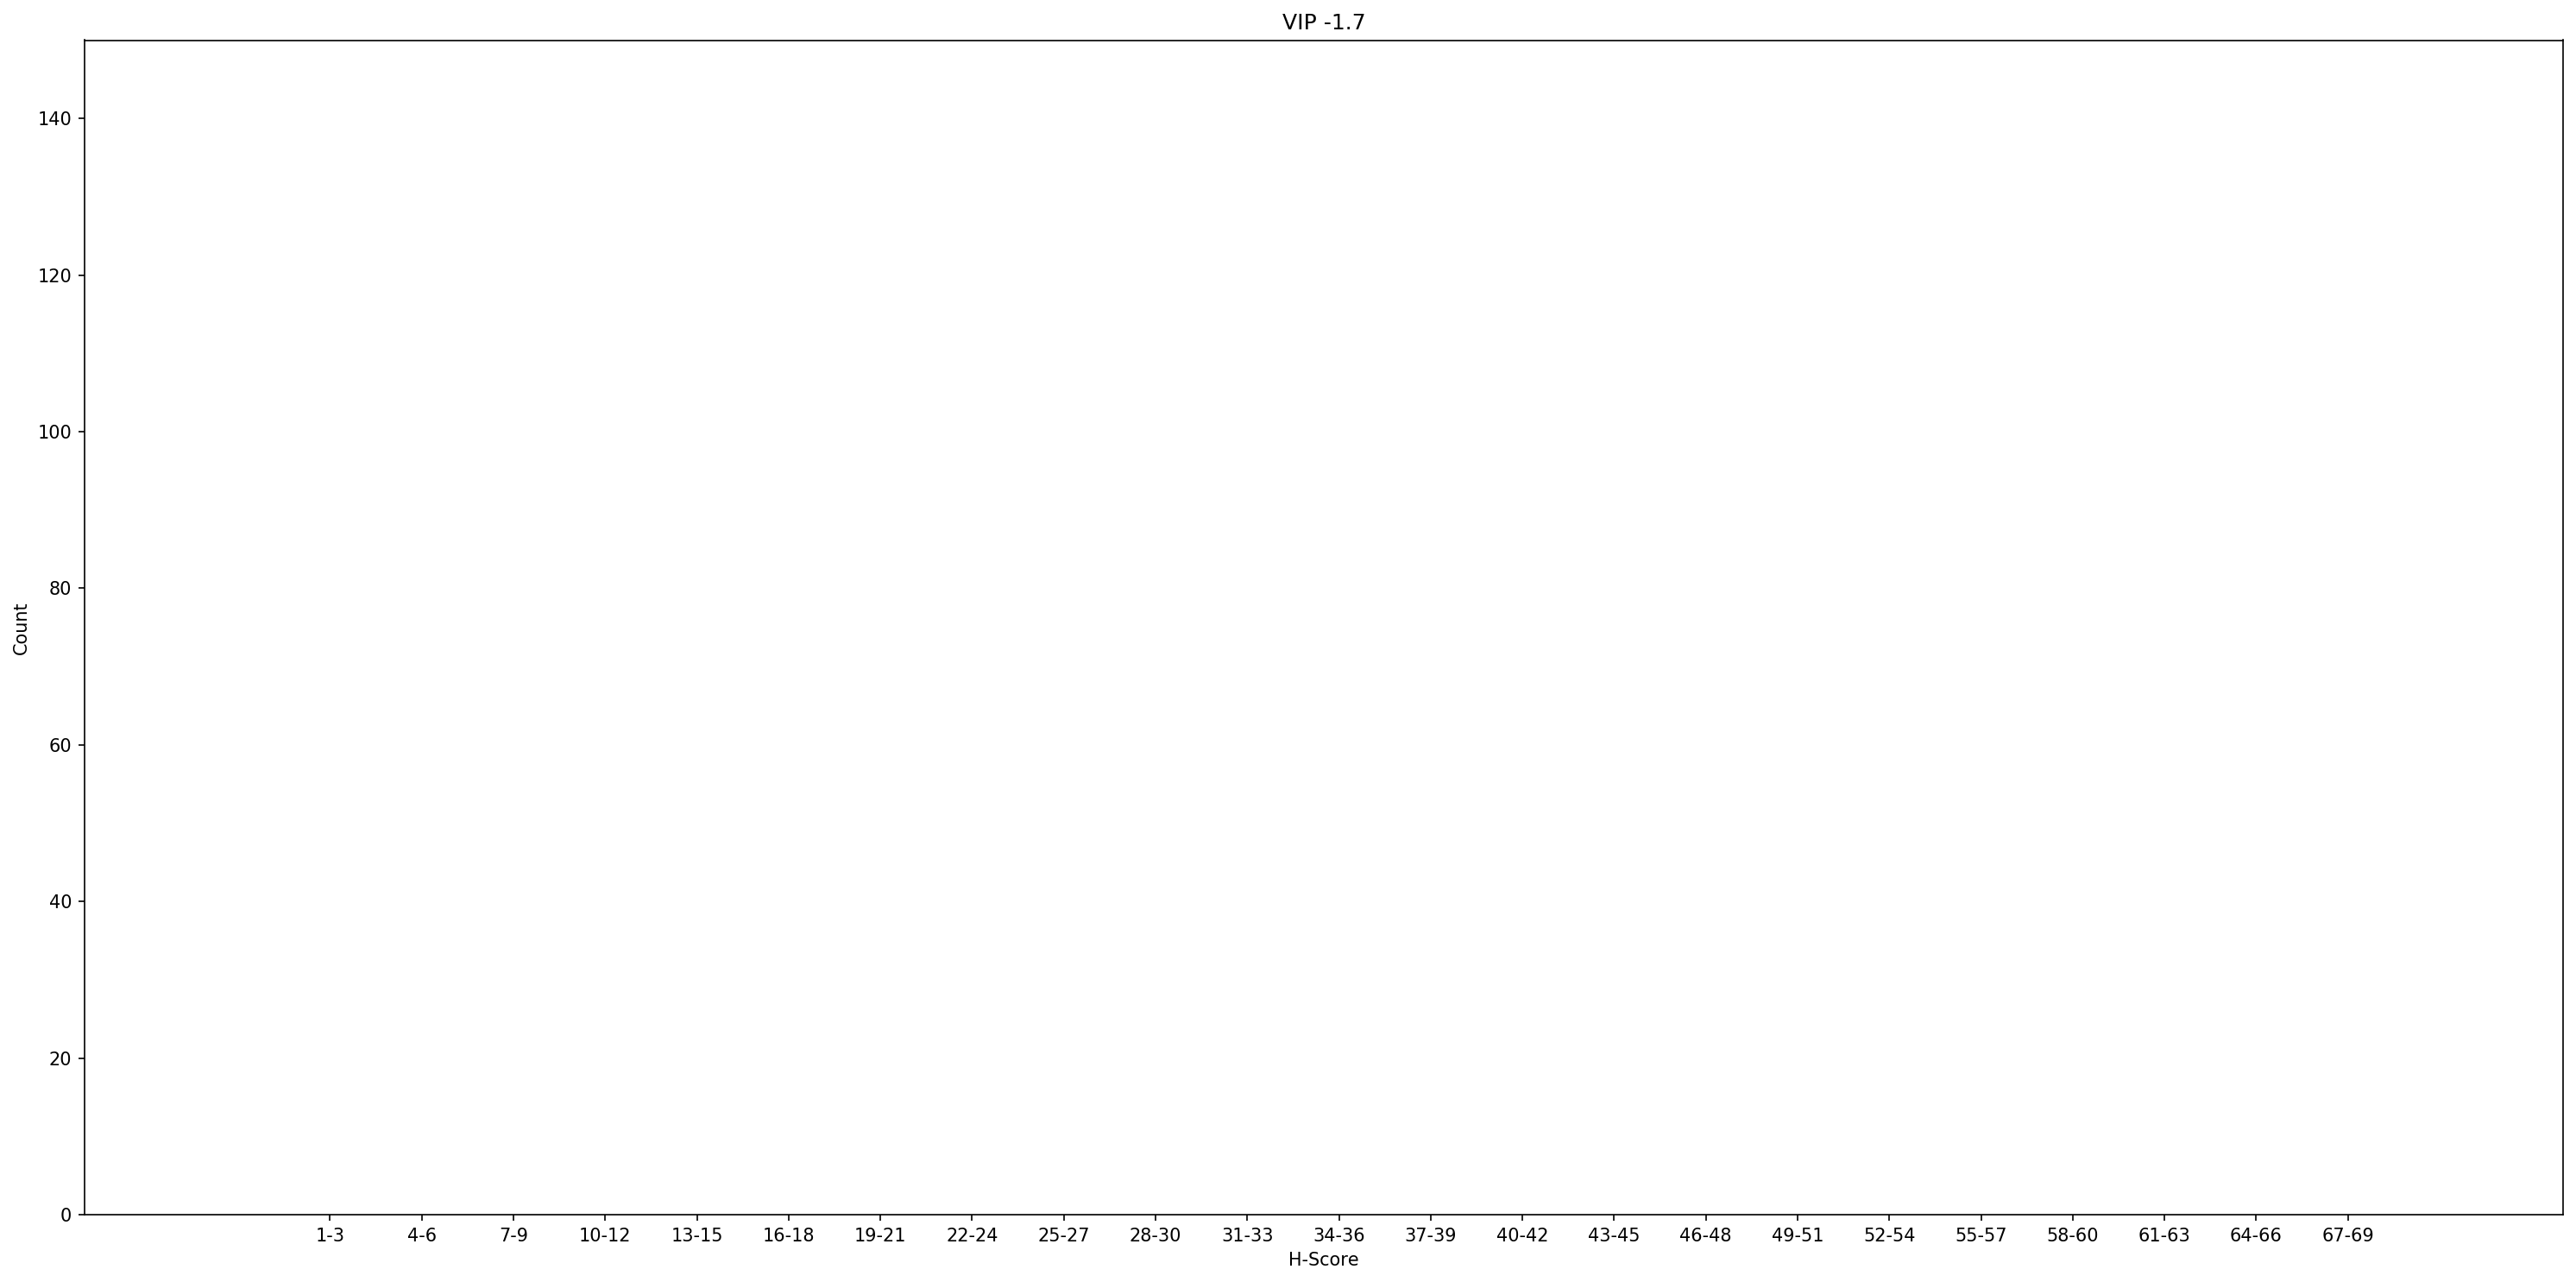

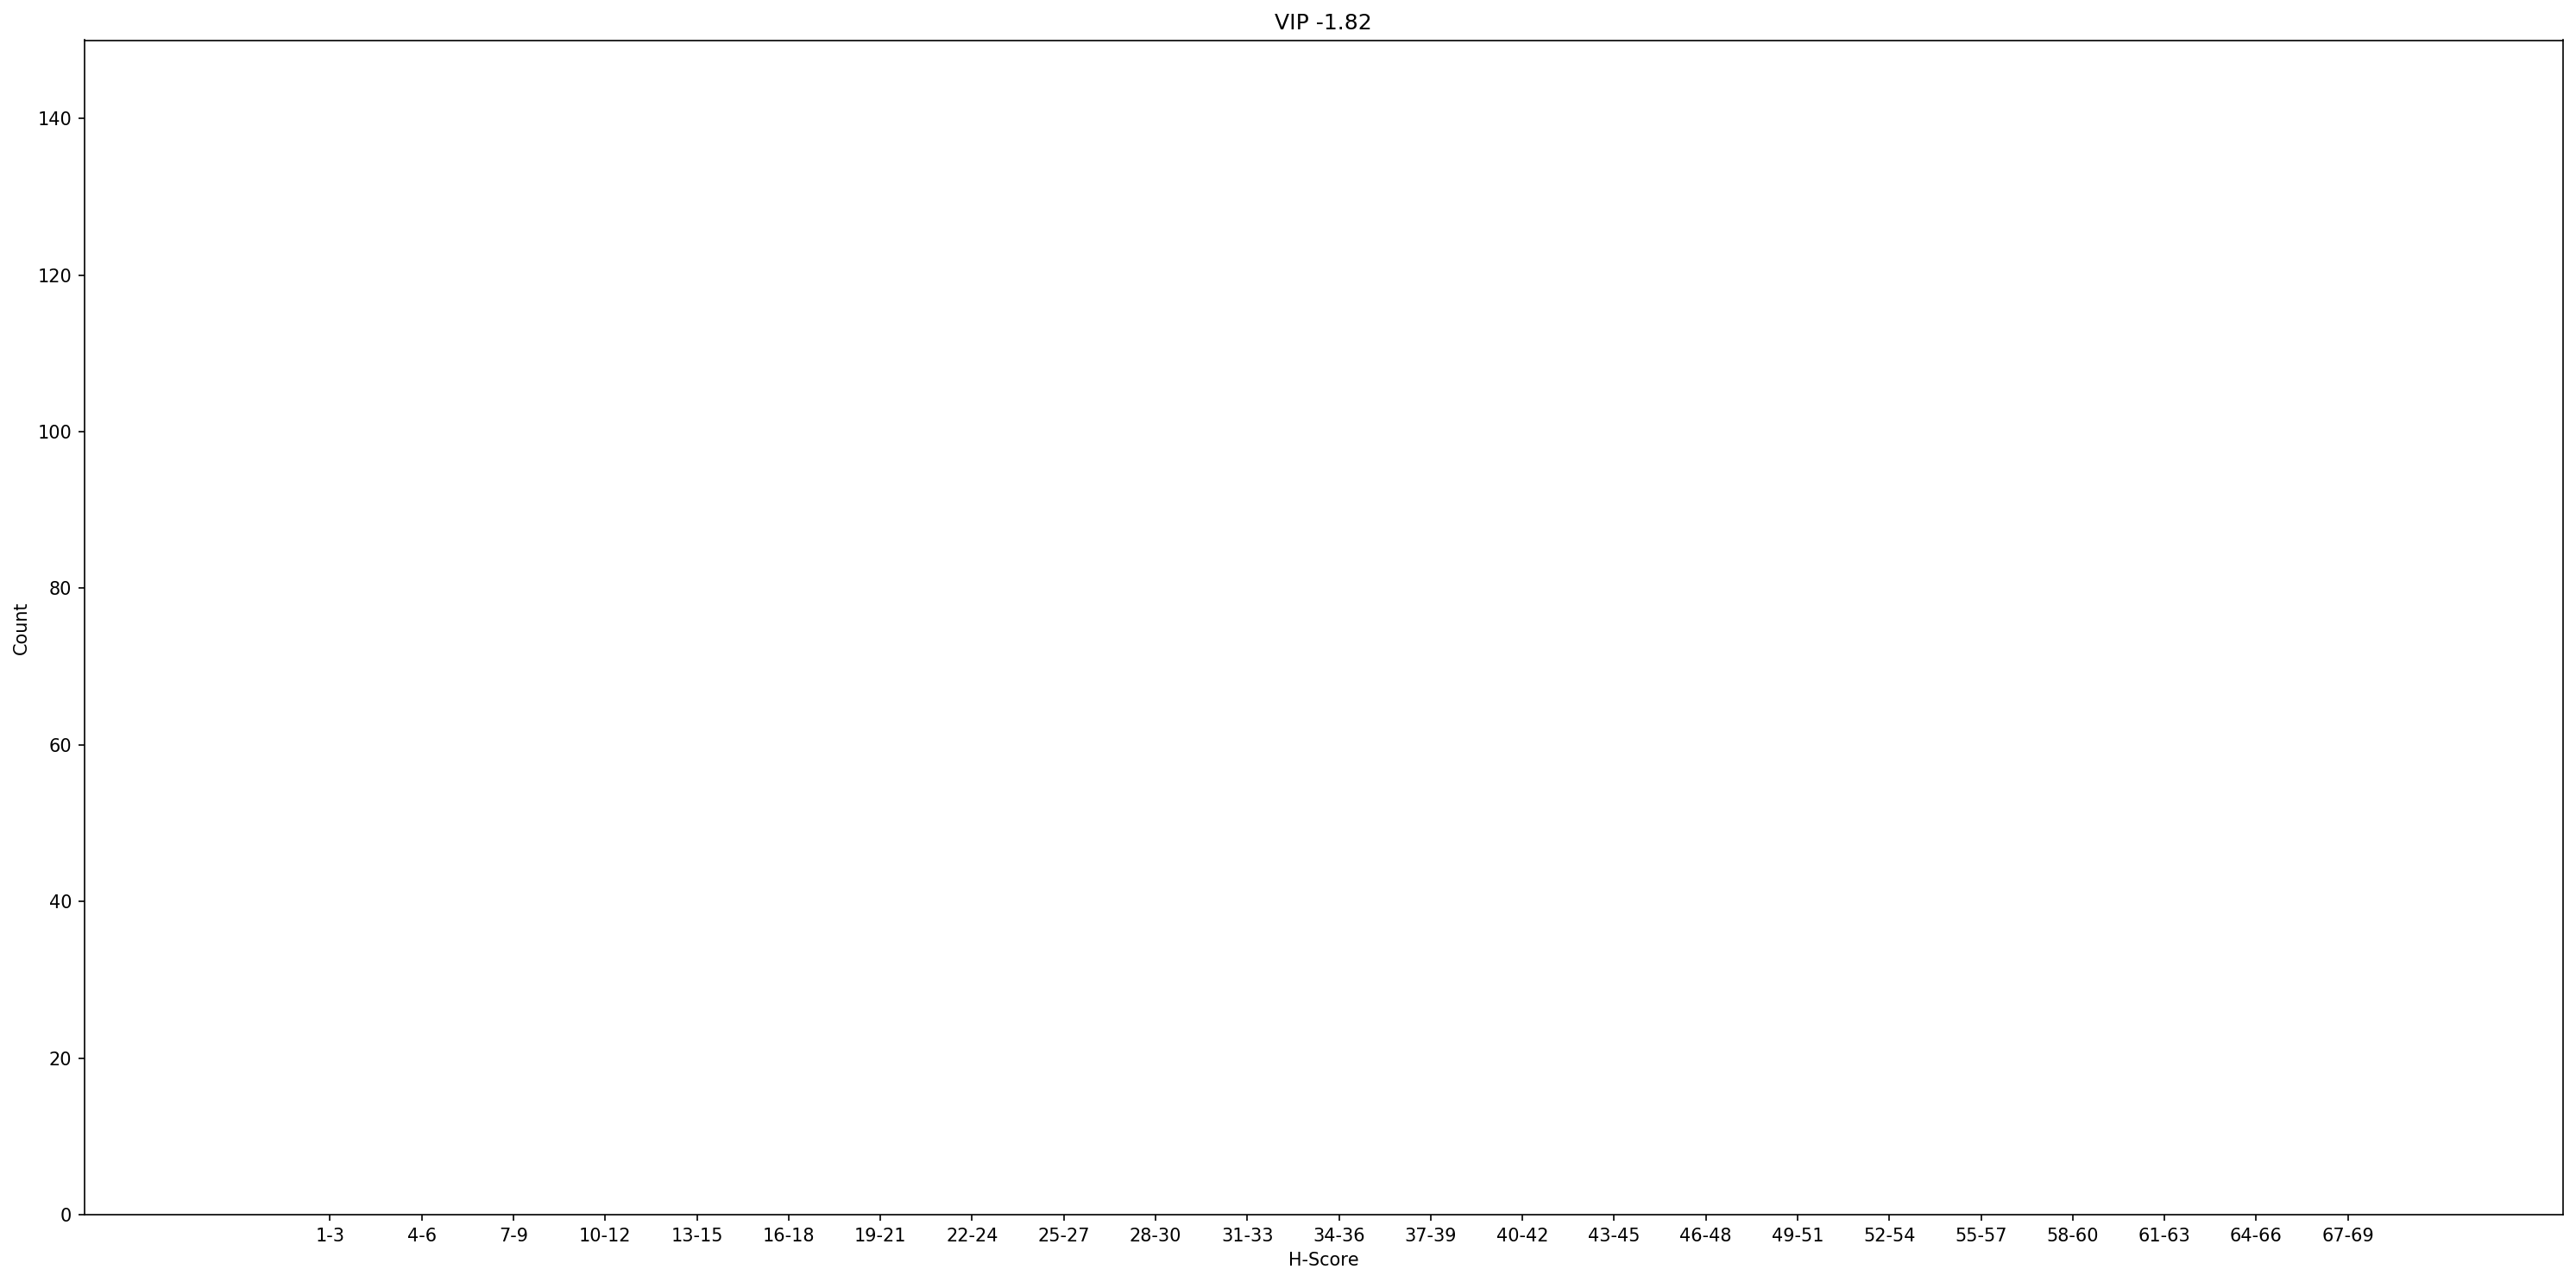

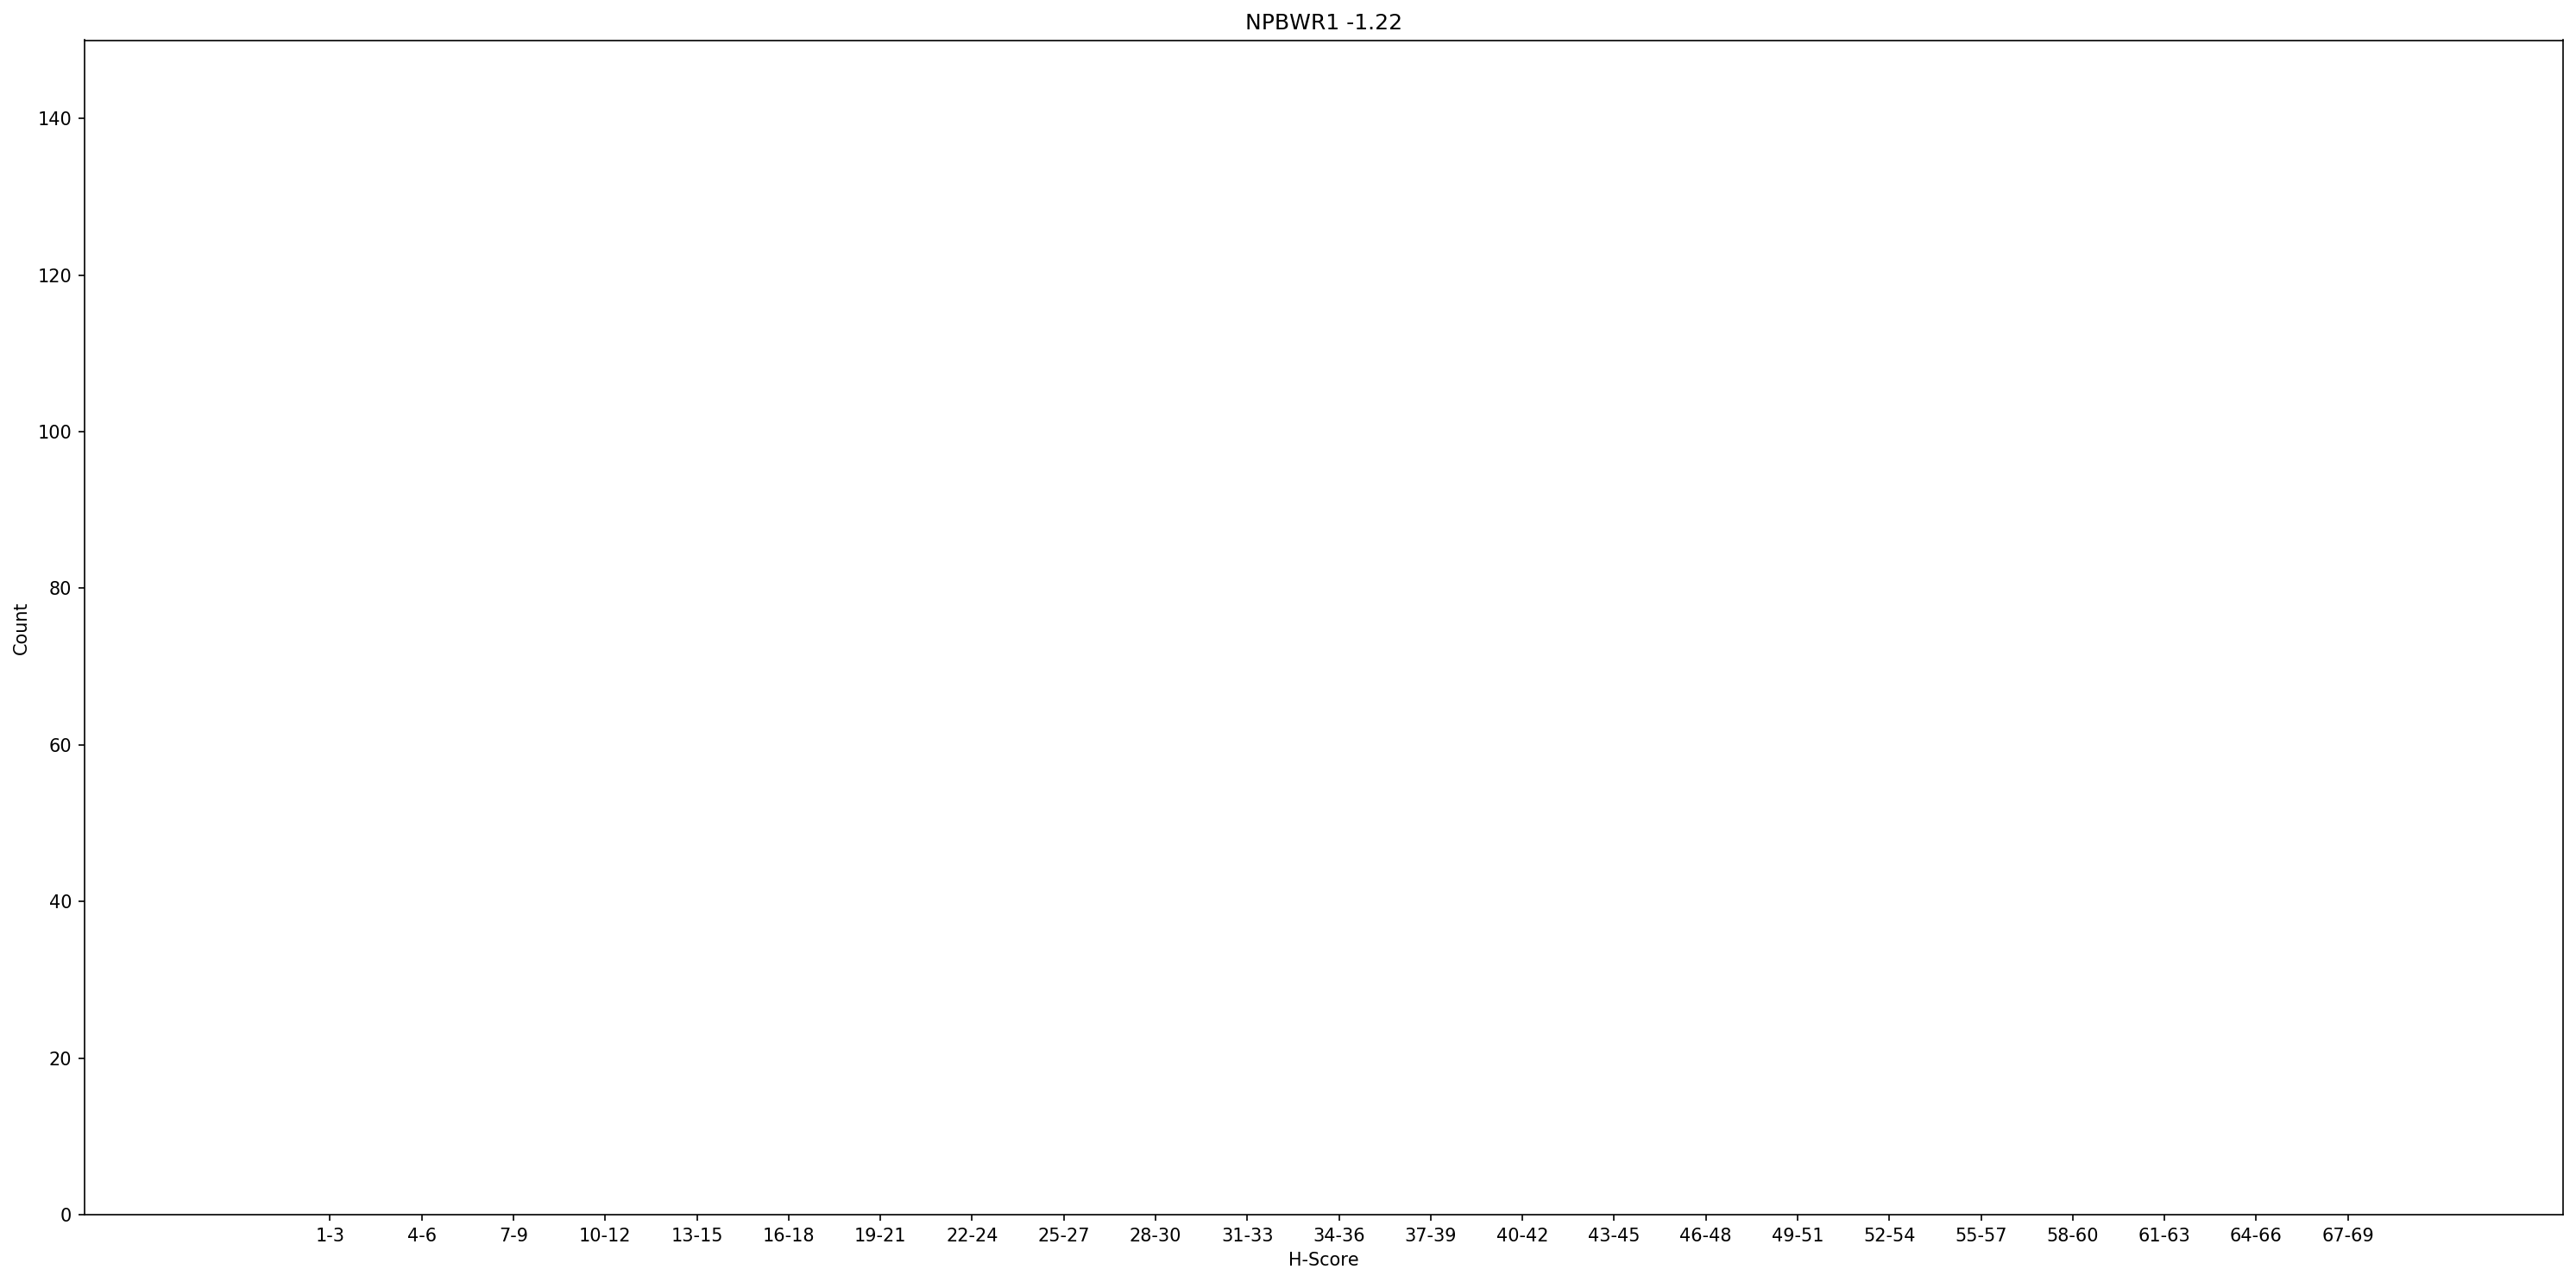

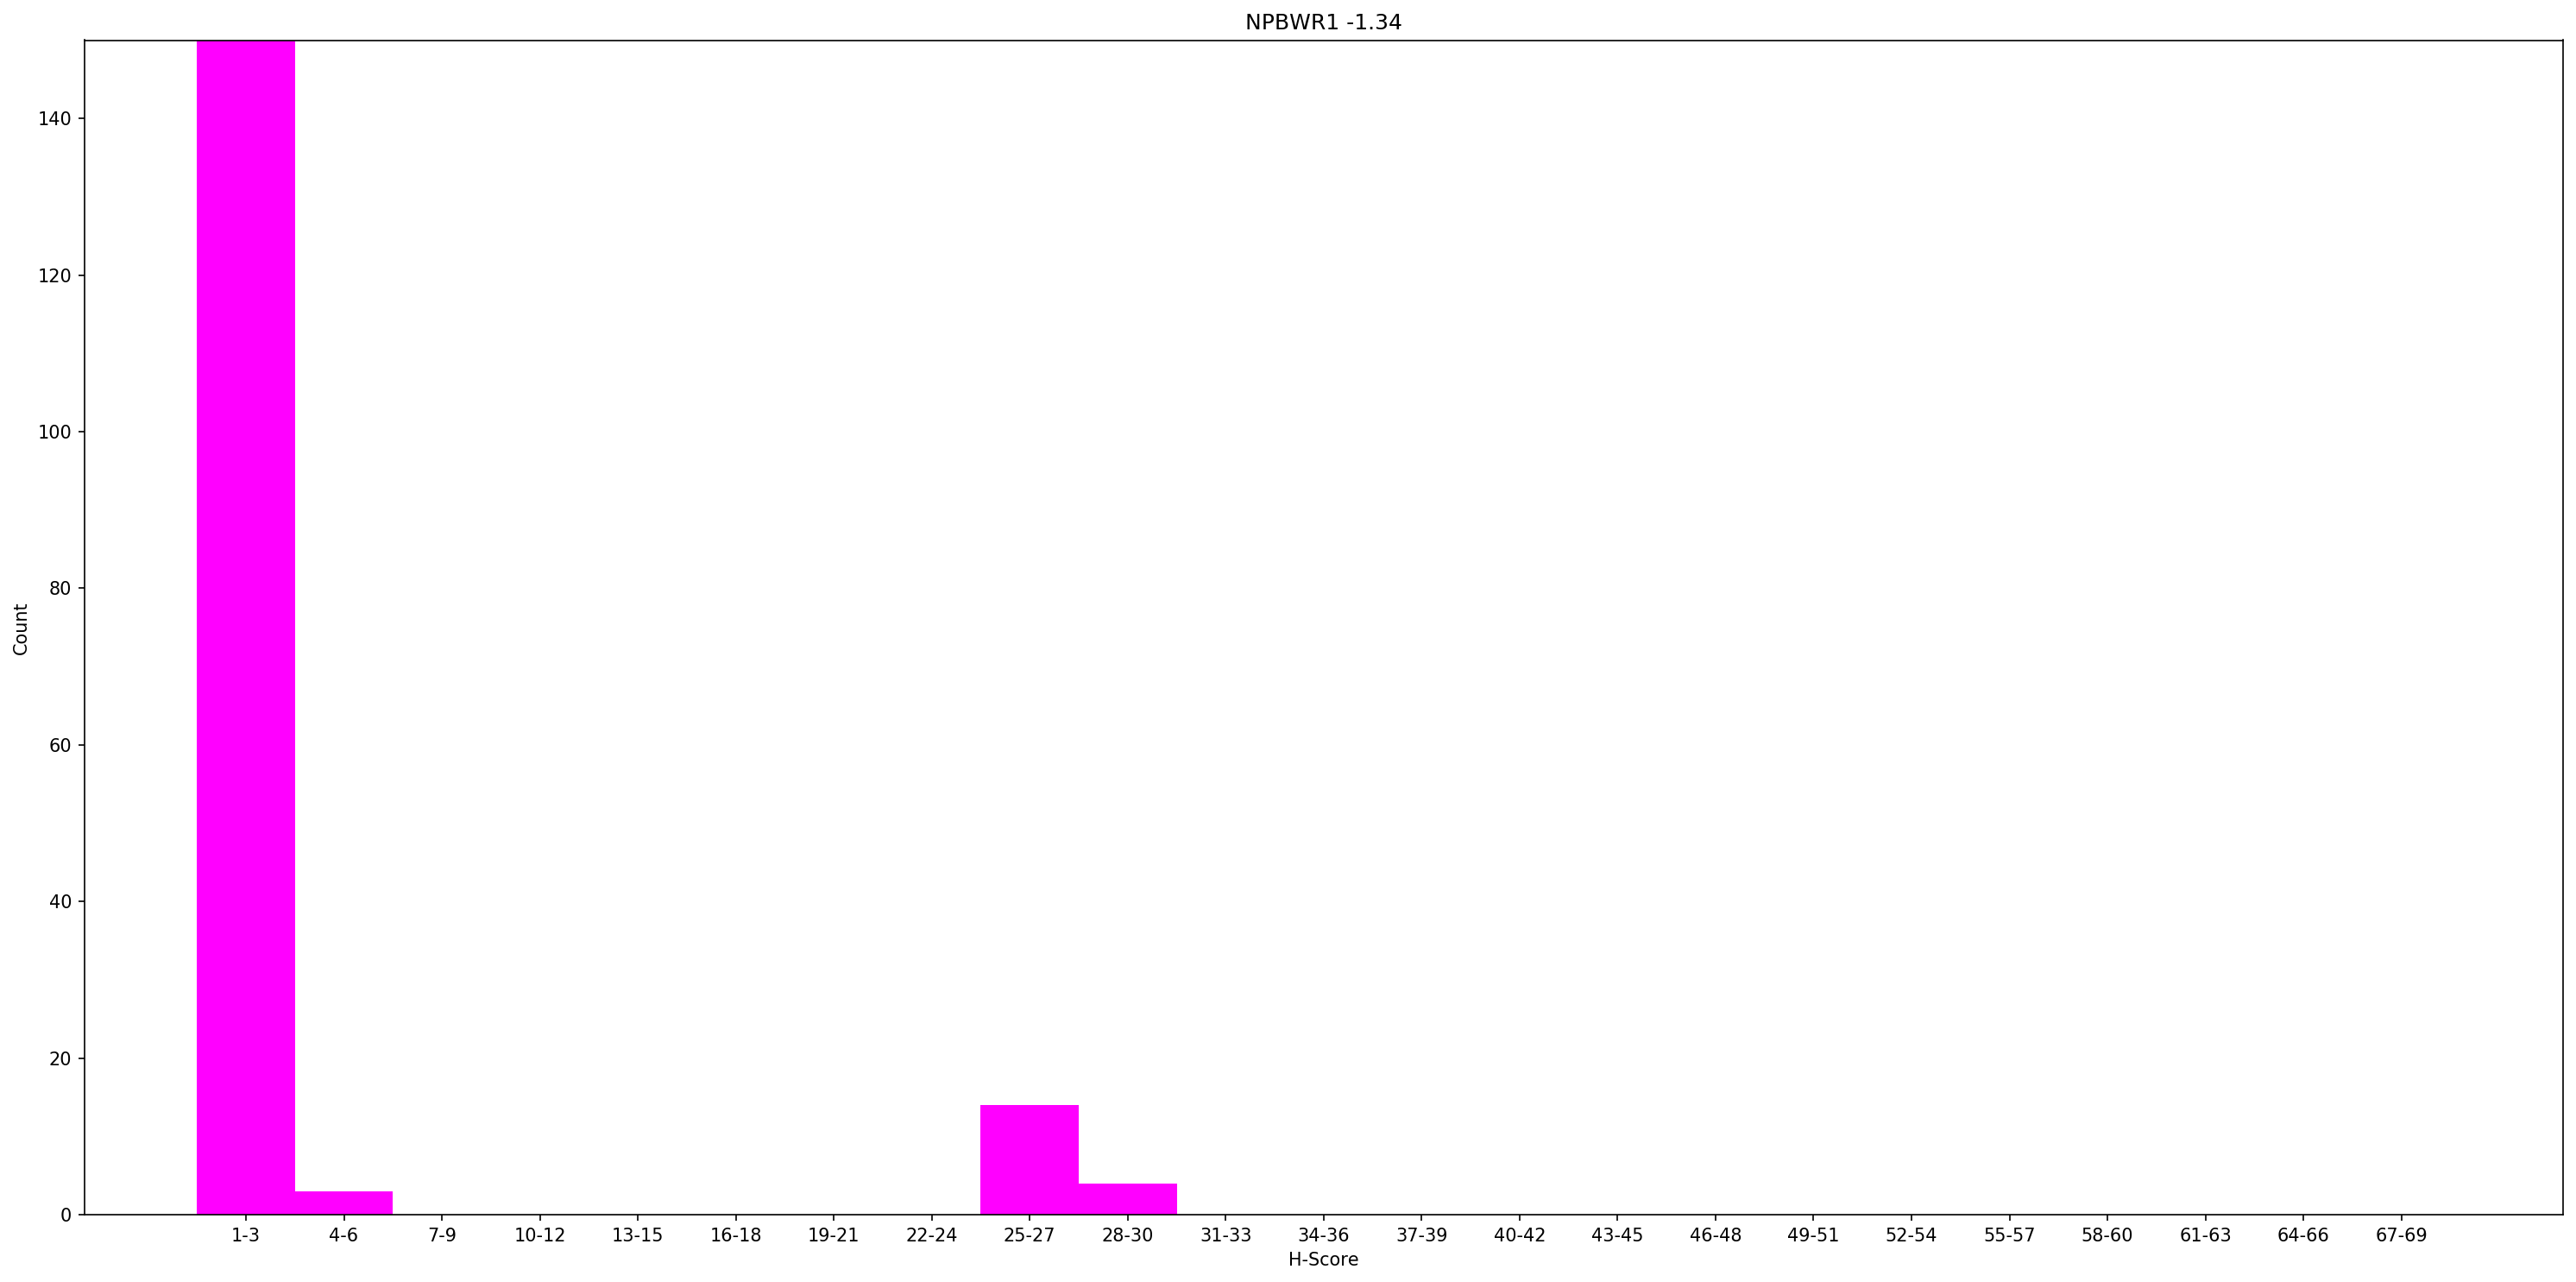

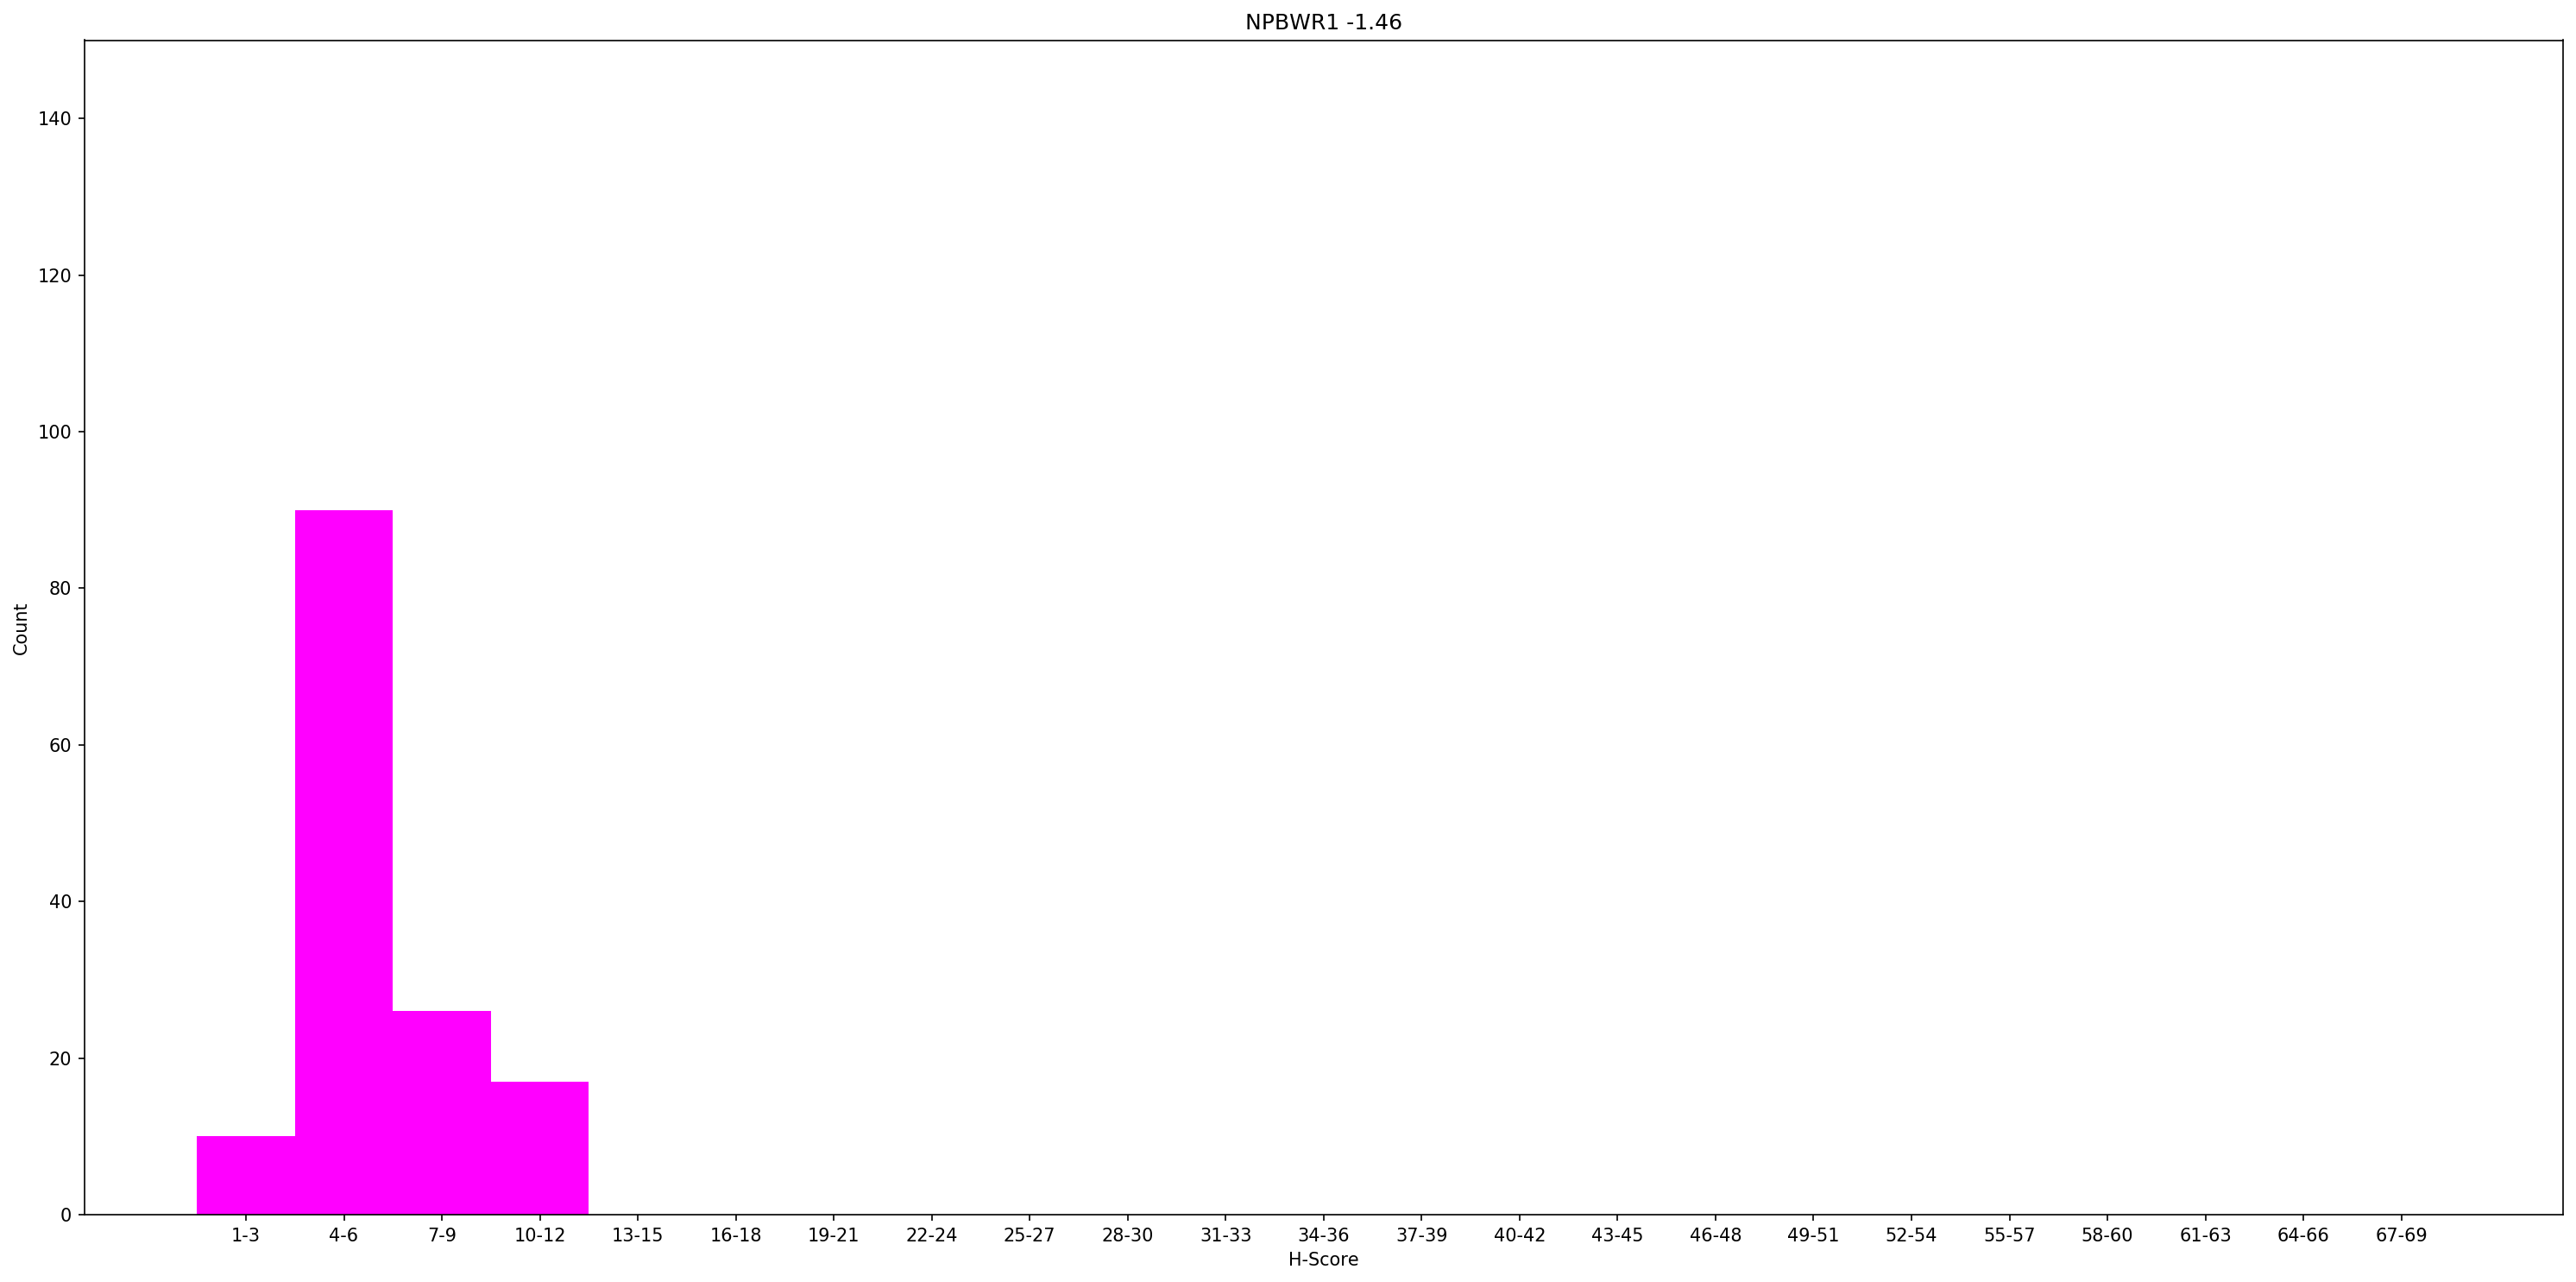

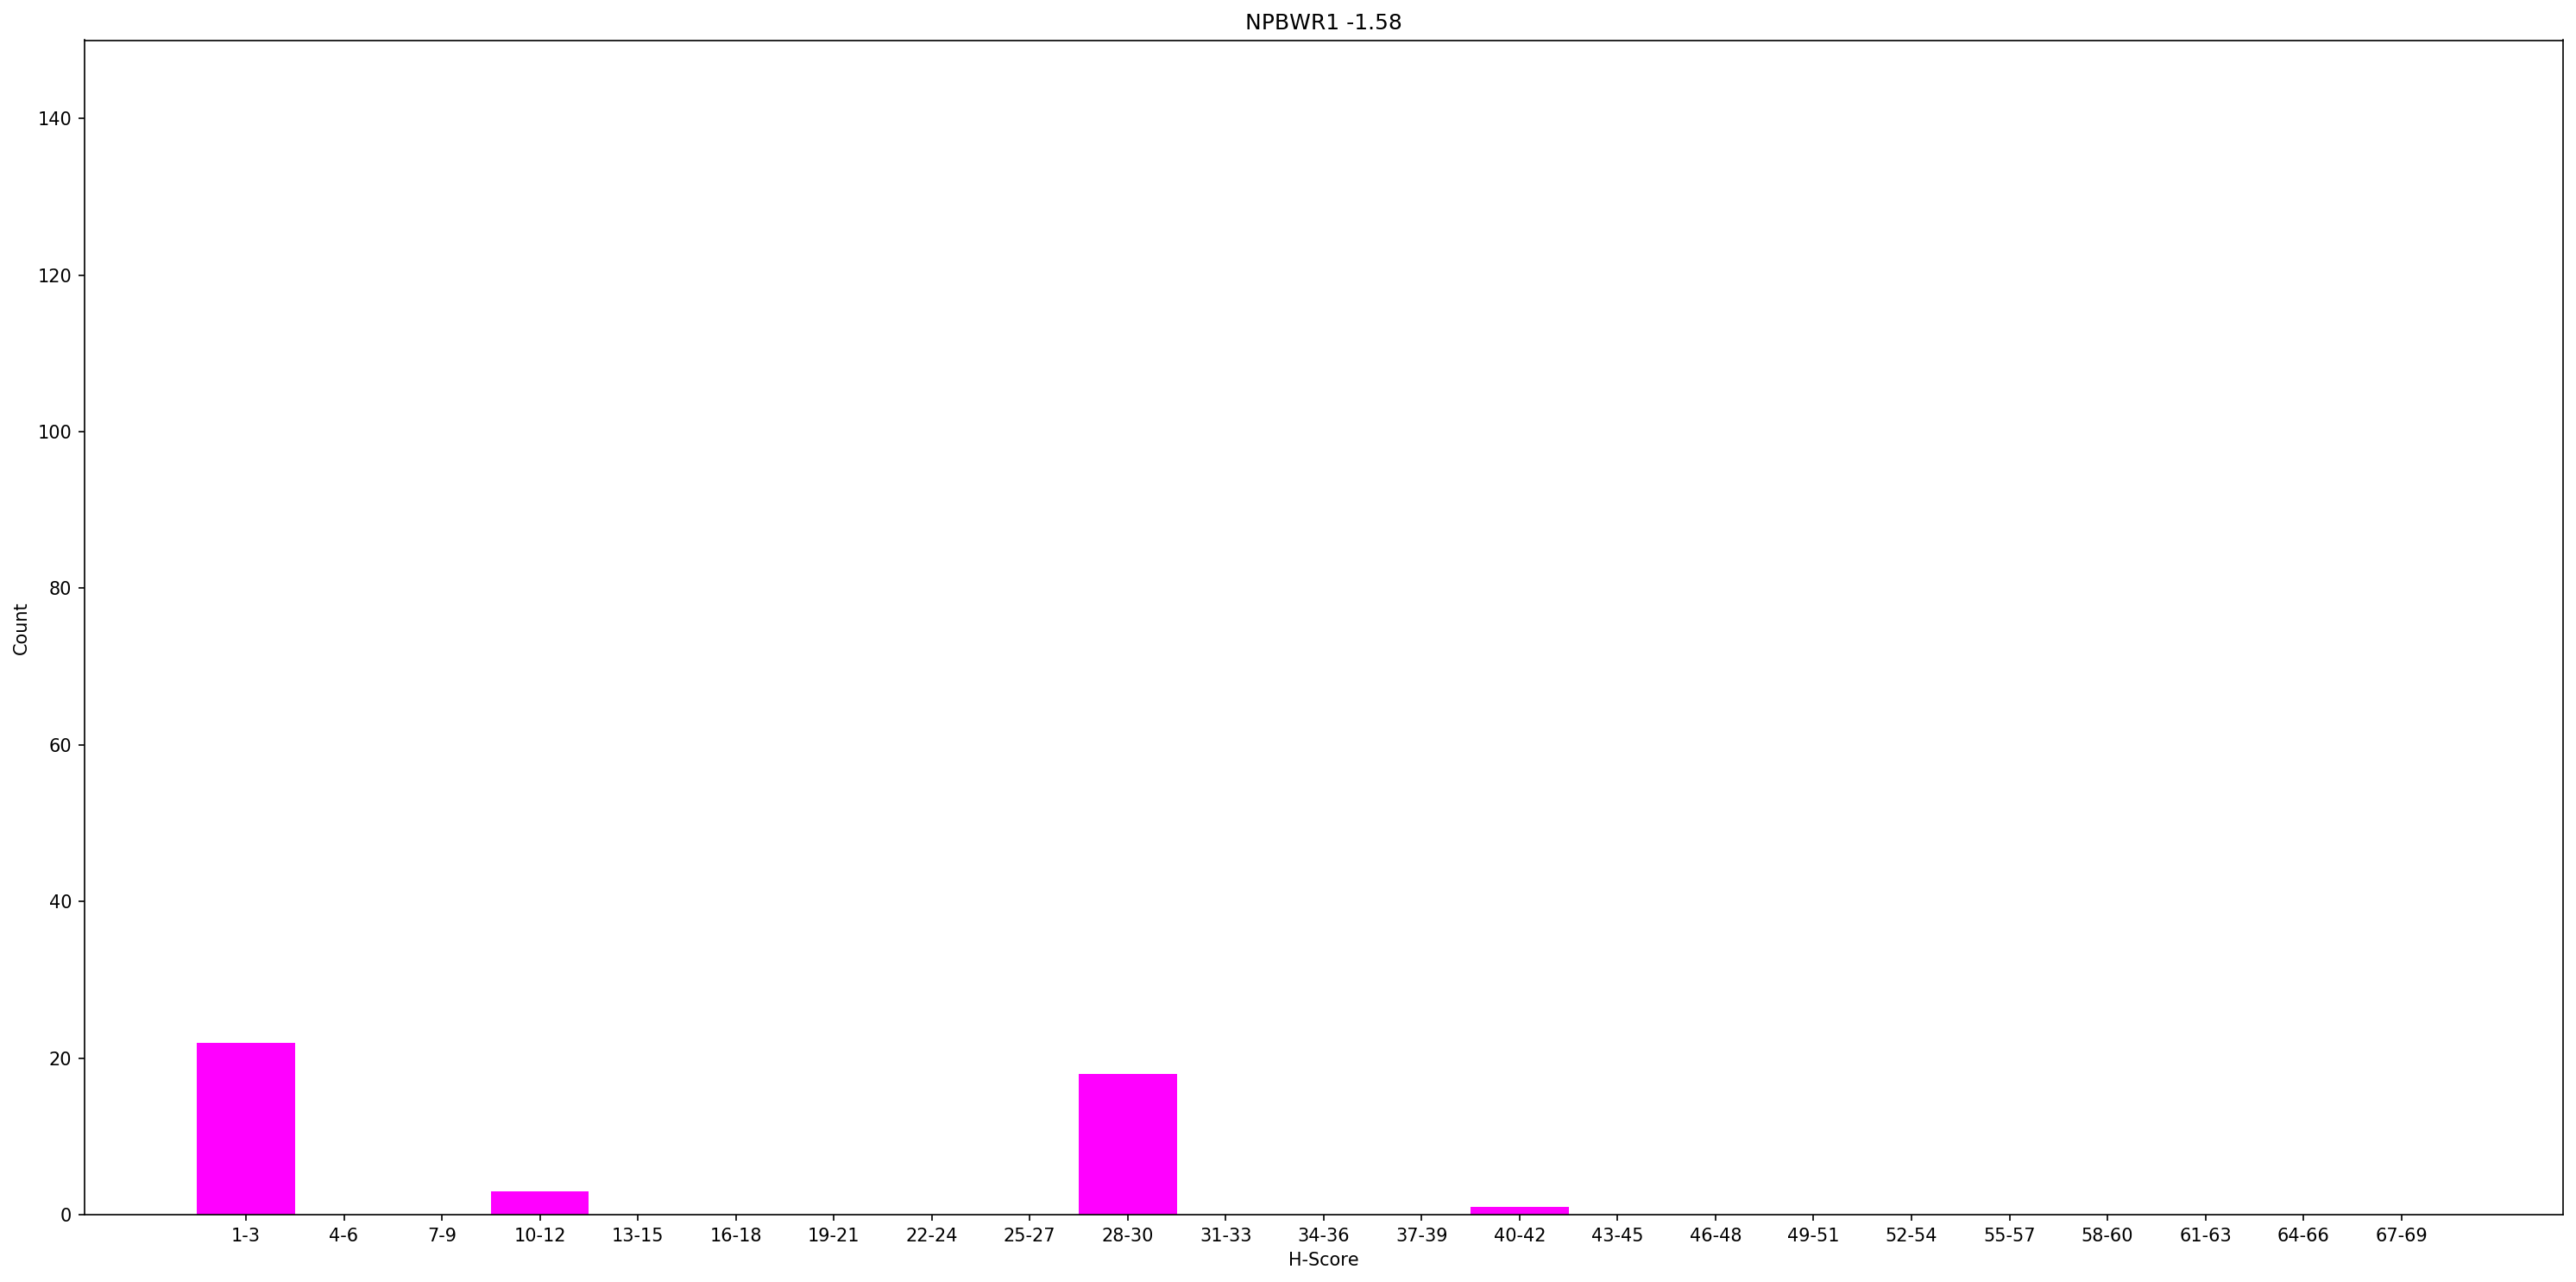

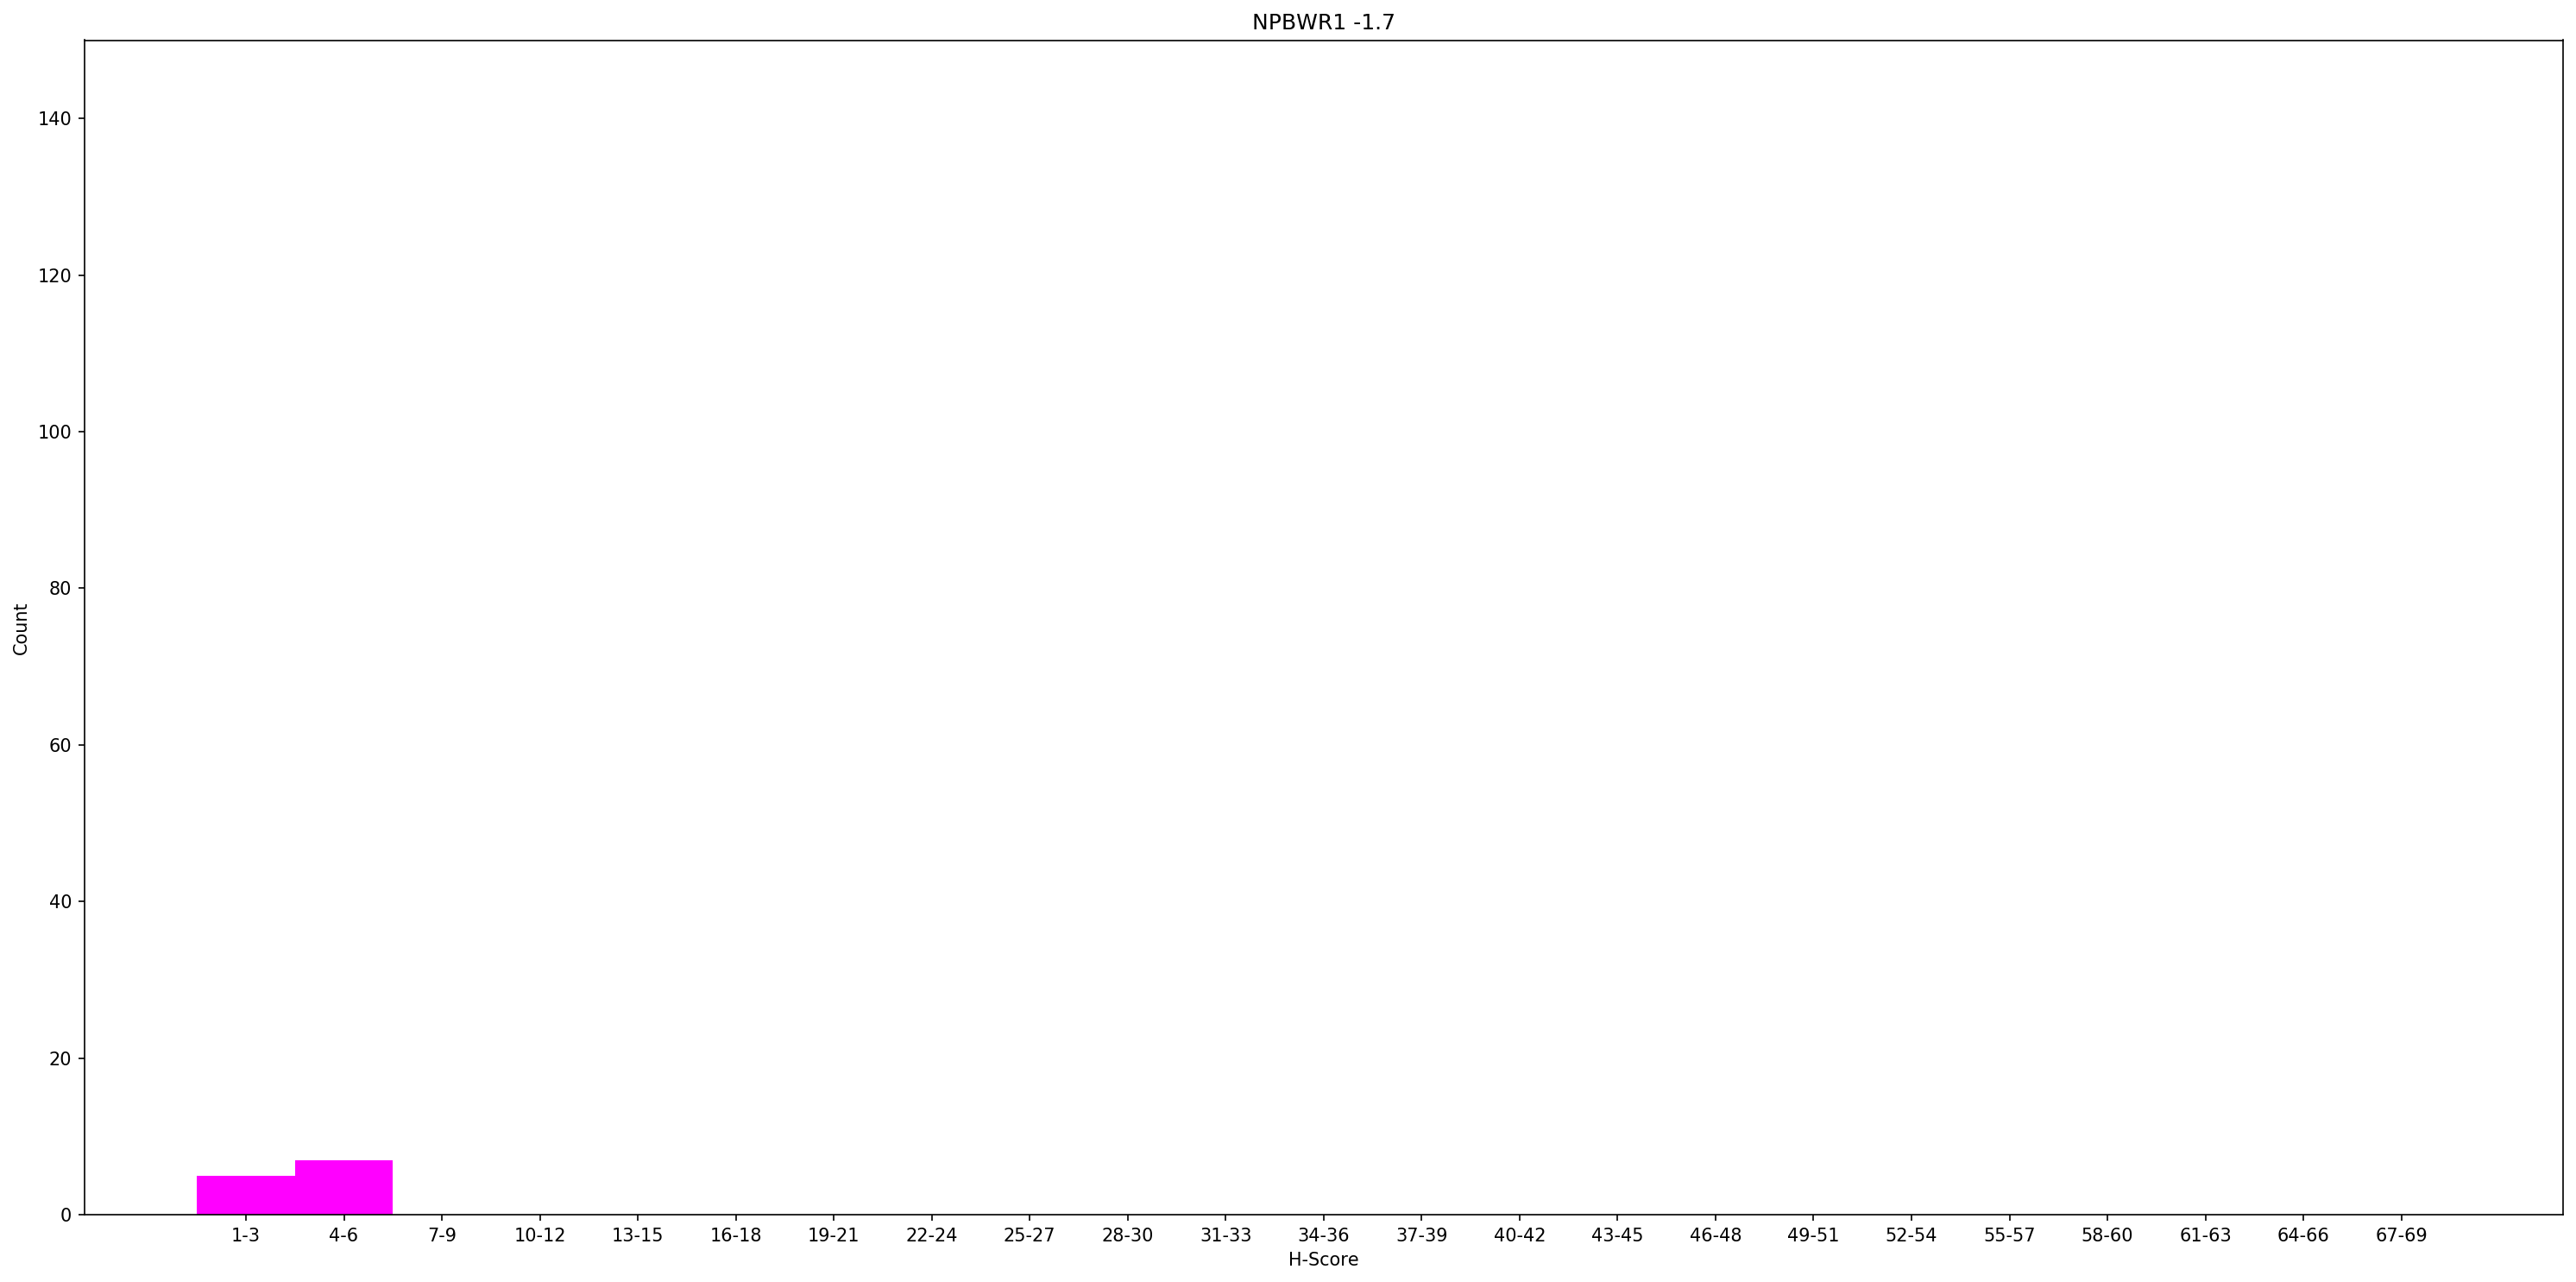

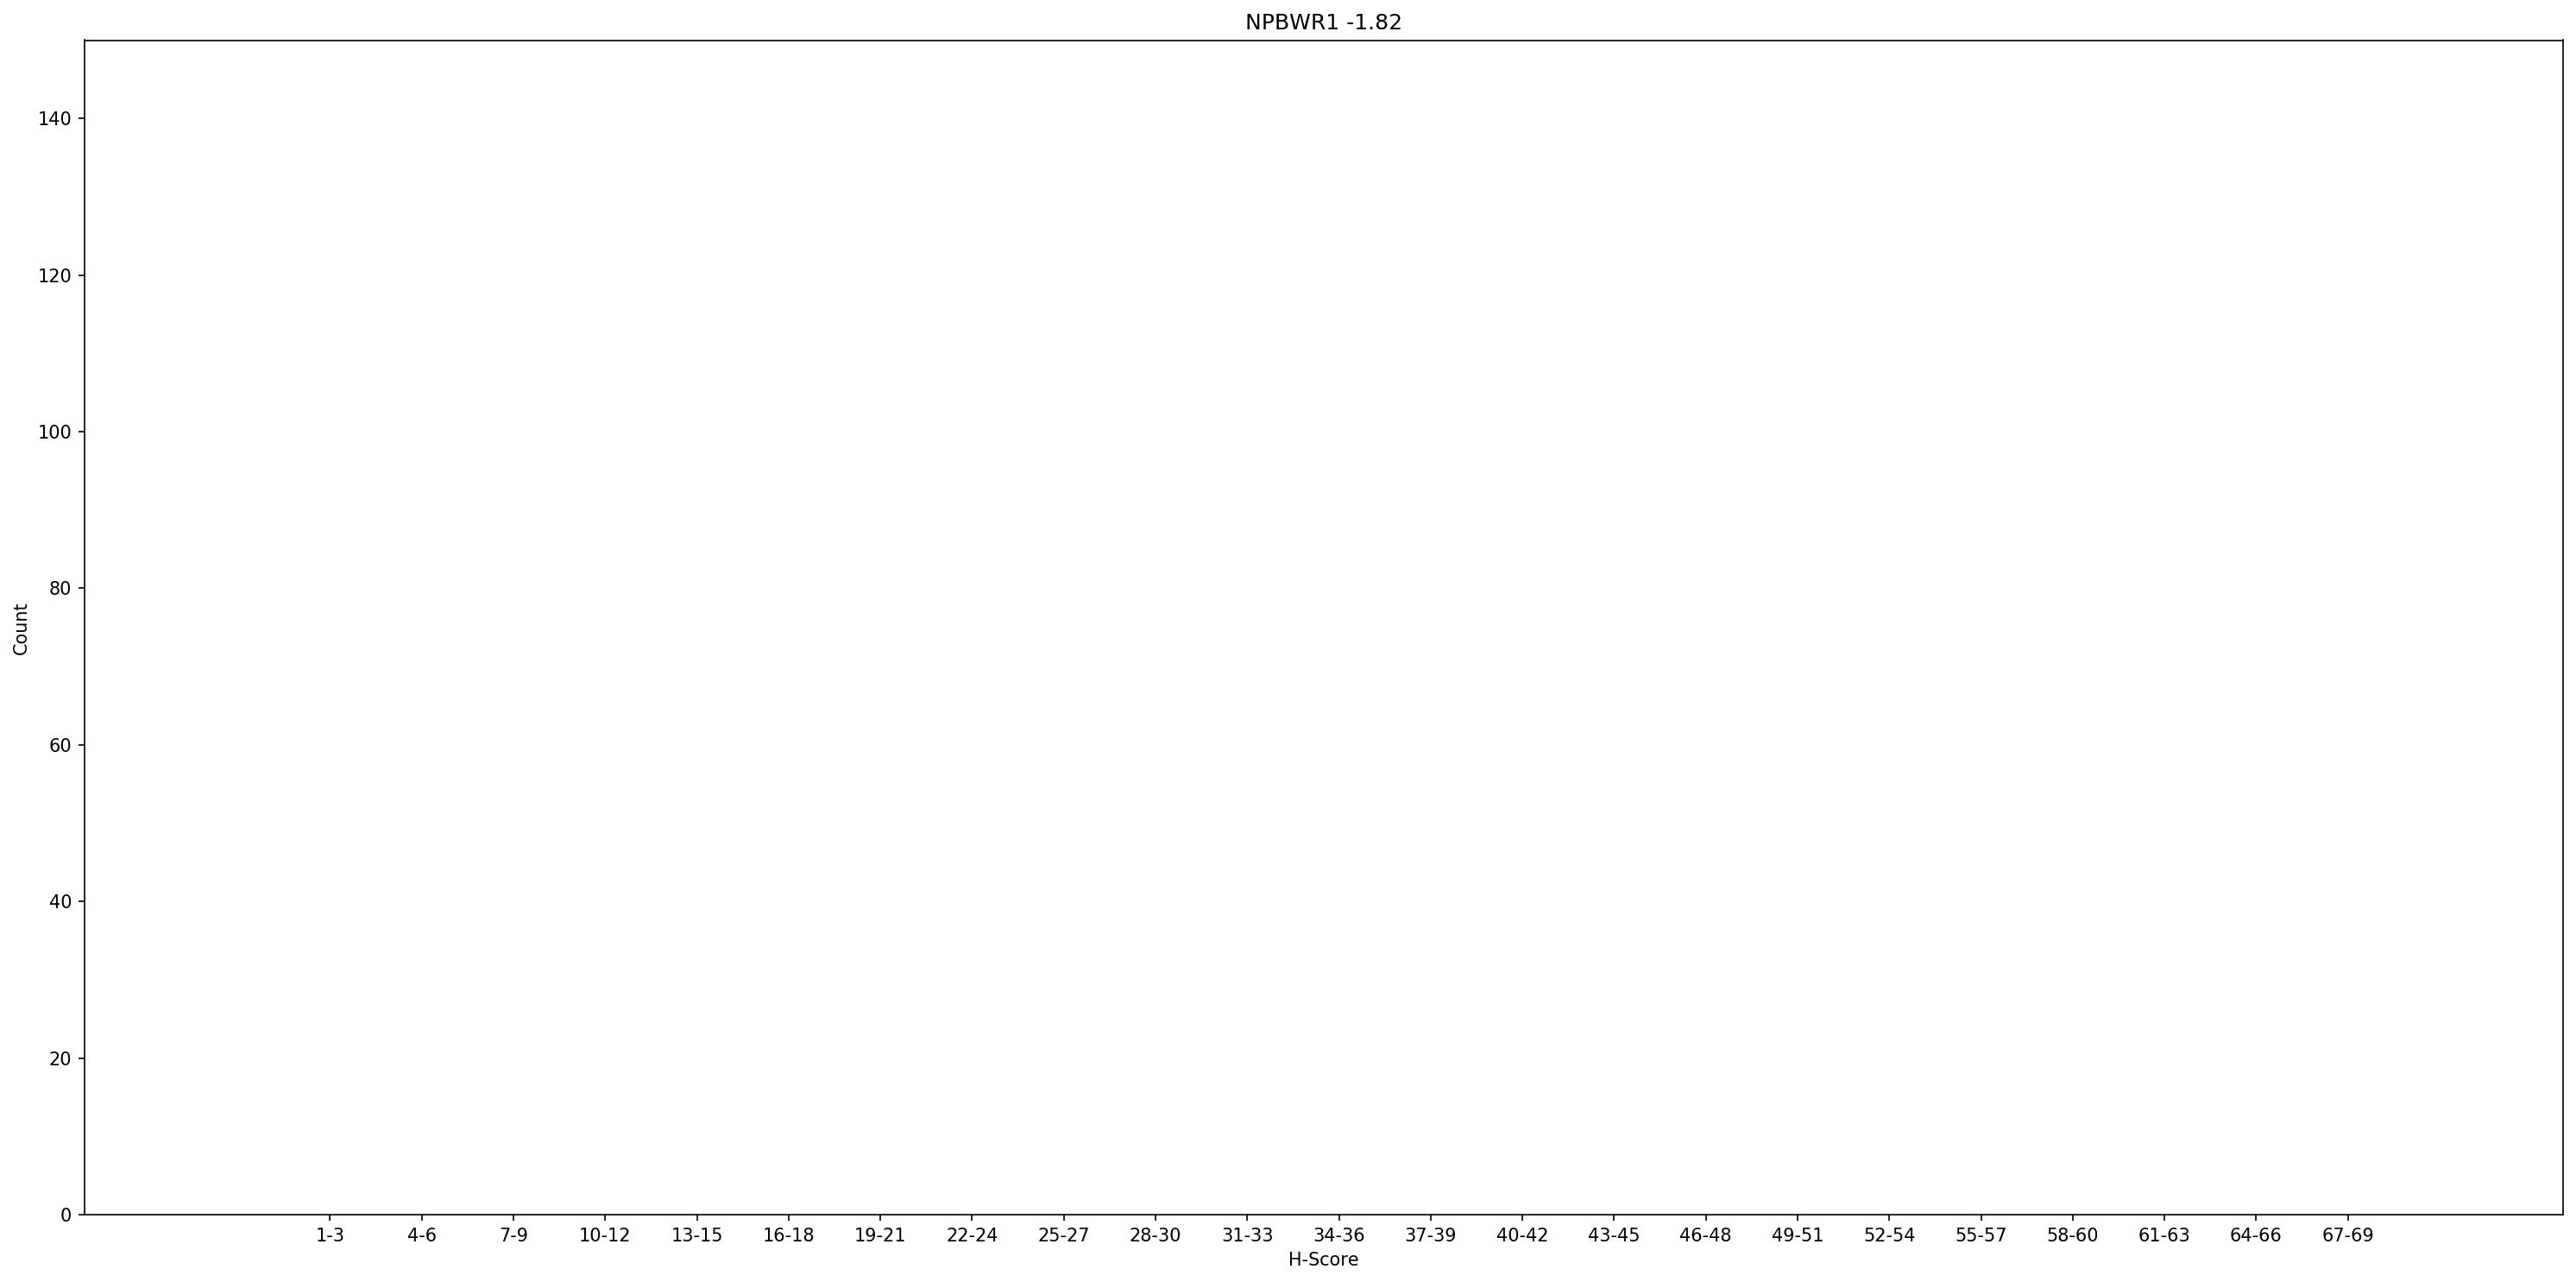

In [50]:
## Create variables for each of the sheet names in the XLSX file 
sheet_1 = 'DRD1 -1.22'
sheet_2 = 'DRD1 -1.34'
sheet_3 = 'DRD1 -1.46'
sheet_4 = 'DRD1 -1.58'
sheet_5 = 'DRD1 -1.7'
sheet_6 = 'DRD1 -1.82'
sheet_7 = 'DRD2 -1.22'
sheet_8 = 'DRD2 -1.34'
sheet_9 = 'DRD2 -1.46'
sheet_10 = 'DRD2 -1.58'
sheet_11 = 'DRD2 -1.7'
sheet_12 = 'DRD2 -1.82'
sheet_13 = 'VIP -1.22'
sheet_14 = 'VIP -1.34'
sheet_15 = 'VIP -1.46'
sheet_16 = 'VIP -1.58'
sheet_17 = 'VIP -1.7'
sheet_18 = 'VIP -1.82'
sheet_19 = 'NPBWR1 -1.22'
sheet_20 = 'NPBWR1 -1.34'
sheet_21 = 'NPBWR1 -1.46'
sheet_22 = 'NPBWR1 -1.58'
sheet_23 = 'NPBWR1 -1.7'
sheet_24 = 'NPBWR1 -1.82'

##Make 24 bar charts for each probe and AP combination
sheets = [sheet_1, sheet_2, sheet_3, sheet_4, sheet_5, sheet_6, 
        sheet_7, sheet_8, sheet_9, sheet_10, sheet_11, sheet_12,
        sheet_13, sheet_14, sheet_15, sheet_16, sheet_17, sheet_18,
        sheet_19, sheet_20, sheet_21, sheet_22, sheet_23, sheet_24] 
graph_titles = ['DRD1 -1.22', 'DRD1 -1.34', 'DRD1 -1.46', 'DRD1 -1.58', 'DRD1 -1.7', 'DRD1 -1.82', 
            'DRD2 -1.22', 'DRD2 -1.34', 'DRD2 -1.46', 'DRD2 -1.58', 'DRD2 -1.7', 'DRD2 -1.82',
            'VIP -1.22', 'VIP -1.34', 'VIP -1.46', 'VIP -1.58', 'VIP -1.7', 'VIP -1.82', 
            'NPBWR1 -1.22', 'NPBWR1 -1.34', 'NPBWR1 -1.46', 'NPBWR1 -1.58', 'NPBWR1 -1.7', 'NPBWR1 -1.82']
C = ['red', 'red', 'red', 'red', 'red', 'red', 
'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan',
'green', 'green', 'green', 'green', 'green', 'green', 
'magenta', 'magenta', 'magenta', 'magenta', 'magenta', 'magenta']

## For each sublot, call the function to make a graph, and set graph title
for i in range(24):
    fig = plot_one_graph(sheets[i], C[i])
    plt.title(graph_titles[i])
    #plt.savefig('RNAscope H-Score Bar Charts'+ str(i) + '.jpeg', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show

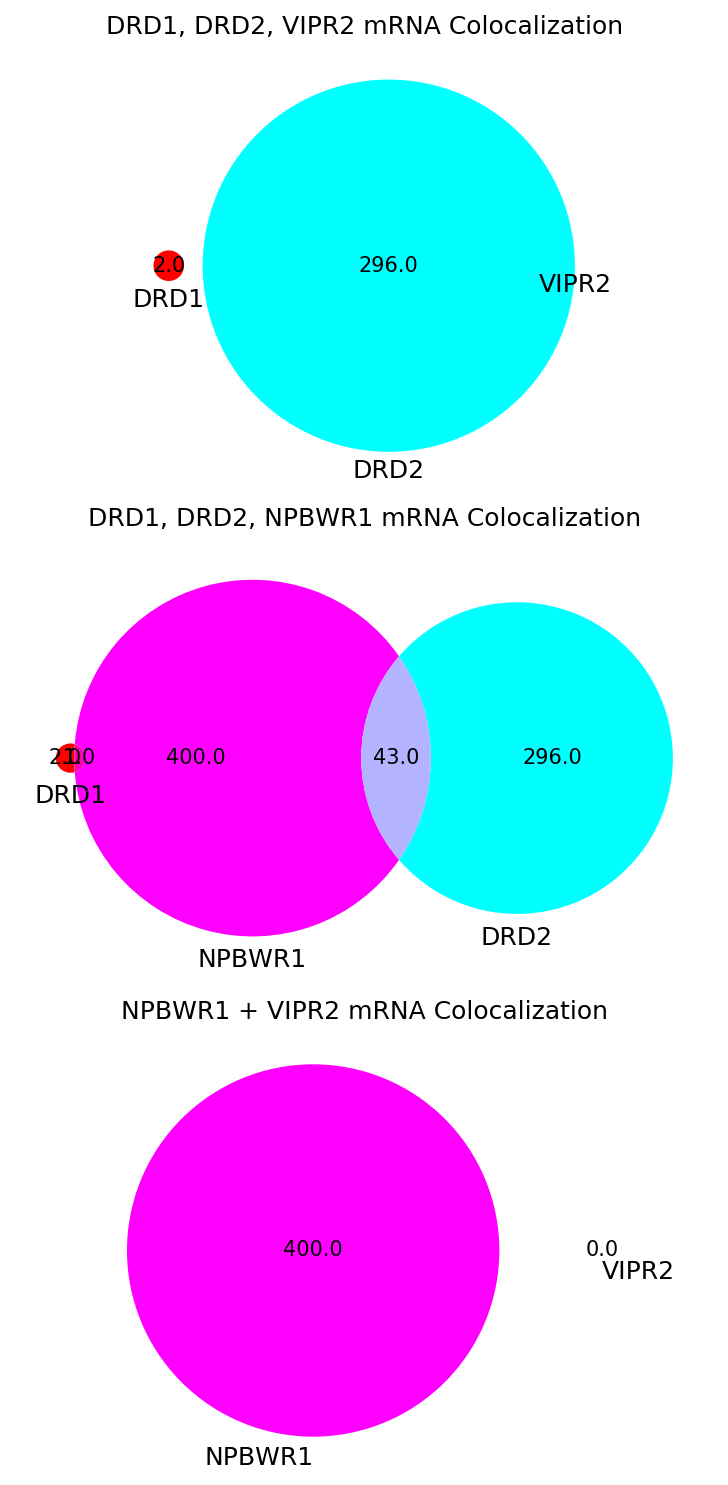

In [55]:
########### CREATE COLOCALIZATION VENN DIAGRAMS for CONCATENATED AP #############

###import excel file
data_sheets_3 = "area_occupied_nuclei_colocalization.xlsx"

# read data from excel as pandas dataframe 
# specify which sheet to read via sheet_name = ""
data_frame = pd.read_excel(data_sheets_3, sheet_name = "Colocalization")

# find sum along rows
APsums = data_frame.iloc[0:,2:].sum(axis=1)

# find sum of each group of 6 in APmeans 
DRD1_sum = APsums[0:6].sum(axis=0)
DRD2_sum = APsums[6:12].sum(axis=0)
VIPR2_sum = APsums[12:18].sum(axis=0)
NPBWR1_sum = APsums[18:24].sum(axis=0)
DRD1_DRD2_sum = APsums[24:30].sum(axis=0)
DRD1_VIPR2_sum = APsums[30:36].sum(axis=0)
DRD2_VIPR2_sum = APsums[36:42].sum(axis=0)
DRD1_DRD2_VIPR2_sum = APsums[42:48].sum(axis=0)
DRD1_NPBWR1_sum = APsums[48:54].sum(axis=0)
DRD2_NPBWR1_sum = APsums[54:60].sum(axis=0)
VIPR2_NPBWR1_sum = APsums[60:66].sum(axis=0)
DRD1_DRD2_NPBWR1_sum = APsums[66:72].sum(axis=0)

#make Venn diagrams with ALL DATA
fig = plt.figure(dpi=150,figsize=(10,10))
fig.add_subplot(111)

plt.subplot(3, 1, 1)
v = venn3(subsets = (DRD1_sum, DRD2_sum, DRD1_DRD2_sum, VIPR2_sum, DRD1_VIPR2_sum, DRD2_VIPR2_sum, DRD1_DRD2_VIPR2_sum),
     set_labels = ('DRD1','DRD2','VIPR2'), set_colors = ("red", "cyan", "green"), alpha = 1.0)
plt.title("DRD1, DRD2, VIPR2 mRNA Colocalization")
#plt.savefig('DRD1, DRD2, VIPR2 mRNA Colocalization.jpeg', dpi=300, bbox_inches='tight')
plt.tight_layout()

plt.subplot(3, 1, 2)
venn3(subsets = (DRD1_sum, DRD2_sum, DRD1_DRD2_sum, NPBWR1_sum, DRD1_NPBWR1_sum, DRD2_NPBWR1_sum, DRD1_DRD2_NPBWR1_sum),
     set_labels = ('DRD1','DRD2','NPBWR1'), set_colors = ("red", "cyan", "magenta"), alpha = 1.0)
plt.title("DRD1, DRD2, NPBWR1 mRNA Colocalization")
#plt.savefig('DRD1, DRD2, NPBWR1 mRNA Colocalization.jpeg', dpi=300, bbox_inches='tight')
plt.tight_layout()

plt.subplot(3, 1, 3)
venn2(subsets = (NPBWR1_sum, VIPR2_sum, VIPR2_NPBWR1_sum),
     set_labels = ('NPBWR1','VIPR2'), set_colors = ("magenta", "cyan"), alpha = 1.0)
plt.title("NPBWR1 + VIPR2 mRNA Colocalization")
#plt.savefig('NPBWR1 + VIPR2 mRNA Colocalization.jpeg', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

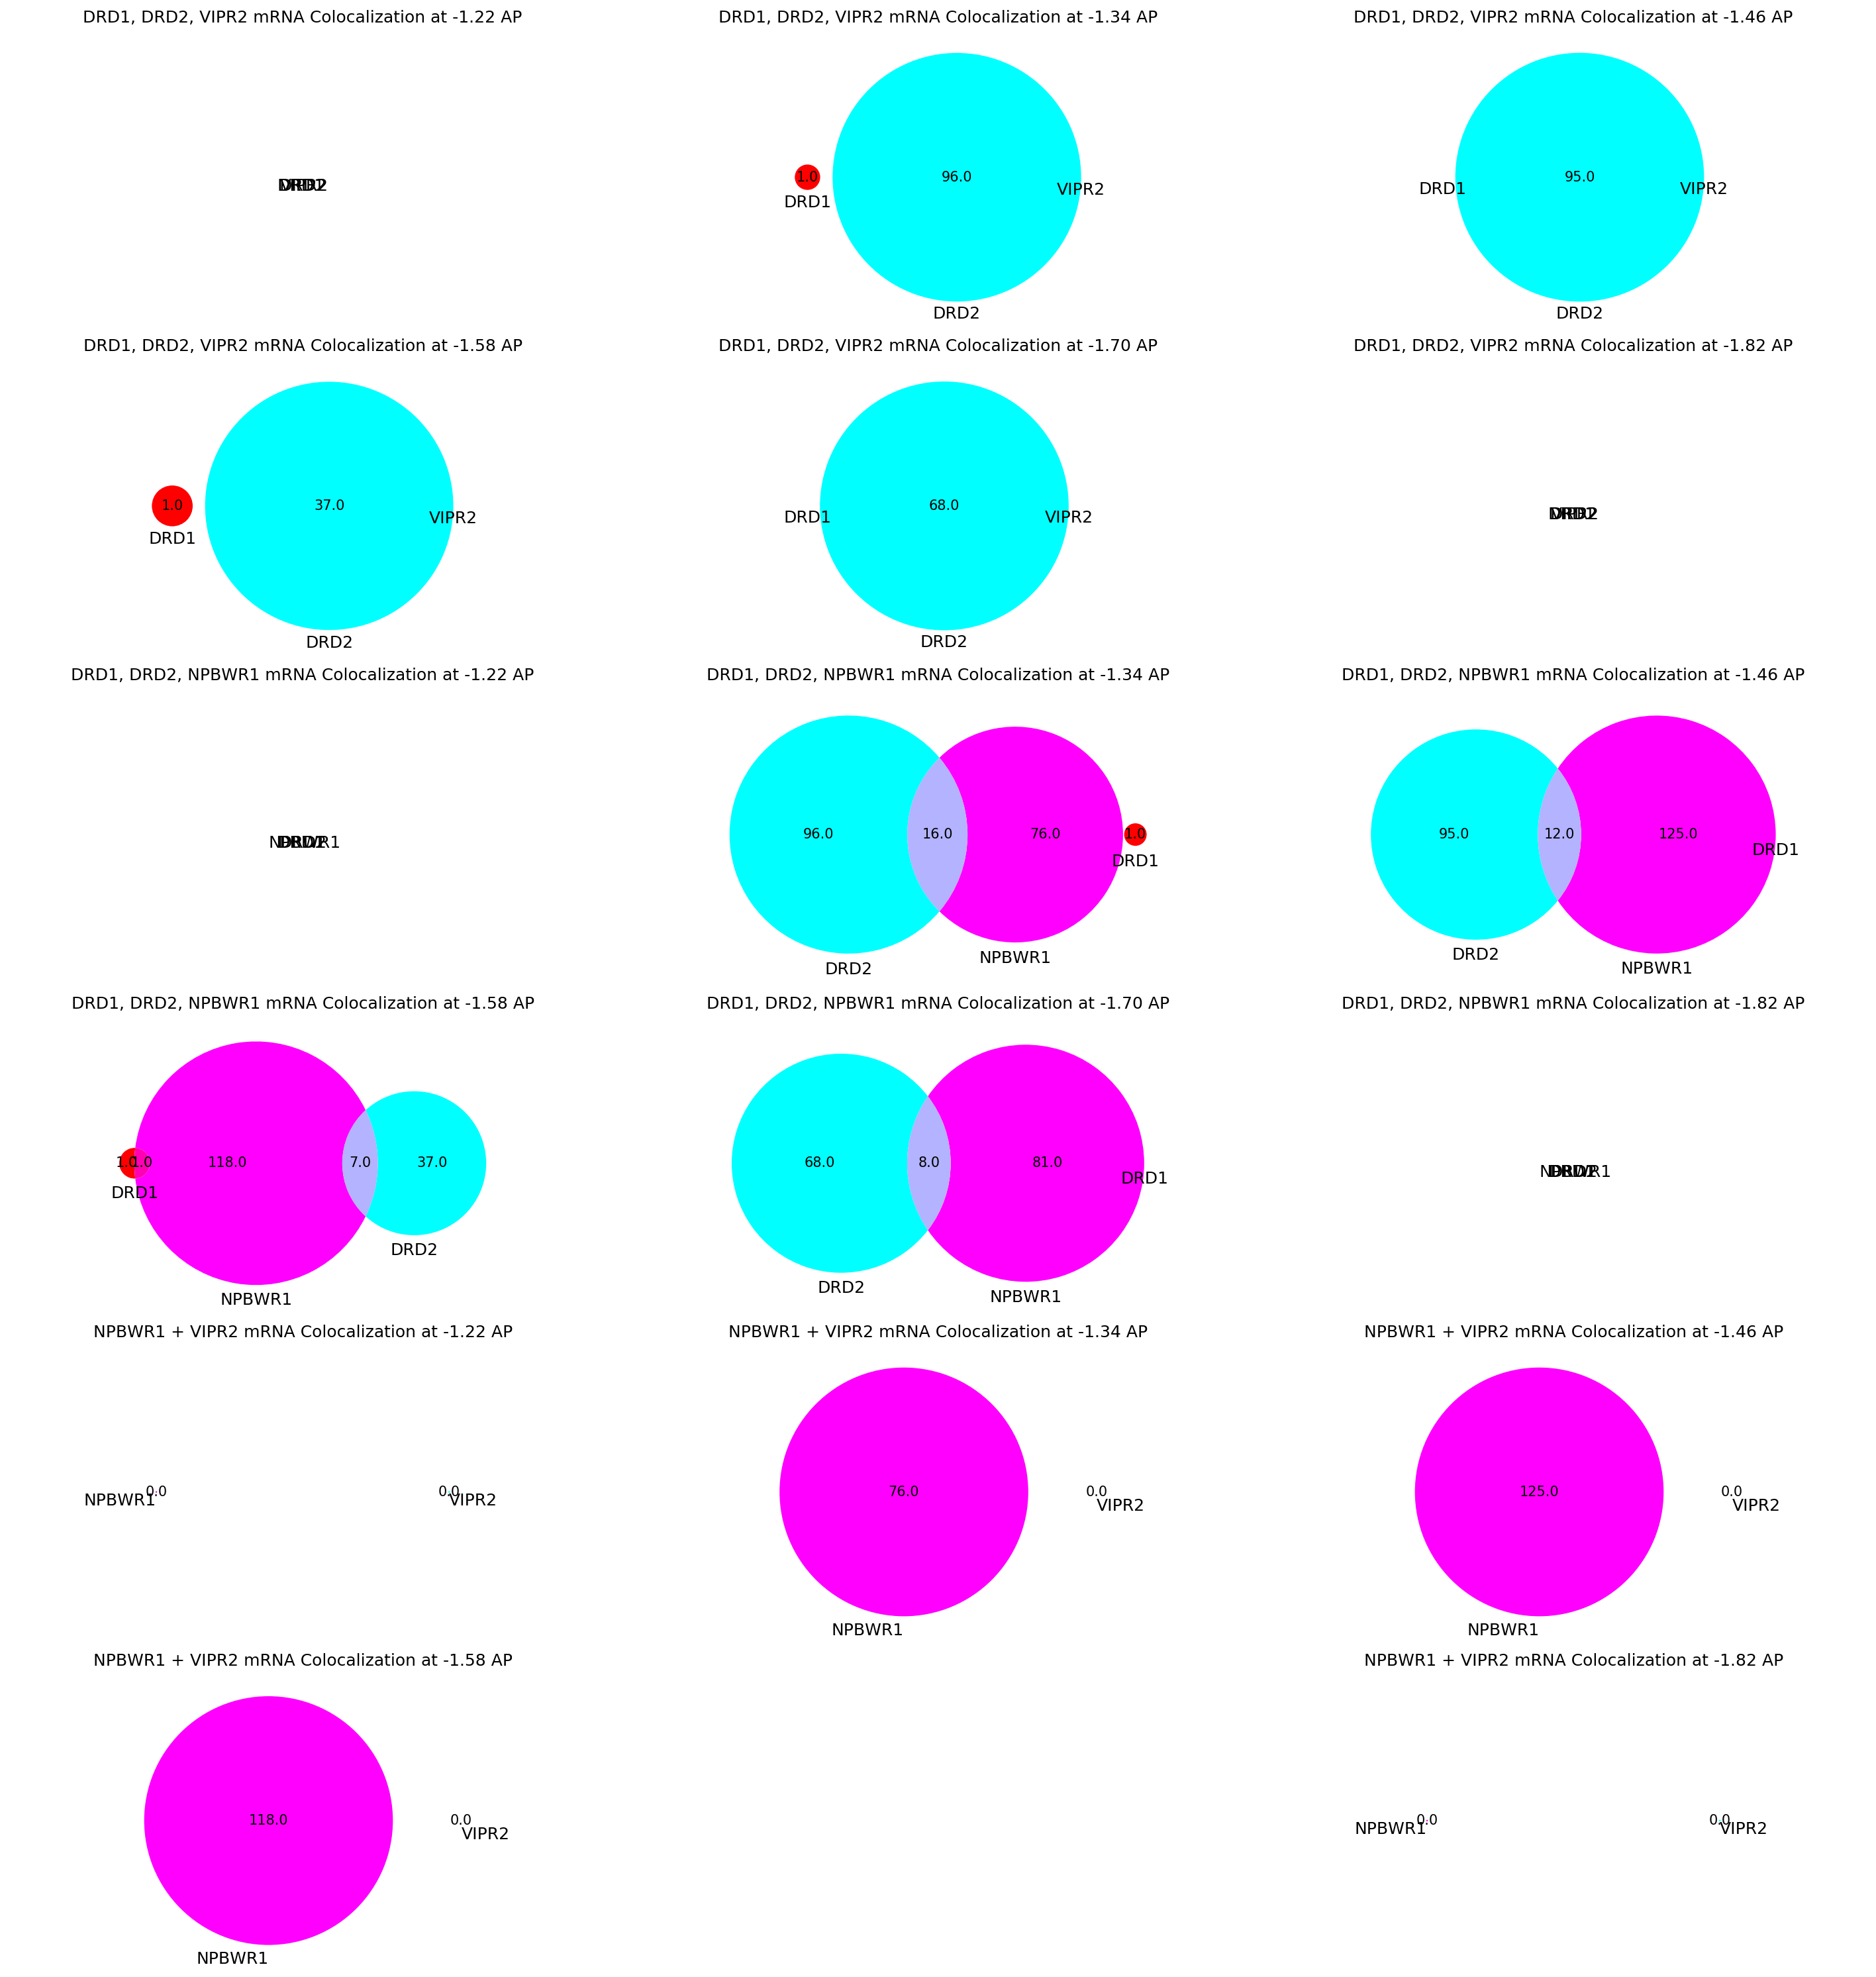

In [58]:
#################### CREATING VENNS FOR EACH AP ########################

## first compute sums at AP -1.22
DRD1_122 = APsums.iloc[0]
DRD2_122 = APsums.iloc[6]
VIPR2_122 = APsums.iloc[12]
NPBWR1_122 = APsums.iloc[18]
DRD1_DRD2_122 = APsums.iloc[24]
DRD1_VIPR2_122 = APsums.iloc[30]
DRD2_VIPR2_122 = APsums.iloc[36]
DRD1_DRD2_VIPR2_122 = APsums.iloc[42]
DRD1_NPBWR1_122 = APsums.iloc[48]
DRD2_NPBWR1_122 = APsums.iloc[54]
VIPR2_NPBWR1_122 = APsums.iloc[60]
DRD1_DRD2_NPBWR1_122 = APsums.iloc[66]

## then compute sums at AP -1.34
DRD1_134 = APsums.iloc[1]
DRD2_134 = APsums.iloc[7]
VIPR2_134 = APsums.iloc[13]
NPBWR1_134 = APsums.iloc[19]
DRD1_DRD2_134 = APsums.iloc[25]
DRD1_VIPR2_134 = APsums.iloc[31]
DRD2_VIPR2_134 = APsums.iloc[37]
DRD1_DRD2_VIPR2_134 = APsums.iloc[43]
DRD1_NPBWR1_134 = APsums.iloc[49]
DRD2_NPBWR1_134 = APsums.iloc[55]
VIPR2_NPBWR1_134 = APsums.iloc[61]
DRD1_DRD2_NPBWR1_134 = APsums.iloc[67]

## then compute sums at AP -1.46
DRD1_146 = APsums.iloc[2]
DRD2_146 = APsums.iloc[8]
VIPR2_146 = APsums.iloc[14]
NPBWR1_146 = APsums.iloc[20]
DRD1_DRD2_146 = APsums.iloc[26]
DRD1_VIPR2_146 = APsums.iloc[32]
DRD2_VIPR2_146 = APsums.iloc[38]
DRD1_DRD2_VIPR2_146 = APsums.iloc[44]
DRD1_NPBWR1_146 = APsums.iloc[50]
DRD2_NPBWR1_146 = APsums.iloc[56]
VIPR2_NPBWR1_146 = APsums.iloc[62]
DRD1_DRD2_NPBWR1_146 = APsums.iloc[68]

## then compute sums at AP -1.58
DRD1_158 = APsums.iloc[3]
DRD2_158 = APsums.iloc[9]
VIPR2_158 = APsums.iloc[15]
NPBWR1_158 = APsums.iloc[21]
DRD1_DRD2_158 = APsums.iloc[27]
DRD1_VIPR2_158 = APsums.iloc[33]
DRD2_VIPR2_158 = APsums.iloc[39]
DRD1_DRD2_VIPR2_158 = APsums.iloc[45]
DRD1_NPBWR1_158 = APsums.iloc[51]
DRD2_NPBWR1_158 = APsums.iloc[57]
VIPR2_NPBWR1_158 = APsums.iloc[63]
DRD1_DRD2_NPBWR1_158 = APsums.iloc[69]

## then compute sums at AP -1.70
DRD1_170 = APsums.iloc[4]
DRD2_170 = APsums.iloc[10]
VIPR2_170 = APsums.iloc[16]
NPBWR1_170 = APsums.iloc[22]
DRD1_DRD2_170 = APsums.iloc[28]
DRD1_VIPR2_170 = APsums.iloc[34]
DRD2_VIPR2_170 = APsums.iloc[40]
DRD1_DRD2_VIPR2_170 = APsums.iloc[46]
DRD1_NPBWR1_170 = APsums.iloc[52]
DRD2_NPBWR1_170 = APsums.iloc[58]
VIPR2_NPBWR1_170 = APsums.iloc[64]
DRD1_DRD2_NPBWR1_170 = APsums.iloc[70]

## then compute sums at AP -1.82
DRD1_182 = APsums.iloc[5]
DRD2_182 = APsums.iloc[11]
VIPR2_182 = APsums.iloc[17]
NPBWR1_182 = APsums.iloc[23]
DRD1_DRD2_182 = APsums.iloc[29]
DRD1_VIPR2_182 = APsums.iloc[35]
DRD2_VIPR2_182 = APsums.iloc[41]
DRD1_DRD2_VIPR2_182 = APsums.iloc[47]
DRD1_NPBWR1_182 = APsums.iloc[53]
DRD2_NPBWR1_182 = APsums.iloc[59]
VIPR2_NPBWR1_182 = APsums.iloc[65]
DRD1_DRD2_NPBWR1_182 = APsums.iloc[71]

##make Venn diagrams
fig = plt.figure(dpi=150,figsize=(20,20))
fig.add_subplot(111)

################## compare Venn's across AP for DRD1/DRD2/VIPR2 combination #####################
plt.subplot(6, 3, 1)
venn3(subsets = (DRD1_122, DRD2_122, DRD1_DRD2_122, VIPR2_122, DRD1_VIPR2_122, DRD2_VIPR2_122, DRD1_DRD2_VIPR2_122),
     set_labels = ('DRD1','DRD2','VIPR2'), set_colors = ("red", "cyan", "green"), alpha = 1.0)
plt.title("DRD1, DRD2, VIPR2 mRNA Colocalization at -1.22 AP")
#plt.savefig('DRD1, DRD2, VIPR2 mRNA Colocalization at -1.22 AP.jpeg', dpi=300, bbox_inches='tight')
plt.tight_layout()

plt.subplot(6, 3, 2)
venn3(subsets = (DRD1_134, DRD2_134, DRD1_DRD2_134, VIPR2_134, DRD1_VIPR2_134, DRD2_VIPR2_134, DRD1_DRD2_VIPR2_134),
     set_labels = ('DRD1','DRD2','VIPR2'), set_colors = ("red", "cyan", "green"), alpha = 1.0)
plt.title("DRD1, DRD2, VIPR2 mRNA Colocalization at -1.34 AP")
#plt.savefig('DRD1, DRD2, VIPR2 mRNA Colocalization at -1.34 AP.jpeg', dpi=300, bbox_inches='tight')
plt.tight_layout()

plt.subplot(6, 3, 3)
venn3(subsets = (DRD1_146, DRD2_146, DRD1_DRD2_146, VIPR2_146, DRD1_VIPR2_146, DRD2_VIPR2_146, DRD1_DRD2_VIPR2_146),
     set_labels = ('DRD1','DRD2','VIPR2'), set_colors = ("red", "cyan", "green"), alpha = 1.0)
plt.title("DRD1, DRD2, VIPR2 mRNA Colocalization at -1.46 AP")
#plt.savefig('DRD1, DRD2, VIPR2 mRNA Colocalization at -1.46 AP.jpeg', dpi=300, bbox_inches='tight')
plt.tight_layout()

plt.subplot(6, 3, 4)
venn3(subsets = (DRD1_158, DRD2_158, DRD1_DRD2_158, VIPR2_158, DRD1_VIPR2_158, DRD2_VIPR2_158, DRD1_DRD2_VIPR2_158),
     set_labels = ('DRD1','DRD2','VIPR2'), set_colors = ("red", "cyan", "green"), alpha = 1.0)
plt.title("DRD1, DRD2, VIPR2 mRNA Colocalization at -1.58 AP")
#plt.savefig('DRD1, DRD2, VIPR2 mRNA Colocalization at -1.58 AP.jpeg', dpi=300, bbox_inches='tight')
plt.tight_layout()

plt.subplot(6, 3, 5)
venn3(subsets = (DRD1_170, DRD2_170, DRD1_DRD2_170, VIPR2_170, DRD1_VIPR2_170, DRD2_VIPR2_170, DRD1_DRD2_VIPR2_170),
     set_labels = ('DRD1','DRD2','VIPR2'), set_colors = ("red", "cyan", "green"), alpha = 1.0)
plt.title("DRD1, DRD2, VIPR2 mRNA Colocalization at -1.70 AP")
#plt.savefig('DRD1, DRD2, VIPR2 mRNA Colocalization at -1.70 AP.jpeg', dpi=300, bbox_inches='tight')
plt.tight_layout()

plt.subplot(6, 3, 6)
venn3(subsets = (DRD1_182, DRD2_182, DRD1_DRD2_182, VIPR2_182, DRD1_VIPR2_182, DRD2_VIPR2_182, DRD1_DRD2_VIPR2_182),
     set_labels = ('DRD1','DRD2','VIPR2'), set_colors = ("red", "cyan", "green"), alpha = 1.0)
plt.title("DRD1, DRD2, VIPR2 mRNA Colocalization at -1.82 AP")
#plt.savefig('DRD1, DRD2, VIPR2 mRNA Colocalization at -1.82 AP.jpeg', dpi=300, bbox_inches='tight')
plt.tight_layout()

############ compare Venn's across AP for DRD1/DRD2/NPBWR1 combination ################
plt.subplot(6, 3, 7)
venn3(subsets = (DRD1_122, DRD2_122, DRD1_DRD2_122, NPBWR1_122, DRD1_NPBWR1_122, DRD2_NPBWR1_122, DRD1_DRD2_NPBWR1_122),
     set_labels = ('DRD1','DRD2','NPBWR1'), set_colors = ("red", "cyan", "magenta"), alpha = 1.0)
plt.title("DRD1, DRD2, NPBWR1 mRNA Colocalization at -1.22 AP")
#plt.savefig('DRD1, DRD2, NPBWR1 mRNA Colocalization at -1.22 AP.jpeg', dpi=300, bbox_inches='tight')
plt.tight_layout()

plt.subplot(6, 3, 8)
venn3(subsets = (DRD1_134, DRD2_134, DRD1_DRD2_134, NPBWR1_134, DRD1_NPBWR1_134, DRD2_NPBWR1_134, DRD1_DRD2_NPBWR1_134),
     set_labels = ('DRD1','DRD2','NPBWR1'), set_colors = ("red", "cyan", "magenta"), alpha = 1.0)
plt.title("DRD1, DRD2, NPBWR1 mRNA Colocalization at -1.34 AP")
#plt.savefig('DRD1, DRD2, NPBWR1 mRNA Colocalization at -1.34 AP.jpeg', dpi=300, bbox_inches='tight')
plt.tight_layout()

plt.subplot(6, 3, 9)
venn3(subsets = (DRD1_146, DRD2_146, DRD1_DRD2_146, NPBWR1_146, DRD1_NPBWR1_146, DRD2_NPBWR1_146, DRD1_DRD2_NPBWR1_146),
     set_labels = ('DRD1','DRD2','NPBWR1'), set_colors = ("red", "cyan", "magenta"), alpha = 1.0)
plt.title("DRD1, DRD2, NPBWR1 mRNA Colocalization at -1.46 AP")
#plt.savefig('DRD1, DRD2, NPBWR1 mRNA Colocalization at -1.46 AP.jpeg', dpi=300, bbox_inches='tight')
plt.tight_layout()

plt.subplot(6, 3, 10)
venn3(subsets = (DRD1_158, DRD2_158, DRD1_DRD2_158, NPBWR1_158, DRD1_NPBWR1_158, DRD2_NPBWR1_158, DRD1_DRD2_NPBWR1_158),
     set_labels = ('DRD1','DRD2','NPBWR1'), set_colors = ("red", "cyan", "magenta"), alpha = 1.0)
plt.title("DRD1, DRD2, NPBWR1 mRNA Colocalization at -1.58 AP")
#plt.savefig('DRD1, DRD2, NPBWR1 mRNA Colocalization at -1.58 AP.jpeg', dpi=300, bbox_inches='tight')
plt.tight_layout()

plt.subplot(6, 3, 11)
venn3(subsets = (DRD1_170, DRD2_170, DRD1_DRD2_170, NPBWR1_170, DRD1_NPBWR1_170, DRD2_NPBWR1_170, DRD1_DRD2_NPBWR1_170),
     set_labels = ('DRD1','DRD2','NPBWR1'), set_colors = ("red", "cyan", "magenta"), alpha = 1.0)
plt.title("DRD1, DRD2, NPBWR1 mRNA Colocalization at -1.70 AP")
#plt.savefig('DRD1, DRD2, NPBWR1 mRNA Colocalization at -1.70 AP.jpeg', dpi=300, bbox_inches='tight')
plt.tight_layout()

plt.subplot(6, 3, 12)
venn3(subsets = (DRD1_182, DRD2_182, DRD1_DRD2_182, NPBWR1_182, DRD1_NPBWR1_182, DRD2_NPBWR1_182, DRD1_DRD2_NPBWR1_182),
     set_labels = ('DRD1','DRD2','NPBWR1'), set_colors = ("red", "cyan", "magenta"), alpha = 1.0)
plt.title("DRD1, DRD2, NPBWR1 mRNA Colocalization at -1.82 AP")
#plt.savefig('DRD1, DRD2, NPBWR1 mRNA Colocalization at -1.82 AP.jpeg', dpi=300, bbox_inches='tight')
plt.tight_layout()

############### compare Venn's across AP for NPBWR1/VIPR2 combination #############
plt.subplot(6, 3, 13)
venn2(subsets = (NPBWR1_122, VIPR2_122, VIPR2_NPBWR1_122),
     set_labels = ('NPBWR1','VIPR2'), set_colors = ("magenta", "cyan"), alpha = 1.0)
plt.title("NPBWR1 + VIPR2 mRNA Colocalization at -1.22 AP")
#plt.savefig('NPBWR1 + VIPR2 mRNA Colocalization at -1.22 AP.jpeg', dpi=300, bbox_inches='tight')
plt.tight_layout()

plt.subplot(6, 3, 14)
venn2(subsets = (NPBWR1_134, VIPR2_134, VIPR2_NPBWR1_134),
     set_labels = ('NPBWR1','VIPR2'), set_colors = ("magenta", "cyan"), alpha = 1.0)
plt.title("NPBWR1 + VIPR2 mRNA Colocalization at -1.34 AP")
#plt.savefig('NPBWR1 + VIPR2 mRNA Colocalization at -1.35 AP.jpeg', dpi=300, bbox_inches='tight')
plt.tight_layout()

plt.subplot(6, 3, 15)
venn2(subsets = (NPBWR1_146, VIPR2_146, VIPR2_NPBWR1_146),
     set_labels = ('NPBWR1','VIPR2'), set_colors = ("magenta", "cyan"), alpha = 1.0)
plt.title("NPBWR1 + VIPR2 mRNA Colocalization at -1.46 AP")
#plt.savefig('NPBWR1 + VIPR2 mRNA Colocalization at -1.46 AP.jpeg', dpi=300, bbox_inches='tight')
plt.tight_layout()

plt.subplot(6, 3, 16)
venn2(subsets = (NPBWR1_158, VIPR2_158, VIPR2_NPBWR1_158),
     set_labels = ('NPBWR1','VIPR2'), set_colors = ("magenta", "cyan"), alpha = 1.0)
plt.title("NPBWR1 + VIPR2 mRNA Colocalization at -1.58 AP")
#plt.savefig('NPBWR1 + VIPR2 mRNA Colocalization at -1.58 AP.jpeg', dpi=300, bbox_inches='tight')
plt.tight_layout()

plt.subplot(6, 3, 17)
venn2(subsets = (NPBWR1_170, VIPR2_170, VIPR2_NPBWR1_170),
     set_labels = ('NPBWR1','VIPR2'), set_colors = ("magenta", "cyan"), alpha = 1.0)
plt.title("NPBWR1 + VIPR2 mRNA Colocalization at -1.70 AP")
#plt.savefig('NPBWR1 + VIPR2 mRNA Colocalization at -1.70 AP.jpeg', dpi=300, bbox_inches='tight')
plt.tight_layout()

plt.subplot(6, 3, 18)
venn2(subsets = (NPBWR1_182, VIPR2_182, VIPR2_NPBWR1_182),
     set_labels = ('NPBWR1','VIPR2'), set_colors = ("magenta", "cyan"), alpha = 1.0)
plt.title("NPBWR1 + VIPR2 mRNA Colocalization at -1.82 AP")
#plt.savefig('NPBWR1 + VIPR2 mRNA Colocalization at -1.82 AP.jpeg', dpi=300, bbox_inches='tight')
plt.tight_layout()
